# Import Packages

In [ ]:
!pip install yfinance

import yfinance as yf

In [ ]:
!pip install esig

import esig as eg

from esig import stream2sig, stream2logsig

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 9.8 MB/s eta 0:00:00


In [ ]:
!pip install PyPortfolioOpt

import pypfopt as p_opt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import objective_functions
from pypfopt import base_optimizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
import collections

In [ ]:
import scipy
from scipy import spatial
from scipy.spatial.distance import squareform
import warnings
warnings.simplefilter("ignore")

In [ ]:
import sklearn
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.feature_selection import mutual_info_regression

from tqdm.auto import tqdm

In [ ]:
from scipy.optimize import minimize
import cvxpy as cp

In [ ]:
from network_function import *
from utils import *
from portfolio_function import *

# Import and Visualize Data

In [ ]:
# Stocks symbol inside the sp500
stocks_sp500 = ['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE',
       'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK',
       'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ANET', 'AJG', 'AIZ', 'T', 'ATO',
       'ADSK', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK',
       'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BG', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF',
       'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW','CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX',
       'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG','CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG',
       'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP','COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI',
       'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'DXCM', 'FANG', 'DLR', 'DFS', 'DIS', 'DG', 'DLTR', 'D', 'DPZ', 'DOV', 'DOW', 'DTE', 'DUK', 'DD',
       'DXC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'ELV','LLY', 'EMR', 'ENPH', 'ETR', 'EOG', 'EPAM', 'EQT', 'EFX', 'EQIX',
       'EQR', 'ESS', 'EL', 'ETSY', 'RE', 'EVRG', 'ES', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FDS', 'FICO', 'FAST', 'FRT', 'FDX',
       'FITB', 'FSLR', 'FE', 'FIS', 'FI', 'FLT', 'FMC', 'F', 'FTNT','FTV', 'FOXA', 'FOX', 'BEN', 'FCX', 'GRMN', 'IT', 'GEHC', 'GEN',
       'GNRC', 'GD', 'GE', 'GIS', 'GM', 'GPC', 'GILD', 'GL', 'GPN', 'GS', 'HAL', 'HIG', 'HAS', 'HCA', 'PEAK', 'HSIC', 'HSY', 'HES', 'HPE',
       'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HWM', 'HPQ', 'HUM','HBAN', 'HII', 'IBM', 'IEX', 'IDXX', 'ITW', 'ILMN', 'INCY', 'IR',
       'PODD', 'INTC', 'ICE', 'IFF', 'IP', 'IPG', 'INTU', 'ISRG', 'IVZ','INVH', 'IQV', 'IRM', 'JBHT', 'JKHY', 'J', 'JNJ', 'JCI', 'JPM',
       'JNPR', 'K', 'KDP', 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KLAC','KHC', 'KR', 'LHX', 'LH', 'LRCX', 'LW', 'LVS', 'LDOS', 'LEN',
       'LNC', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LYB', 'MTB', 'MRO', 'MPC', 'MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MTCH', 'MKC',
       'MCD', 'MCK', 'MDT', 'MRK', 'META', 'MET', 'MTD', 'MGM', 'MCHP','MU', 'MSFT', 'MAA', 'MRNA', 'MHK', 'MOH', 'TAP', 'MDLZ', 'MPWR',
       'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MSCI', 'NDAQ', 'NTAP', 'NFLX','NWL', 'NEM', 'NWSA', 'NWS', 'NEE', 'NKE', 'NI', 'NDSN', 'NSC',
       'NTRS', 'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA', 'NVR', 'NXPI', 'ORLY','OXY', 'ODFL', 'OMC', 'ON', 'OKE', 'ORCL', 'OGN', 'OTIS', 'PCAR',
       'PKG', 'PANW', 'PARA', 'PH', 'PAYX', 'PAYC', 'PYPL', 'PNR', 'PEP','PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'POOL', 'PPG',
       'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PTC', 'PSA', 'PHM', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RL', 'RJF', 'RTX', 'O',
       'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RVTY', 'RHI', 'ROK', 'ROL','ROP', 'ROST', 'RCL', 'SPGI', 'CRM', 'SBAC', 'SLB', 'STX', 'SEE',
       'SRE', 'NOW', 'SHW', 'SPG', 'SWKS', 'SJM', 'SNA', 'SEDG', 'SO','LUV', 'SWK', 'SBUX', 'STT', 'STLD', 'STE', 'SYK', 'SYF', 'SNPS',
       'SYY', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TRGP', 'TGT', 'TEL', 'TDY','TFX', 'TER', 'TSLA', 'TXN', 'TXT', 'TMO', 'TJX', 'TSCO', 'TT',
       'TDG', 'TRV', 'TRMB', 'TFC', 'TYL', 'TSN', 'USB', 'UDR', 'ULTA','UNP', 'UAL', 'UPS', 'URI', 'UNH', 'UHS', 'VLO', 'VTR', 'VRSN',
       'VRSK', 'VZ', 'VRTX', 'VFC', 'VTRS', 'VICI', 'V', 'VMC', 'WAB','WBA', 'WMT', 'WBD', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST',
       'WDC', 'WRK', 'WY', 'WHR', 'WMB', 'WTW', 'GWW', 'WYNN', 'XEL','XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION', 'ZTS']

In [ ]:
# Time period for download the stocks
initial_date = "2010-07-10" #2015-10-01 # test set (from "2023-07-11" to "2024-01-31")
end_date = "2023-07-10"                 # train set (from "2010-07-10" to "2023-07-10")

In [ ]:
# Benchmark Dataset SP500 stock index (^GSPC)
sp_train = get_historical_close_price(["^GSPC"], "2010-07-10", "2023-07-10")
sp_test = get_historical_close_price(["^GSPC"], "2023-07-11", "2024-01-31")
ret_sp_train = np.log(sp_train/sp_train.shift(1)).dropna()
ret_sp_test = np.log(sp_test/sp_test.shift(1)).dropna()

In [ ]:
# Download the stocks and save the file or upload the csv file
download = False
if download:
  stocks = get_historical_close_price(stocks_sp500, initial_date, end_date)
  #stocks.to_csv('stocks_sp500.csv')
else:
  from google.colab import files
  upload = files.upload()
  stocks = pd.read_csv("stocks_sp500_train.csv", index_col="Unnamed: 0")
stocks

Saving stocks_sp500_train.csv to stocks_sp500_train.csv


MMM        AOS         ABT         ACN        ADM  \
2010-07-12 00:00:00   82.260002   8.631667   22.944036   39.730000  26.680000   
2010-07-13 00:00:00   83.550003   9.010000   22.872066   40.250000  26.980000   
2010-07-14 00:00:00   83.050003   8.906667   22.958429   40.099998  26.900000   
2010-07-15 00:00:00   83.059998   8.868333   23.039995   40.020000  26.870001   
2010-07-16 00:00:00   80.949997   8.528333   22.584187   39.000000  26.740000   
...                         ...        ...         ...         ...        ...   
2023-06-30 00:00:00  100.089996  72.779999  109.019997  308.579987  75.559998   
2023-07-03 00:00:00  101.139999  72.370003  107.220001  310.970001  76.730003   
2023-07-05 00:00:00   98.629997  71.050003  107.370003  309.899994  77.419998   
2023-07-06 00:00:00   96.309998  70.599998  107.199997  307.970001  77.040001   
2023-07-07 00:00:00   97.290001  70.639999  106.349998  305.760010  78.010002   

                           ADBE         ADP        AAP        AES        AFL  \
2010-07-12 00:00:00   27.090000   35.978928  51.459999  10.250000  23.955000   
2010-07-13 00:00:00   28.110001   36.426689  52.650002  10.230000  24.440001   
2010-07-14 00:00:00   28.030001   36.611061  52.599998  10.210000  24.205000   
2010-07-15 00:00:00   28.219999   36.628620  53.060001  10.200000  24.190001   
2010-07-16 00:00:00   27.389999   35.671642  51.340000   9.980000  23.129999   
...                         ...         ...        ...        ...        ...   
2023-06-30 00:00:00  488.989990  219.789993  70.300003  20.730000  69.800003   
2023-07-03 00:00:00  485.209991  218.729996  70.949997  21.070000  70.190002   
2023-07-05 00:00:00  487.260010  219.699997  71.160004  21.450001  69.910004   
2023-07-06 00:00:00  481.290009  221.649994  69.959999  21.100000  69.639999   
2023-07-07 00:00:00  485.269989  218.740005  69.379997  21.090000  70.040001   

                     ...         WHR        WMB         WTW         GWW  \
2010-07-12 00:00:00  ...   90.639999  15.668144   83.443710  103.779999   
2010-07-13 00:00:00  ...   94.599998  15.871944   85.033112  105.489998   
2010-07-14 00:00:00  ...   95.680000  15.725208   84.635765  103.750000   
2010-07-15 00:00:00  ...   94.379997  15.717056   84.238411  106.889999   
2010-07-16 00:00:00  ...   90.410004  15.219784   83.099335  104.980003   
...                  ...         ...        ...         ...         ...   
2023-06-30 00:00:00  ...  148.789993  32.630001  235.500000  788.590027   
2023-07-03 00:00:00  ...  149.160004  32.720001  233.479996  782.559998   
2023-07-05 00:00:00  ...  147.320007  32.459999  232.000000  782.690002   
2023-07-06 00:00:00  ...  146.559998  32.369999  231.250000  778.890015   
2023-07-07 00:00:00  ...  148.279999  32.730000  230.839996  776.179993   

                           WYNN        XEL         YUM        ZBRA  \
2010-07-12 00:00:00   77.809998  21.790001   29.381741   26.309999   
2010-07-13 00:00:00   81.220001  21.900000   29.985622   26.930000   
2010-07-14 00:00:00   83.269997  21.709999   29.475199   26.889999   
2010-07-15 00:00:00   83.019997  21.870001   29.618979   26.500000   
2010-07-16 00:00:00   79.570000  21.450001   28.806614   25.450001   
...                         ...        ...         ...         ...   
2023-06-30 00:00:00  105.610001  62.169998  138.550003  295.829987   
2023-07-03 00:00:00  106.620003  62.980000  137.270004  296.269989   
2023-07-05 00:00:00  101.750000  63.790001  136.660004  292.850006   
2023-07-06 00:00:00   99.529999  63.759998  133.899994  291.140015   
2023-07-07 00:00:00  101.320000  62.930000  133.449997  295.220001   

                            ZBH       ZION  
2010-07-12 00:00:00   54.378639  23.180000  
2010-07-13 00:00:00   55.262135  24.200001  
2010-07-14 00:00:00   55.815533  23.330000  
2010-07-15 00:00:00   56.233009  23.150000  
2010-07-16 00:00:00   54.281551  21.690001  
...                         ...        ...  
2023-06-30 00:00:00  145.600006  26.8

In [ ]:
stocks = pd.read_csv("stocks_sp500_train.csv", index_col="Unnamed: 0")
stocks

MMM        AOS         ABT         ACN        ADM  \
2010-07-12 00:00:00   82.260002   8.631667   22.944036   39.730000  26.680000   
2010-07-13 00:00:00   83.550003   9.010000   22.872066   40.250000  26.980000   
2010-07-14 00:00:00   83.050003   8.906667   22.958429   40.099998  26.900000   
2010-07-15 00:00:00   83.059998   8.868333   23.039995   40.020000  26.870001   
2010-07-16 00:00:00   80.949997   8.528333   22.584187   39.000000  26.740000   
...                         ...        ...         ...         ...        ...   
2023-06-30 00:00:00  100.089996  72.779999  109.019997  308.579987  75.559998   
2023-07-03 00:00:00  101.139999  72.370003  107.220001  310.970001  76.730003   
2023-07-05 00:00:00   98.629997  71.050003  107.370003  309.899994  77.419998   
2023-07-06 00:00:00   96.309998  70.599998  107.199997  307.970001  77.040001   
2023-07-07 00:00:00   97.290001  70.639999  106.349998  305.760010  78.010002   

                           ADBE         ADP        AAP        AES        AFL  \
2010-07-12 00:00:00   27.090000   35.978928  51.459999  10.250000  23.955000   
2010-07-13 00:00:00   28.110001   36.426689  52.650002  10.230000  24.440001   
2010-07-14 00:00:00   28.030001   36.611061  52.599998  10.210000  24.205000   
2010-07-15 00:00:00   28.219999   36.628620  53.060001  10.200000  24.190001   
2010-07-16 00:00:00   27.389999   35.671642  51.340000   9.980000  23.129999   
...                         ...         ...        ...        ...        ...   
2023-06-30 00:00:00  488.989990  219.789993  70.300003  20.730000  69.800003   
2023-07-03 00:00:00  485.209991  218.729996  70.949997  21.070000  70.190002   
2023-07-05 00:00:00  487.260010  219.699997  71.160004  21.450001  69.910004   
2023-07-06 00:00:00  481.290009  221.649994  69.959999  21.100000  69.639999   
2023-07-07 00:00:00  485.269989  218.740005  69.379997  21.090000  70.040001   

                     ...         WHR        WMB         WTW         GWW  \
2010-07-12 00:00:00  ...   90.639999  15.668144   83.443710  103.779999   
2010-07-13 00:00:00  ...   94.599998  15.871944   85.033112  105.489998   
2010-07-14 00:00:00  ...   95.680000  15.725208   84.635765  103.750000   
2010-07-15 00:00:00  ...   94.379997  15.717056   84.238411  106.889999   
2010-07-16 00:00:00  ...   90.410004  15.219784   83.099335  104.980003   
...                  ...         ...        ...         ...         ...   
2023-06-30 00:00:00  ...  148.789993  32.630001  235.500000  788.590027   
2023-07-03 00:00:00  ...  149.160004  32.720001  233.479996  782.559998   
2023-07-05 00:00:00  ...  147.320007  32.459999  232.000000  782.690002   
2023-07-06 00:00:00  ...  146.559998  32.369999  231.250000  778.890015   
2023-07-07 00:00:00  ...  148.279999  32.730000  230.839996  776.179993   

                           WYNN        XEL         YUM        ZBRA  \
2010-07-12 00:00:00   77.809998  21.790001   29.381741   26.309999   
2010-07-13 00:00:00   81.220001  21.900000   29.985622   26.930000   
2010-07-14 00:00:00   83.269997  21.709999   29.475199   26.889999   
2010-07-15 00:00:00   83.019997  21.870001   29.618979   26.500000   
2010-07-16 00:00:00   79.570000  21.450001   28.806614   25.450001   
...                         ...        ...         ...         ...   
2023-06-30 00:00:00  105.610001  62.169998  138.550003  295.829987   
2023-07-03 00:00:00  106.620003  62.980000  137.270004  296.269989   
2023-07-05 00:00:00  101.750000  63.790001  136.660004  292.850006   
2023-07-06 00:00:00   99.529999  63.759998  133.899994  291.140015   
2023-07-07 00:00:00  101.320000  62.930000  133.449997  295.220001   

                            ZBH       ZION  
2010-07-12 00:00:00   54.378639  23.180000  
2010-07-13 00:00:00   55.262135  24.200001  
2010-07-14 00:00:00   55.815533  23.330000  
2010-07-15 00:00:00   56.233009  23.150000  
2010-07-16 00:00:00   54.281551  21.690001  
...                         ...        ...  
2023-06-30 00:00:00  145.600006  26.8

In [ ]:
# Download the stocks and save the file or upload the csv file
download = False
if download:
  vol = get_historical_volume(stocks_sp500, initial_date, end_date)
  vol.to_csv('volume_sp500_test.csv')
else:
  from google.colab import files
  upload = files.upload()
  vol = pd.read_csv("volume_sp500_train.csv", index_col="Unnamed: 0")
vol

Saving volume_sp500_train.csv to volume_sp500_train.csv


MMM      AOS       ABT       ABBV      ACN  ATVI  \
2010-07-12 00:00:00  3835094  2002200  11977282        NaN  3226500   NaN   
2010-07-13 00:00:00  6144330  2044200  14423510        NaN  5391800   NaN   
2010-07-14 00:00:00  3724703  1497600  11571697        NaN  2947600   NaN   
2010-07-15 00:00:00  5551832  1057200  12081075        NaN  3112600   NaN   
2010-07-16 00:00:00  5145790  3027600  19046269        NaN  2709900   NaN   
...                      ...      ...       ...        ...      ...   ...   
2023-06-30 00:00:00  6084052   452600   4449200  8710500.0  2668500   NaN   
2023-07-03 00:00:00  1913002   480500   2268000  2674600.0  1172800   NaN   
2023-07-05 00:00:00  4716306   838500   4968600  6903300.0  1924800   NaN   
2023-07-06 00:00:00  6137035   960900   5325000  6091000.0  1375800   NaN   
2023-07-07 00:00:00  4770126  1152500   5053700  6872700.0  1902800   NaN   

                         ADM      ADBE      ADP      AAP  ...     WTW  \
2010-07-12 00:00:00  2730400   7012700  2621181   703000  ...  272744   
2010-07-13 00:00:00  4691200  13577900  3554705  1569300  ...  407209   
2010-07-14 00:00:00  3195200   9457100  3208221   926300  ...  196375   
2010-07-15 00:00:00  3616800   4838200  3025412  1016500  ...  198414   
2010-07-16 00:00:00  7020900   7254200  4492672  1202000  ...  303472   
...                      ...       ...      ...      ...  ...     ...   
2023-06-30 00:00:00  2942400   3095900  1781800  3979600  ...  758300   
2023-07-03 00:00:00  1485100   1491000   848300  1234700  ...  327900   
2023-07-05 00:00:00  2412500   2190000  1113000  2212100  ...  557000   
2023-07-06 00:00:00  3300600   2100900  1889300  2315000  ...  518200   
2023-07-07 00:00:00  3257100   2324500  1678400  2779300  ...  558200   

                         GWW     WYNN      XEL        XYL       YUM    ZBRA  \
2010-07-12 00:00:00   660600  2251600  1131700        NaN   7302194  168900   
2010-07-13 00:00:00   847100  3203100  2098800        NaN   8862200  255800   
2010-07-14 00:00:00   879000  3168600  2511700        NaN  14936002  223000   
2010-07-15 00:00:00  2510700  2589700  2180200        NaN   7096465  215300   
2010-07-16 00:00:00  1153000  2445800  2282900        NaN   6104682  204200   
...                      ...      ...      ...        ...       ...     ...   
2023-06-30 00:00:00   269200  1349400  3298700  1278100.0   1391800  342400   
2023-07-03 00:00:00   135500  1120300  1375000   700900.0    845600  184100   
2023-07-05 00:00:00   245800  3301900  4555300  1036100.0   1743100  369000   
2023-07-06 00:00:00   251900  2726500  5359700  1284400.0   1869900  292000   
2023-07-07 00:00:00   242900  1862100  3730900  1058000.0   1530400  251200   

                         ZBH     ZION        ZTS  
2010-07-12 00:00:00  1403375  2337800        NaN  
2010-07-13 00:00:00  2166708  4079900        NaN  
2010-07-14 00:00:00  1622971  4756900        NaN  
2010-07-15 00:00:00  1697646  3536300        NaN  
2010-07-16 00:00:00  1595470  5927300        NaN  
...                      ...      ...        ...  
2023-06-30 00:00:00  1281900  3698700  2061100.0  
2023-07-03 00:00:00   662500  2621400   742900.0  
2023-07-05 00:00:00  1181600  3181200  1702400.0  
2023-07-06 00:00:00   885900  4488000  1564300.0  
2023-07-07 00:00:00  1165500  4500000  1315400.0  

[3270 rows x 503 columns]

In [ ]:
vol = pd.read_csv("volume_sp500_train.csv", index_col="Unnamed: 0")
vol

MMM      AOS       ABT       ABBV      ACN  ATVI  \
2010-07-12 00:00:00  3835094  2002200  11977282        NaN  3226500   NaN   
2010-07-13 00:00:00  6144330  2044200  14423510        NaN  5391800   NaN   
2010-07-14 00:00:00  3724703  1497600  11571697        NaN  2947600   NaN   
2010-07-15 00:00:00  5551832  1057200  12081075        NaN  3112600   NaN   
2010-07-16 00:00:00  5145790  3027600  19046269        NaN  2709900   NaN   
...                      ...      ...       ...        ...      ...   ...   
2023-06-30 00:00:00  6084052   452600   4449200  8710500.0  2668500   NaN   
2023-07-03 00:00:00  1913002   480500   2268000  2674600.0  1172800   NaN   
2023-07-05 00:00:00  4716306   838500   4968600  6903300.0  1924800   NaN   
2023-07-06 00:00:00  6137035   960900   5325000  6091000.0  1375800   NaN   
2023-07-07 00:00:00  4770126  1152500   5053700  6872700.0  1902800   NaN   

                         ADM      ADBE      ADP      AAP  ...     WTW  \
2010-07-12 00:00:00  2730400   7012700  2621181   703000  ...  272744   
2010-07-13 00:00:00  4691200  13577900  3554705  1569300  ...  407209   
2010-07-14 00:00:00  3195200   9457100  3208221   926300  ...  196375   
2010-07-15 00:00:00  3616800   4838200  3025412  1016500  ...  198414   
2010-07-16 00:00:00  7020900   7254200  4492672  1202000  ...  303472   
...                      ...       ...      ...      ...  ...     ...   
2023-06-30 00:00:00  2942400   3095900  1781800  3979600  ...  758300   
2023-07-03 00:00:00  1485100   1491000   848300  1234700  ...  327900   
2023-07-05 00:00:00  2412500   2190000  1113000  2212100  ...  557000   
2023-07-06 00:00:00  3300600   2100900  1889300  2315000  ...  518200   
2023-07-07 00:00:00  3257100   2324500  1678400  2779300  ...  558200   

                         GWW     WYNN      XEL        XYL       YUM    ZBRA  \
2010-07-12 00:00:00   660600  2251600  1131700        NaN   7302194  168900   
2010-07-13 00:00:00   847100  3203100  2098800        NaN   8862200  255800   
2010-07-14 00:00:00   879000  3168600  2511700        NaN  14936002  223000   
2010-07-15 00:00:00  2510700  2589700  2180200        NaN   7096465  215300   
2010-07-16 00:00:00  1153000  2445800  2282900        NaN   6104682  204200   
...                      ...      ...      ...        ...       ...     ...   
2023-06-30 00:00:00   269200  1349400  3298700  1278100.0   1391800  342400   
2023-07-03 00:00:00   135500  1120300  1375000   700900.0    845600  184100   
2023-07-05 00:00:00   245800  3301900  4555300  1036100.0   1743100  369000   
2023-07-06 00:00:00   251900  2726500  5359700  1284400.0   1869900  292000   
2023-07-07 00:00:00   242900  1862100  3730900  1058000.0   1530400  251200   

                         ZBH     ZION        ZTS  
2010-07-12 00:00:00  1403375  2337800        NaN  
2010-07-13 00:00:00  2166708  4079900        NaN  
2010-07-14 00:00:00  1622971  4756900        NaN  
2010-07-15 00:00:00  1697646  3536300        NaN  
2010-07-16 00:00:00  1595470  5927300        NaN  
...                      ...      ...        ...  
2023-06-30 00:00:00  1281900  3698700  2061100.0  
2023-07-03 00:00:00   662500  2621400   742900.0  
2023-07-05 00:00:00  1181600  3181200  1702400.0  
2023-07-06 00:00:00   885900  4488000  1564300.0  
2023-07-07 00:00:00  1165500  4500000  1315400.0  

[3270 rows x 503 columns]

In [ ]:
# Count the number of NaN values and remove the stocks
a = pd.DataFrame(stocks.isnull().sum()/len(stocks)*100)
columns_remove = a[a[a.columns]>0].dropna().index.values
print("The following are the stocks to remove: \n", columns_remove)
print("The total number of node to remove is: ", len(columns_remove))
print("The remain stocks for the analysis are: ", stocks.shape[1]-len(columns_remove))

The following are the stocks to remove: 
 []
The total number of node to remove is:  0
The remain stocks for the analysis are:  440


In [ ]:
# Final dataframe without NaN values
df = stocks.drop(columns=columns_remove)
#df.to_csv('stocks_sp500_test.csv')
df

MMM        AOS         ABT         ACN        ADM  \
2010-07-12 00:00:00   82.260002   8.631667   22.944036   39.730000  26.680000   
2010-07-13 00:00:00   83.550003   9.010000   22.872066   40.250000  26.980000   
2010-07-14 00:00:00   83.050003   8.906667   22.958429   40.099998  26.900000   
2010-07-15 00:00:00   83.059998   8.868333   23.039995   40.020000  26.870001   
2010-07-16 00:00:00   80.949997   8.528333   22.584187   39.000000  26.740000   
...                         ...        ...         ...         ...        ...   
2023-06-30 00:00:00  100.089996  72.779999  109.019997  308.579987  75.559998   
2023-07-03 00:00:00  101.139999  72.370003  107.220001  310.970001  76.730003   
2023-07-05 00:00:00   98.629997  71.050003  107.370003  309.899994  77.419998   
2023-07-06 00:00:00   96.309998  70.599998  107.199997  307.970001  77.040001   
2023-07-07 00:00:00   97.290001  70.639999  106.349998  305.760010  78.010002   

                           ADBE         ADP        AAP        AES        AFL  \
2010-07-12 00:00:00   27.090000   35.978928  51.459999  10.250000  23.955000   
2010-07-13 00:00:00   28.110001   36.426689  52.650002  10.230000  24.440001   
2010-07-14 00:00:00   28.030001   36.611061  52.599998  10.210000  24.205000   
2010-07-15 00:00:00   28.219999   36.628620  53.060001  10.200000  24.190001   
2010-07-16 00:00:00   27.389999   35.671642  51.340000   9.980000  23.129999   
...                         ...         ...        ...        ...        ...   
2023-06-30 00:00:00  488.989990  219.789993  70.300003  20.730000  69.800003   
2023-07-03 00:00:00  485.209991  218.729996  70.949997  21.070000  70.190002   
2023-07-05 00:00:00  487.260010  219.699997  71.160004  21.450001  69.910004   
2023-07-06 00:00:00  481.290009  221.649994  69.959999  21.100000  69.639999   
2023-07-07 00:00:00  485.269989  218.740005  69.379997  21.090000  70.040001   

                     ...         WHR        WMB         WTW         GWW  \
2010-07-12 00:00:00  ...   90.639999  15.668144   83.443710  103.779999   
2010-07-13 00:00:00  ...   94.599998  15.871944   85.033112  105.489998   
2010-07-14 00:00:00  ...   95.680000  15.725208   84.635765  103.750000   
2010-07-15 00:00:00  ...   94.379997  15.717056   84.238411  106.889999   
2010-07-16 00:00:00  ...   90.410004  15.219784   83.099335  104.980003   
...                  ...         ...        ...         ...         ...   
2023-06-30 00:00:00  ...  148.789993  32.630001  235.500000  788.590027   
2023-07-03 00:00:00  ...  149.160004  32.720001  233.479996  782.559998   
2023-07-05 00:00:00  ...  147.320007  32.459999  232.000000  782.690002   
2023-07-06 00:00:00  ...  146.559998  32.369999  231.250000  778.890015   
2023-07-07 00:00:00  ...  148.279999  32.730000  230.839996  776.179993   

                           WYNN        XEL         YUM        ZBRA  \
2010-07-12 00:00:00   77.809998  21.790001   29.381741   26.309999   
2010-07-13 00:00:00   81.220001  21.900000   29.985622   26.930000   
2010-07-14 00:00:00   83.269997  21.709999   29.475199   26.889999   
2010-07-15 00:00:00   83.019997  21.870001   29.618979   26.500000   
2010-07-16 00:00:00   79.570000  21.450001   28.806614   25.450001   
...                         ...        ...         ...         ...   
2023-06-30 00:00:00  105.610001  62.169998  138.550003  295.829987   
2023-07-03 00:00:00  106.620003  62.980000  137.270004  296.269989   
2023-07-05 00:00:00  101.750000  63.790001  136.660004  292.850006   
2023-07-06 00:00:00   99.529999  63.759998  133.899994  291.140015   
2023-07-07 00:00:00  101.320000  62.930000  133.449997  295.220001   

                            ZBH       ZION  
2010-07-12 00:00:00   54.378639  23.180000  
2010-07-13 00:00:00   55.262135  24.200001  
2010-07-14 00:00:00   55.815533  23.330000  
2010-07-15 00:00:00   56.233009  23.150000  
2010-07-16 00:00:00   54.281551  21.690001  
...                         ...        ...  
2023-06-30 00:00:00  145.600006  26.8

In [ ]:
# Compute the log-Returns
df_ret = np.log(df/df.shift(1)).dropna()
df_ret

MMM       AOS       ABT       ACN       ADM  \
2010-07-13 00:00:00  0.015560  0.042897 -0.003142  0.013003  0.011182   
2010-07-14 00:00:00 -0.006002 -0.011535  0.003769 -0.003734 -0.002970   
2010-07-15 00:00:00  0.000120 -0.004313  0.003546 -0.001997 -0.001116   
2010-07-16 00:00:00 -0.025732 -0.039093 -0.019982 -0.025818 -0.004850   
2010-07-19 00:00:00  0.003330  0.014551  0.007197  0.004349  0.001495   
...                       ...       ...       ...       ...       ...   
2023-06-30 00:00:00  0.008529  0.005511  0.012553  0.000810  0.012518   
2023-07-03 00:00:00  0.010436 -0.005649 -0.016649  0.007715  0.015366   
2023-07-05 00:00:00 -0.025130 -0.018408  0.001398 -0.003447  0.008952   
2023-07-06 00:00:00 -0.023803 -0.006354 -0.001585 -0.006247 -0.004920   
2023-07-07 00:00:00  0.010124  0.000566 -0.007961 -0.007202  0.012512   

                         ADBE       ADP       AAP       AES       AFL  ...  \
2010-07-13 00:00:00  0.036961  0.012368  0.022861 -0.001953  0.020044  ...   
2010-07-14 00:00:00 -0.002850  0.005049 -0.000950 -0.001957 -0.009662  ...   
2010-07-15 00:00:00  0.006756  0.000479  0.008707 -0.000980 -0.000620  ...   
2010-07-16 00:00:00 -0.029853 -0.026474 -0.032953 -0.021805 -0.044809  ...   
2010-07-19 00:00:00  0.010171  0.009553  0.012004  0.008978  0.005390  ...   
...                       ...       ...       ...       ...       ...  ...   
2023-06-30 00:00:00  0.010732  0.015267  0.029887  0.014577  0.009790  ...   
2023-07-03 00:00:00 -0.007760 -0.004834  0.009204  0.016268  0.005572  ...   
2023-07-05 00:00:00  0.004216  0.004425  0.002956  0.017874 -0.003997  ...   
2023-07-06 00:00:00 -0.012328  0.008837 -0.017007 -0.016452 -0.003870  ...   
2023-07-07 00:00:00  0.008235 -0.013216 -0.008325 -0.000474  0.005727  ...   

                          WHR       WMB       WTW       GWW      WYNN  \
2010-07-13 00:00:00  0.042762  0.012923  0.018868  0.016343  0.042892   
2010-07-14 00:00:00  0.011352 -0.009288 -0.004684 -0.016632  0.024927   
2010-07-15 00:00:00 -0.013680 -0.000519 -0.004706  0.029816 -0.003007   
2010-07-16 00:00:00 -0.042974 -0.032150 -0.013614 -0.018030 -0.042444   
2010-07-19 00:00:00  0.010453  0.004276  0.008254 -0.001812  0.005515   
...                       ...       ...       ...       ...       ...   
2023-06-30 00:00:00 -0.004493  0.003069  0.012606  0.008008  0.010566   
2023-07-03 00:00:00  0.002484  0.002754 -0.008615 -0.007676  0.009518   
2023-07-05 00:00:00 -0.012412 -0.007978 -0.006359  0.000166 -0.046752   
2023-07-06 00:00:00 -0.005172 -0.002776 -0.003238 -0.004867 -0.022060   
2023-07-07 00:00:00  0.011667  0.011060 -0.001775 -0.003485  0.017825   

                          XEL       YUM      ZBRA       ZBH      ZION  
2010-07-13 00:00:00  0.005035  0.020345  0.023292  0.016117  0.043063  
2010-07-14 00:00:00 -0.008714 -0.017169 -0.001486  0.009964 -0.036613  
2010-07-15 00:00:00  0.007343  0.004866 -0.014610  0.007452 -0.007745  
2010-07-16 00:00:00 -0.019391 -0.027810 -0.040429 -0.035320 -0.065143  
2010-07-19 00:00:00  0.017102 -0.001748  0.005877  0.001430 -0.012526  
...                       ...       ...       ...       ...       ...  
2023-06-30 00:00:00  0.014256  0.009354  0.024466  0.003096 -0.015516  
2023-07-03 00:00:00  0.012945 -0.009281  0.001486 -0.021451  0.046554  
2023-07-05 00:00:00  0.012779 -0.004454 -0.011611 -0.001053 -0.006417  
2023-07-06 00:00:00 -0.000470 -0.020403 -0.005856 -0.008182 -0.006459  
2023-07-07 00:00:00 -0.013103 -0.003366  0.013917 -0.002411  0.042290  

[3269 rows x 440 columns]

In [ ]:
# correlation matrix
df_ret.corr()

MMM       AOS       ABT       ACN       ADM      ADBE       ADP  \
MMM   1.000000  0.570842  0.477400  0.548666  0.485586  0.401659  0.581769   
AOS   0.570842  1.000000  0.385674  0.491615  0.436172  0.417295  0.504367   
ABT   0.477400  0.385674  1.000000  0.532610  0.380264  0.460239  0.544406   
ACN   0.548666  0.491615  0.532610  1.000000  0.465608  0.557058  0.657193   
ADM   0.485586  0.436172  0.380264  0.465608  1.000000  0.315248  0.491572   
...        ...       ...       ...       ...       ...       ...       ...   
XEL   0.374624  0.277067  0.416041  0.389768  0.377512  0.296168  0.485215   
YUM   0.430929  0.395692  0.393823  0.472324  0.378195  0.387324  0.487630   
ZBRA  0.459518  0.466707  0.403871  0.499794  0.382715  0.453130  0.466528   
ZBH   0.459536  0.392758  0.474218  0.496154  0.398361  0.378948  0.482138   
ZION  0.490858  0.473961  0.323094  0.445663  0.472000  0.312642  0.449330   

           AAP       AES       AFL  ...       WHR       WMB       WTW  \
MMM   0.335784  0.421383  0.549036  ...  0.512569  0.357919  0.448742   
AOS   0.345124  0.401945  0.508410  ...  0.520420  0.347375  0.405517   
ABT   0.287442  0.353843  0.410412  ...  0.405054  0.263197  0.429643   
ACN   0.332608  0.476440  0.531908  ...  0.469807  0.364775  0.519302   
ADM   0.313202  0.472530  0.524579  ...  0.401668  0.415235  0.404444   
...        ...       ...       ...  ...       ...       ...       ...   
XEL   0.265680  0.485873  0.400215  ...  0.331412  0.229865  0.365742   
YUM   0.321524  0.403053  0.480049  ...  0.403069  0.318799  0.410172   
ZBRA  0.293589  0.385592  0.401269  ...  0.413244  0.353538  0.377363   
ZBH   0.286729  0.438388  0.513130  ...  0.405423  0.356247  0.419402   
ZION  0.339939  0.417146  0.601445  ...  0.431691  0.369633  0.399221   

           GWW      WYNN       XEL       YUM      ZBRA       ZBH      ZION  
MMM   0.523023  0.373752  0.374624  0.430929  0.459518  0.459536  0.490858  
AOS   0.507491  0.396136  0.277067  0.395692  0.466707  0.392758  0.473961  
ABT   0.406869  0.262627  0.416041  0.393823  0.403871  0.474218  0.323094  
ACN   0.464141  0.384150  0.389768  0.472324  0.499794  0.496154  0.445663  
ADM   0.419918  0.352588  0.377512  0.378195  0.382715  0.398361  0.472000  
...        ...       ...       ...       ...       ...       ...       ...  
XEL   0.339806  0.161134  1.000000  0.345077  0.216665  0.296861  0.186837  
YUM   0.375603  0.369303  0.345077  1.000000  0.354467  0.427793  0.354068  
ZBRA  0.379308  0.378132  0.216665  0.354467  1.000000  0.366904  0.395212  
ZBH   0.363535  0.411873  0.296861  0.427793  0.366904  1.000000  0.426538  
ZION  0.415602  0.419584  0.186837  0.354068  0.395212  0.426538  1.000000  

[440 rows x 440 columns]

In [ ]:
df_ret.cov()

MMM       AOS       ABT       ACN       ADM      ADBE       ADP  \
MMM   0.000199  0.000140  0.000093  0.000119  0.000111  0.000114  0.000116   
AOS   0.000140  0.000300  0.000093  0.000131  0.000122  0.000146  0.000123   
ABT   0.000093  0.000093  0.000192  0.000114  0.000085  0.000129  0.000107   
ACN   0.000119  0.000131  0.000114  0.000238  0.000116  0.000173  0.000143   
ADM   0.000111  0.000122  0.000085  0.000116  0.000260  0.000102  0.000112   
...        ...       ...       ...       ...       ...       ...       ...   
XEL   0.000065  0.000059  0.000071  0.000074  0.000075  0.000073  0.000084   
YUM   0.000093  0.000105  0.000084  0.000112  0.000093  0.000120  0.000106   
ZBRA  0.000148  0.000185  0.000128  0.000176  0.000141  0.000209  0.000151   
ZBH   0.000107  0.000112  0.000108  0.000126  0.000106  0.000126  0.000112   
ZION  0.000160  0.000190  0.000104  0.000159  0.000176  0.000146  0.000147   

           AAP       AES       AFL  ...       WHR       WMB       WTW  \
MMM   0.000101  0.000115  0.000130  ...  0.000161  0.000127  0.000090   
AOS   0.000128  0.000134  0.000147  ...  0.000200  0.000151  0.000100   
ABT   0.000085  0.000095  0.000095  ...  0.000125  0.000092  0.000085   
ACN   0.000110  0.000142  0.000137  ...  0.000161  0.000141  0.000114   
ADM   0.000108  0.000147  0.000141  ...  0.000144  0.000168  0.000093   
...        ...       ...       ...  ...       ...       ...       ...   
XEL   0.000070  0.000115  0.000082  ...  0.000090  0.000071  0.000064   
YUM   0.000105  0.000119  0.000123  ...  0.000137  0.000123  0.000090   
ZBRA  0.000143  0.000170  0.000153  ...  0.000210  0.000203  0.000123   
ZBH   0.000101  0.000139  0.000141  ...  0.000148  0.000147  0.000098   
ZION  0.000168  0.000186  0.000233  ...  0.000222  0.000215  0.000132   

           GWW      WYNN       XEL       YUM      ZBRA       ZBH      ZION  
MMM   0.000126  0.000156  0.000065  0.000093  0.000148  0.000107  0.000160  
AOS   0.000150  0.000202  0.000059  0.000105  0.000185  0.000112  0.000190  
ABT   0.000096  0.000107  0.000071  0.000084  0.000128  0.000108  0.000104  
ACN   0.000122  0.000175  0.000074  0.000112  0.000176  0.000126  0.000159  
ADM   0.000115  0.000168  0.000075  0.000093  0.000141  0.000106  0.000176  
...        ...       ...       ...       ...       ...       ...       ...  
XEL   0.000071  0.000058  0.000151  0.000065  0.000061  0.000060  0.000053  
YUM   0.000098  0.000167  0.000065  0.000235  0.000124  0.000108  0.000126  
ZBRA  0.000148  0.000255  0.000061  0.000124  0.000523  0.000138  0.000209  
ZBH   0.000102  0.000200  0.000060  0.000108  0.000138  0.000271  0.000162  
ZION  0.000164  0.000286  0.000053  0.000126  0.000209  0.000162  0.000535  

[440 rows x 440 columns]

# Why Signature?

In [ ]:
sig = True
if sig:
  df_signature_leadlag, df_logsignature_leadlag = signature_matrix(df_ret, M=5)
  df_logsignature_leadlag = df_logsignature_leadlag.T
  df_signature_leadlag = df_signature_leadlag.T
  df_signature_leadlag.to_csv("signature_logret_leadlag.csv")
  df_logsignature_leadlag.to_csv("logsignature_logret_leadlag.csv")
else:
  from google.colab import files
  upload = files.upload()
  df_signature_leadlag = pd.read_csv("signature_logret_leadlag.csv", index_col="Unnamed: 0")
df_signature_leadlag

The stock consider is: MMM
Stock remaining:  440
#####################
The stock consider is: AOS
Stock remaining:  439
#####################
The stock consider is: ABT
Stock remaining:  438
#####################
The stock consider is: ACN
Stock remaining:  437
#####################
The stock consider is: ADM
Stock remaining:  436
#####################
The stock consider is: ADBE
Stock remaining:  435
#####################
The stock consider is: ADP
Stock remaining:  434
#####################
The stock consider is: AAP
Stock remaining:  433
#####################
The stock consider is: AES
Stock remaining:  432
#####################
The stock consider is: AFL
Stock remaining:  431
#####################
The stock consider is: A
Stock remaining:  430
#####################
The stock consider is: APD
Stock remaining:  429
#####################
The stock consider is: AKAM
Stock remaining:  428
#####################
The stock consider is: ALK
Stock remaining:  427
#####################
The st

MMM           AOS           ABT           ACN           ADM  \
0   1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
1  -5.436215e-03 -4.233101e-02 -4.819001e-03 -2.020531e-02  1.330670e-03   
2  -5.436215e-03 -4.233101e-02 -4.819001e-03 -2.020531e-02  1.330670e-03   
3   1.477621e-05  8.959571e-04  1.161138e-05  2.041273e-04  8.853417e-07   
4   6.877037e-01  1.008533e+00  6.679156e-01  8.258463e-01  9.064640e-01   
..           ...           ...           ...           ...           ...   
58  4.032604e-05  3.308298e-05 -2.264720e-06  2.023352e-06  4.151070e-05   
59 -1.375113e-05 -9.781702e-06  2.020894e-06 -1.200351e-06 -1.079247e-05   
60 -2.904633e-05 -4.746389e-05  3.772861e-07 -8.282864e-06 -2.707710e-05   
61  7.836079e-06  2.446337e-05  1.872220e-07  4.149140e-06  6.622230e-06   
62 -3.956414e-14 -1.132692e-09 -2.165727e-14 -2.806381e-11  3.476731e-17   

            ADBE           ADP           AAP           AES           AFL  ...  \
0   1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  ...   
1  -2.872535e-02 -2.558400e-02 -3.118651e-02  1.479114e-03 -1.431667e-02  ...   
2  -2.872535e-02 -2.558400e-02 -3.118651e-02  1.479114e-03 -1.431667e-02  ...   
3   4.125728e-04  3.272705e-04  4.862993e-04  1.093888e-06  1.024836e-04  ...   
4   1.455799e+00  7.389749e-01  1.484483e+00  1.321994e+00  9.729464e-01  ...   
..           ...           ...           ...           ...           ...  ...   
58  3.357747e-04  4.234541e-05  3.728637e-03  1.853036e-04  9.156774e-05  ...   
59 -1.312683e-04 -7.303528e-06 -1.494623e-03 -2.453094e-05 -2.181873e-05  ...   
60 -2.849890e-04 -4.090401e-05 -2.720035e-03 -1.217267e-04 -8.422391e-05  ...   
61  9.050997e-05  1.407649e-05  7.451477e-04  2.998125e-05  2.725612e-05  ...   
62 -1.629841e-10 -9.134000e-11 -2.458402e-10  5.899651e-17 -5.012213e-12  ...   

             WHR           WMB           WTW           GWW          WYNN  \
0   1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
1  -3.109436e-02 -1.863389e-03 -2.064301e-02 -1.982828e-02 -2.506688e-02   
2  -3.109436e-02 -1.863389e-03 -2.064301e-02 -1.982828e-02 -2.506688e-02   
3   4.834297e-04  1.736109e-06  2.130670e-04  1.965804e-04  3.141743e-04   
4   1.648404e+00  2.123653e+00  7.178735e-01  9.953674e-01  2.772059e+00   
..           ...           ...           ...           ...           ...   
58  3.498168e-04  4.825168e-03  2.324603e-05  2.307295e-05  1.363673e-03   
59 -1.001099e-04 -1.268902e-03 -8.605236e-06 -8.707972e-07 -5.065006e-04   
60 -3.359536e-04 -3.242584e-03 -2.483184e-05 -3.048207e-05 -1.078011e-03   
61  1.157484e-04  8.171170e-04  9.136778e-06  1.191635e-05  3.181892e-04   
62 -2.422296e-10 -1.872130e-16 -3.123808e-11 -2.554139e-11 -8.247464e-11   

             XEL           YUM          ZBRA           ZBH          ZION  
0   1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
1  -1.813843e-02 -2.371096e-02 -9.375300e-03 -1.852734e-02 -7.732546e-04  
2  -1.813843e-02 -2.371096e-02 -9.375300e-03 -1.852734e-02 -7.732546e-04  
3   1.645014e-04  2.811047e-04  4.394812e-05  1.716312e-04  2.989613e-07  
4   5.391336e-01  7.945922e-01  1.786603e+00  9.075509e-01  1.782198e+00  
..           ...           ...           ...           ...           ...  
58  1.698713e-05  6.646043e-05  9.007753e-04  3.056868e-05  1.535198e-03  
59 -1.388275e-06 -2.459045e-05 -2.844115e-04 -7.825875e-06 -5.160506e-04  
60 -1.624115e-05 -6.490037e-05 -6.344594e-04 -3.123404e-05 -1.027484e-03  
61  5.411603e-06  2.224398e-05  1.675164e-04  1.095912e-05  2.578802e-04  
62 -1.636130e-11 -6.245454e-11 -6.035935e-13 -1.819216e-11 -2.303728e-18  

[63 rows x 440 columns]

In [ ]:
# Find similarity matrix for the Signature
sim_mtx = find_similarity_matrix(df_signature_leadlag, function_type='euclidean')
sim_mtx = sim_mtx.set_index(df.columns)
sim_mtx.columns = df.columns
sim_mtx

MMM       AOS       ABT       ACN       ADM      ADBE       ADP  \
MMM   1.000000  0.584190  0.937891  0.775528  0.681892  0.335976  0.898842   
AOS   0.584190  1.000000  0.569974  0.699206  0.794516  0.439605  0.621078   
ABT   0.937891  0.569974  1.000000  0.753924  0.662683  0.331360  0.871824   
ACN   0.775528  0.699206  0.753924  1.000000  0.839613  0.370647  0.844768   
ADM   0.681892  0.794516  0.662683  0.839613  1.000000  0.397194  0.730256   
...        ...       ...       ...       ...       ...       ...       ...   
XEL   0.779615  0.503127  0.805996  0.639516  0.572794  0.307930  0.724040   
YUM   0.818398  0.669920  0.791434  0.932559  0.797634  0.362049  0.893841   
ZBRA  0.241686  0.290319  0.239355  0.258879  0.271488  0.460011  0.247478   
ZBH   0.680439  0.799854  0.662712  0.844878  0.952356  0.397410  0.731741   
ZION  0.241734  0.290052  0.239252  0.258650  0.271433  0.457543  0.247360   

           AAP       AES       AFL  ...       WHR       WMB       WTW  \
MMM   0.324254  0.390795  0.616208  ...  0.275403  0.180950  0.937948   
AOS   0.417677  0.536864  0.906381  ...  0.340948  0.206476  0.605823   
ABT   0.319764  0.384994  0.600521  ...  0.272320  0.179687  0.899459   
ACN   0.355661  0.439113  0.745324  ...  0.298088  0.190276  0.814575   
ADM   0.380418  0.476877  0.861756  ...  0.314895  0.196941  0.709770   
...        ...       ...       ...  ...       ...       ...       ...   
XEL   0.298086  0.353256  0.526096  ...  0.256480  0.172813  0.746164   
YUM   0.347900  0.426622  0.711424  ...  0.292548  0.187999  0.862644   
ZBRA  0.475361  0.384737  0.283401  ...  0.657785  0.414332  0.245073   
ZBH   0.380010  0.477244  0.862348  ...  0.315051  0.196948  0.709754   
ZION  0.480265  0.382599  0.283236  ...  0.641827  0.411392  0.245046   

           GWW      WYNN       XEL       YUM      ZBRA       ZBH      ZION  
MMM   0.596279  0.113537  0.779615  0.818398  0.241686  0.680439  0.241734  
AOS   0.926120  0.122917  0.503127  0.669920  0.290319  0.799854  0.290052  
ABT   0.582764  0.113047  0.805996  0.791434  0.239355  0.662712  0.239252  
ACN   0.718816  0.117051  0.639516  0.932559  0.258879  0.844878  0.258650  
ADM   0.821568  0.119473  0.572794  0.797634  0.271488  0.952356  0.271433  
...        ...       ...       ...       ...       ...       ...       ...  
XEL   0.512192  0.110392  1.000000  0.667530  0.227091  0.572781  0.227071  
YUM   0.685721  0.116212  0.667530  1.000000  0.254667  0.799649  0.254554  
ZBRA  0.287510  0.174961  0.227091  0.254667  1.000000  0.271534  0.827075  
ZBH   0.827695  0.119491  0.572781  0.799649  0.271534  1.000000  0.271263  
ZION  0.287050  0.174540  0.227071  0.254554  0.827075  0.271263  1.000000  

[440 rows x 440 columns]

In [ ]:
# Correlation Matrix
df_ret.corr()

MMM       AOS       ABT       ACN       ADM      ADBE       ADP  \
MMM   1.000000  0.570842  0.477400  0.548666  0.485586  0.401659  0.581769   
AOS   0.570842  1.000000  0.385674  0.491615  0.436172  0.417295  0.504367   
ABT   0.477400  0.385674  1.000000  0.532610  0.380264  0.460239  0.544406   
ACN   0.548666  0.491615  0.532610  1.000000  0.465608  0.557058  0.657193   
ADM   0.485586  0.436172  0.380264  0.465608  1.000000  0.315248  0.491572   
...        ...       ...       ...       ...       ...       ...       ...   
XEL   0.374624  0.277067  0.416041  0.389768  0.377512  0.296168  0.485215   
YUM   0.430929  0.395692  0.393823  0.472324  0.378195  0.387324  0.487630   
ZBRA  0.459518  0.466707  0.403871  0.499794  0.382715  0.453130  0.466528   
ZBH   0.459536  0.392758  0.474218  0.496154  0.398361  0.378948  0.482138   
ZION  0.490858  0.473961  0.323094  0.445663  0.472000  0.312642  0.449330   

           AAP       AES       AFL  ...       WHR       WMB       WTW  \
MMM   0.335784  0.421383  0.549036  ...  0.512569  0.357919  0.448742   
AOS   0.345124  0.401945  0.508410  ...  0.520420  0.347375  0.405517   
ABT   0.287442  0.353843  0.410412  ...  0.405054  0.263197  0.429643   
ACN   0.332608  0.476440  0.531908  ...  0.469807  0.364775  0.519302   
ADM   0.313202  0.472530  0.524579  ...  0.401668  0.415235  0.404444   
...        ...       ...       ...  ...       ...       ...       ...   
XEL   0.265680  0.485873  0.400215  ...  0.331412  0.229865  0.365742   
YUM   0.321524  0.403053  0.480049  ...  0.403069  0.318799  0.410172   
ZBRA  0.293589  0.385592  0.401269  ...  0.413244  0.353538  0.377363   
ZBH   0.286729  0.438388  0.513130  ...  0.405423  0.356247  0.419402   
ZION  0.339939  0.417146  0.601445  ...  0.431691  0.369633  0.399221   

           GWW      WYNN       XEL       YUM      ZBRA       ZBH      ZION  
MMM   0.523023  0.373752  0.374624  0.430929  0.459518  0.459536  0.490858  
AOS   0.507491  0.396136  0.277067  0.395692  0.466707  0.392758  0.473961  
ABT   0.406869  0.262627  0.416041  0.393823  0.403871  0.474218  0.323094  
ACN   0.464141  0.384150  0.389768  0.472324  0.499794  0.496154  0.445663  
ADM   0.419918  0.352588  0.377512  0.378195  0.382715  0.398361  0.472000  
...        ...       ...       ...       ...       ...       ...       ...  
XEL   0.339806  0.161134  1.000000  0.345077  0.216665  0.296861  0.186837  
YUM   0.375603  0.369303  0.345077  1.000000  0.354467  0.427793  0.354068  
ZBRA  0.379308  0.378132  0.216665  0.354467  1.000000  0.366904  0.395212  
ZBH   0.363535  0.411873  0.296861  0.427793  0.366904  1.000000  0.426538  
ZION  0.415602  0.419584  0.186837  0.354068  0.395212  0.426538  1.000000  

[440 rows x 440 columns]

## Community detection

### Asset Graph

In [ ]:
T_ = df_signature_leadlag.shape[0]#df_ret.shape[0]
N_ = df_signature_leadlag.shape[1]#df_ret.shape[1]
print("T: ", T_)
print("N: ", N_)

T:  63
N:  440


In [ ]:
tau = 1.96 #confidence level 95%
c_tau_ = np.round((np.exp(2*tau/np.sqrt(T_-3))-1)/(np.exp(2*tau/np.sqrt(T_-3))+1), 6)
print("The threshold value for filtering the correlation matrix is equal to: ", c_tau_)

The threshold value for filtering the correlation matrix is equal to:  0.247769


In [ ]:
tau = 2.326 #confidence level 98%
c_tau_ = np.round((np.exp(2*tau/np.sqrt(T_-3))-1)/(np.exp(2*tau/np.sqrt(T_-3))+1), 6)
print("The threshold value for filtering the correlation matrix is equal to: ", c_tau_)

The threshold value for filtering the correlation matrix is equal to:  0.291574


In [ ]:
tau = 2.575 #confidence level 99%
c_tau_ = np.round((np.exp(2*tau/np.sqrt(T_-3))-1)/(np.exp(2*tau/np.sqrt(T_-3))+1), 6)
print("The threshold value for filtering the correlation matrix is equal to: ", c_tau_)

The threshold value for filtering the correlation matrix is equal to:  0.320704


In [ ]:
tau = 3.291 #confidence level 999%
c_tau_ = np.round((np.exp(2*tau/np.sqrt(T_-3))-1)/(np.exp(2*tau/np.sqrt(T_-3))+1), 6)
print("The threshold value for filtering the correlation matrix is equal to: ", c_tau_)

The threshold value for filtering the correlation matrix is equal to:  0.401022


In [ ]:
tau = 2.5 #normale
c_tau_ = np.round((np.exp(2*tau/np.sqrt(T_-3))-1)/(np.exp(2*tau/np.sqrt(T_-3))+1), 6)
print("The threshold value for filtering the correlation matrix is equal to: ", c_tau_)

The threshold value for filtering the correlation matrix is equal to:  0.31199


In [ ]:
df1 = df_ret.copy()
df1.columns= np.linspace(0, df.shape[1]-1, num=df.shape[1])

In [ ]:
# Asset Graph for Signature
resolution= 1
adj_mtx = np.where(np.abs(sim_mtx)>c_tau_, np.abs(sim_mtx), 0)
G_threshold=nx.from_numpy_array(adj_mtx)
comms_threshold = nx.community.louvain_communities(G_threshold, weight='weight', resolution= resolution)
print("Number of community find: ", len(comms_threshold))
Modularity_threshold = nx.community.modularity(G_threshold,comms_threshold, resolution= resolution)
print("Modularity Value: ", Modularity_threshold)
for i in range(len(comms_threshold)):
  print(f"element inside community {i}: {len(comms_threshold[i])} with negative correlation {(df1[list(comms_threshold[i])].corr() < 0).sum().sum()}")

Number of community find:  7
Modularity Value:  0.1571971708330705
element inside community 0: 2 with negative correlation 0
element inside community 1: 73 with negative correlation 0
element inside community 2: 26 with negative correlation 0
element inside community 3: 1 with negative correlation 0
element inside community 4: 192 with negative correlation 0
element inside community 5: 1 with negative correlation 0
element inside community 6: 145 with negative correlation 2


In [ ]:
# Asset Graph for Correlation Matrix
resolution= 1
adj_mtx = np.where(np.abs(df1.corr())>c_tau_, np.abs(df1.corr()), 0)
G_threshold=nx.from_numpy_array(adj_mtx)
comms_threshold = nx.community.louvain_communities(G_threshold, weight='weight', resolution= resolution)
print("Number of community find: ", len(comms_threshold))
Modularity_threshold = nx.community.modularity(G_threshold,comms_threshold, resolution= resolution)
print("Modularity Value: ", Modularity_threshold)
for i in range(len(comms_threshold)):
  print(f"element inside community {i}: {len(comms_threshold[i])} with negative correlation {(df1[list(comms_threshold[i])].corr() < 0).sum().sum()}")

Number of community find:  5
Modularity Value:  0.09075818275750736
element inside community 0: 140 with negative correlation 0
element inside community 1: 166 with negative correlation 0
element inside community 2: 1 with negative correlation 0
element inside community 3: 1 with negative correlation 0
element inside community 4: 132 with negative correlation 0


In [ ]:
df1[sorted(list(comms_threshold[0]))].corr()

2.0       3.0       5.0       10.0      12.0      16.0      19.0   \
2.0    1.000000  0.532610  0.460239  0.542755  0.350605  0.425129  0.456848   
3.0    0.532610  1.000000  0.557058  0.586061  0.407478  0.444571  0.557119   
5.0    0.460239  0.557058  1.000000  0.534148  0.400812  0.438225  0.579382   
10.0   0.542755  0.586061  0.534148  1.000000  0.402108  0.483512  0.486880   
12.0   0.350605  0.407478  0.400812  0.402108  1.000000  0.289622  0.353482   
...         ...       ...       ...       ...       ...       ...       ...   
413.0  0.347353  0.275445  0.303677  0.325895  0.243381  0.249426  0.329786   
416.0  0.501578  0.592411  0.538581  0.532457  0.363718  0.422311  0.544709   
423.0  0.499132  0.529422  0.461811  0.701995  0.335171  0.427827  0.443908   
427.0  0.507878  0.490829  0.461874  0.538538  0.320275  0.424954  0.438701   
437.0  0.403871  0.499794  0.453130  0.495552  0.338645  0.410843  0.443297   

          20.0      22.0      23.0   ...     395.0     397.0     404.0  \
2.0    0.451767  0.367131  0.315448  ...  0.381241  0.414998  0.441388   
3.0    0.555181  0.463721  0.376587  ...  0.542098  0.520258  0.502615   
5.0    0.576393  0.533420  0.420213  ...  0.487921  0.560399  0.436375   
10.0   0.484856  0.431256  0.395805  ...  0.534977  0.508805  0.477599   
12.0   0.352780  0.353980  0.285753  ...  0.364278  0.357493  0.325740   
...         ...       ...       ...  ...       ...       ...       ...   
413.0  0.328248  0.267523  0.223537  ...  0.233102  0.288783  0.223619   
416.0  0.541746  0.447720  0.360476  ...  0.488998  0.449357  0.449591   
423.0  0.441708  0.372276  0.326841  ...  0.466670  0.429196  0.440326   
427.0  0.433636  0.377827  0.342542  ...  0.413618  0.511046  0.401037   
437.0  0.443169  0.385452  0.378668  ...  0.477148  0.424532  0.417670   

          410.0     411.0     413.0     416.0     423.0     427.0     437.0  
2.0    0.460004  0.479811  0.347353  0.501578  0.499132  0.507878  0.403871  
3.0    0.530317  0.539723  0.275445  0.592411  0.529422  0.490829  0.499794  
5.0    0.524608  0.471113  0.303677  0.538581  0.461811  0.461874  0.453130  
10.0   0.504728  0.457567  0.325895  0.532457  0.701995  0.538538  0.495552  
12.0   0.415945  0.376707  0.243381  0.363718  0.335171  0.320275  0.338645  
...         ...       ...       ...       ...       ...       ...       ...  
413.0  0.294281  0.266083  1.000000  0.326139  0.276066  0.289433  0.254745  
416.0  0.517439  0.487965  0.326139  1.000000  0.490694  0.396920  0.447307  
423.0  0.449315  0.429632  0.276066  0.490694  1.000000  0.471900  0.425509  
427.0  0.429346  0.455804  0.289433  0.396920  0.471900  1.000000  0.397095  
437.0  0.424560  0.399389  0.254745  0.447307  0.425509  0.397095  1.000000  

[140 rows x 140 columns]

### Random Matrix Theory

In [ ]:
df_sim1 = sim_mtx.copy()
df_sim1.columns= np.linspace(0, df.shape[1]-1, num=df.shape[1])

In [ ]:
eigenvalues_sim, eigenvectors_sim = scipy.linalg.eig(sim_mtx)
#eigenvalues_sim_log, eigenvectors_sim_log = scipy.linalg.eig(sim_mtx_log)
eigenvalues_corr, eigenvectors_corr = scipy.linalg.eig(df1.corr())

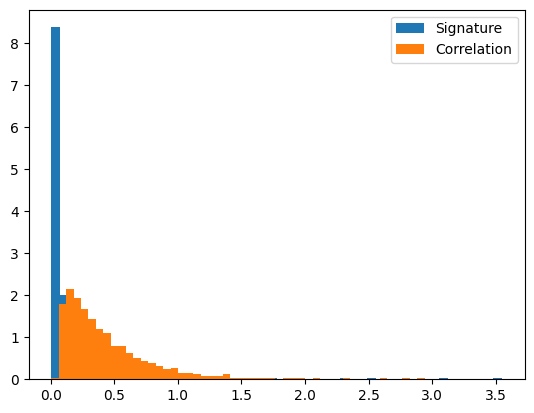

In [ ]:
plt.hist(eigenvalues_sim[10:], bins=50, density=True, label='Signature')
#plt.hist(eigenvalues_sim_log[10:], bins=50, density=True, label='Signature_log')
plt.hist(eigenvalues_corr[10:], bins=50, density=True, label='Correlation')
plt.legend()
plt.show()

In [ ]:
market_mode_sim, filter_rmt_sim = filtered_matrix(eigenvalues_sim, eigenvectors_sim, sim_mtx)
#market_mode_sim_log, filter_rmt_sim_log = filtered_matrix(eigenvalues_sim_log, eigenvectors_sim_log, sim_mtx_log)
market_mode_corr, filter_rmt_corr = filtered_matrix(eigenvalues_corr, eigenvectors_corr, df1.corr())

In [ ]:
# Community detection with Signature
r=1
filter_rmt_sim = pd.DataFrame(np.real(filter_rmt_sim))
np.fill_diagonal(filter_rmt_sim.values, 0)
filter_rmt_sim = pd.DataFrame(np.where(np.abs(filter_rmt_sim), np.abs(filter_rmt_sim), 0)) #>c_tau
G_sim_L=nx.from_numpy_array(filter_rmt_sim.values)
comms_sim_L = nx.community.louvain_communities(G_sim_L, weight='weight', resolution=r, threshold=0.5)
print("Number of community find: ", len(comms_sim_L))
Modularity_sim_L = nx.community.modularity(G_sim_L,comms_sim_L, resolution=r)
print("Modularity Value: ", Modularity_sim_L)
for i in range(len(comms_sim_L)):
  print(f"element inside community {i}: {len(comms_sim_L[i])} with negative correlation {(df1[list(comms_sim_L[i])].corr() < 0).sum().sum()}") #df1[list(comms_sim_L[i])].corr() < 0 df_sim1[list(comms_sim_L[i])] < 0

Number of community find:  6
Modularity Value:  0.19875837337458124
element inside community 0: 39 with negative correlation 0
element inside community 1: 83 with negative correlation 0
element inside community 2: 123 with negative correlation 0
element inside community 3: 30 with negative correlation 0
element inside community 4: 48 with negative correlation 0
element inside community 5: 117 with negative correlation 0


In [ ]:
df_sim1[sorted(list(comms_sim_L[5]))]

In [ ]:
# Community detection with Correlation
r=1
filter_rmt_corr = pd.DataFrame(np.real(filter_rmt_corr))
np.fill_diagonal(filter_rmt_corr.values, 0)
filter_rmt_corr = pd.DataFrame(np.where(np.abs(filter_rmt_corr), np.abs(filter_rmt_corr), 0)) #>c_tau
G_sim_L=nx.from_numpy_array(filter_rmt_corr.values)
comms_sim_L = nx.community.louvain_communities(G_sim_L, weight='weight', resolution=r, threshold=0.5)
print("Number of community find: ", len(comms_sim_L))
Modularity_sim_L = nx.community.modularity(G_sim_L,comms_sim_L, resolution=r)
print("Modularity Value: ", Modularity_sim_L)
for i in range(len(comms_sim_L)):
  print(f"element inside community {i}: {len(comms_sim_L[i])} with negative correlation {(df1[list(comms_sim_L[i])].corr() < 0).sum().sum()}")

Number of community find:  4
Modularity Value:  0.11280841347282082
element inside community 0: 161 with negative correlation 0
element inside community 1: 102 with negative correlation 0
element inside community 2: 143 with negative correlation 0
element inside community 3: 34 with negative correlation 0


## Network Properties

In [ ]:
corr_matrix = df_ret.corr()
corr_matrix

MMM       AOS       ABT       ACN       ADM      ADBE       ADP  \
MMM   1.000000  0.570842  0.477400  0.548666  0.485586  0.401659  0.581769   
AOS   0.570842  1.000000  0.385674  0.491615  0.436172  0.417295  0.504367   
ABT   0.477400  0.385674  1.000000  0.532610  0.380264  0.460239  0.544406   
ACN   0.548666  0.491615  0.532610  1.000000  0.465608  0.557058  0.657193   
ADM   0.485586  0.436172  0.380264  0.465608  1.000000  0.315248  0.491572   
...        ...       ...       ...       ...       ...       ...       ...   
XEL   0.374624  0.277067  0.416041  0.389768  0.377512  0.296168  0.485215   
YUM   0.430929  0.395692  0.393823  0.472324  0.378195  0.387324  0.487630   
ZBRA  0.459518  0.466707  0.403871  0.499794  0.382715  0.453130  0.466528   
ZBH   0.459536  0.392758  0.474218  0.496154  0.398361  0.378948  0.482138   
ZION  0.490858  0.473961  0.323094  0.445663  0.472000  0.312642  0.449330   

           AAP       AES       AFL  ...       WHR       WMB       WTW  \
MMM   0.335784  0.421383  0.549036  ...  0.512569  0.357919  0.448742   
AOS   0.345124  0.401945  0.508410  ...  0.520420  0.347375  0.405517   
ABT   0.287442  0.353843  0.410412  ...  0.405054  0.263197  0.429643   
ACN   0.332608  0.476440  0.531908  ...  0.469807  0.364775  0.519302   
ADM   0.313202  0.472530  0.524579  ...  0.401668  0.415235  0.404444   
...        ...       ...       ...  ...       ...       ...       ...   
XEL   0.265680  0.485873  0.400215  ...  0.331412  0.229865  0.365742   
YUM   0.321524  0.403053  0.480049  ...  0.403069  0.318799  0.410172   
ZBRA  0.293589  0.385592  0.401269  ...  0.413244  0.353538  0.377363   
ZBH   0.286729  0.438388  0.513130  ...  0.405423  0.356247  0.419402   
ZION  0.339939  0.417146  0.601445  ...  0.431691  0.369633  0.399221   

           GWW      WYNN       XEL       YUM      ZBRA       ZBH      ZION  
MMM   0.523023  0.373752  0.374624  0.430929  0.459518  0.459536  0.490858  
AOS   0.507491  0.396136  0.277067  0.395692  0.466707  0.392758  0.473961  
ABT   0.406869  0.262627  0.416041  0.393823  0.403871  0.474218  0.323094  
ACN   0.464141  0.384150  0.389768  0.472324  0.499794  0.496154  0.445663  
ADM   0.419918  0.352588  0.377512  0.378195  0.382715  0.398361  0.472000  
...        ...       ...       ...       ...       ...       ...       ...  
XEL   0.339806  0.161134  1.000000  0.345077  0.216665  0.296861  0.186837  
YUM   0.375603  0.369303  0.345077  1.000000  0.354467  0.427793  0.354068  
ZBRA  0.379308  0.378132  0.216665  0.354467  1.000000  0.366904  0.395212  
ZBH   0.363535  0.411873  0.296861  0.427793  0.366904  1.000000  0.426538  
ZION  0.415602  0.419584  0.186837  0.354068  0.395212  0.426538  1.000000  

[440 rows x 440 columns]

In [ ]:
tau_list = [1.96, 2.326, 2.575, 3.291]

In [ ]:
adj_mtx = np.where(np.abs(corr_matrix)>c_tau_, np.abs(corr_matrix), 0)
G_threshold=nx.from_numpy_array(adj_mtx)

In [ ]:
adj_mtx = np.where(np.abs(sim_mtx)>c_tau_, np.abs(sim_mtx), 0)
G_threshold_sig=nx.from_numpy_array(adj_mtx)

In [ ]:
graph_metric = ["Degree Centrality", "Betweenness Centrality", "Eigenvector Centrality", "Closeness Centrality","Clustering Coefficient"]

In [ ]:
t_list =[]
for i,t in enumerate(tau_list):
  # find critical value
  c_tau_ = np.round((np.exp(2*t/np.sqrt(T_-3))-1)/(np.exp(2*t/np.sqrt(T_-3))+1), 6)
  t_list.append(c_tau_)

In [ ]:
t_list

[0.247769, 0.291574, 0.320704, 0.401022]

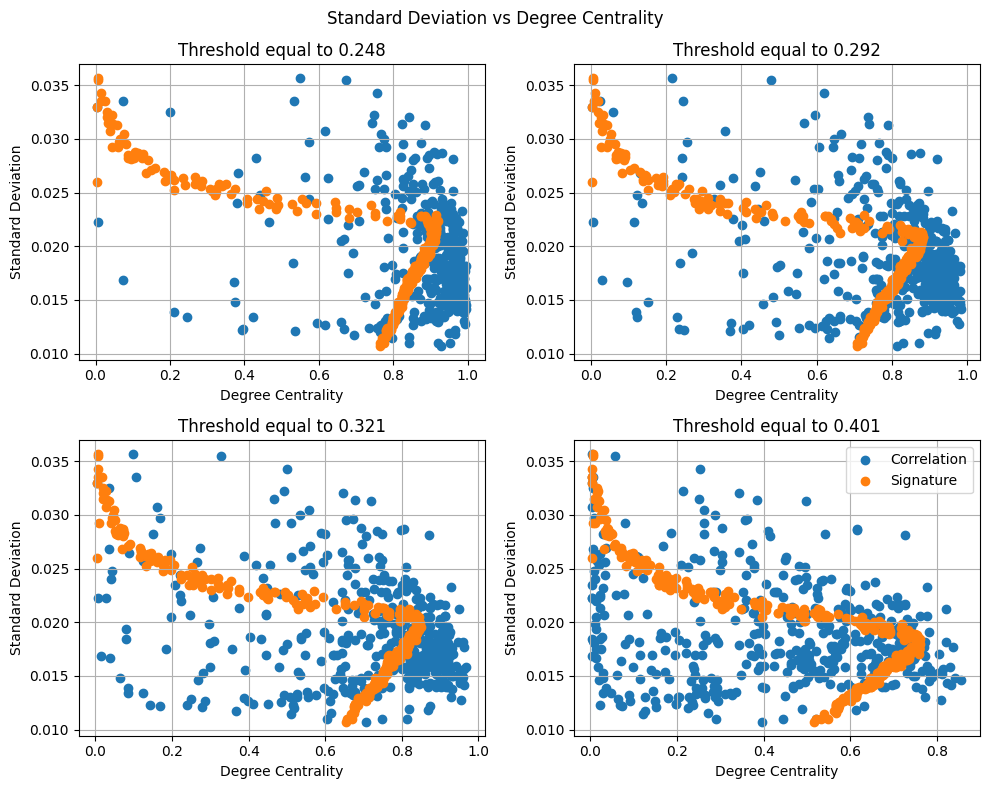

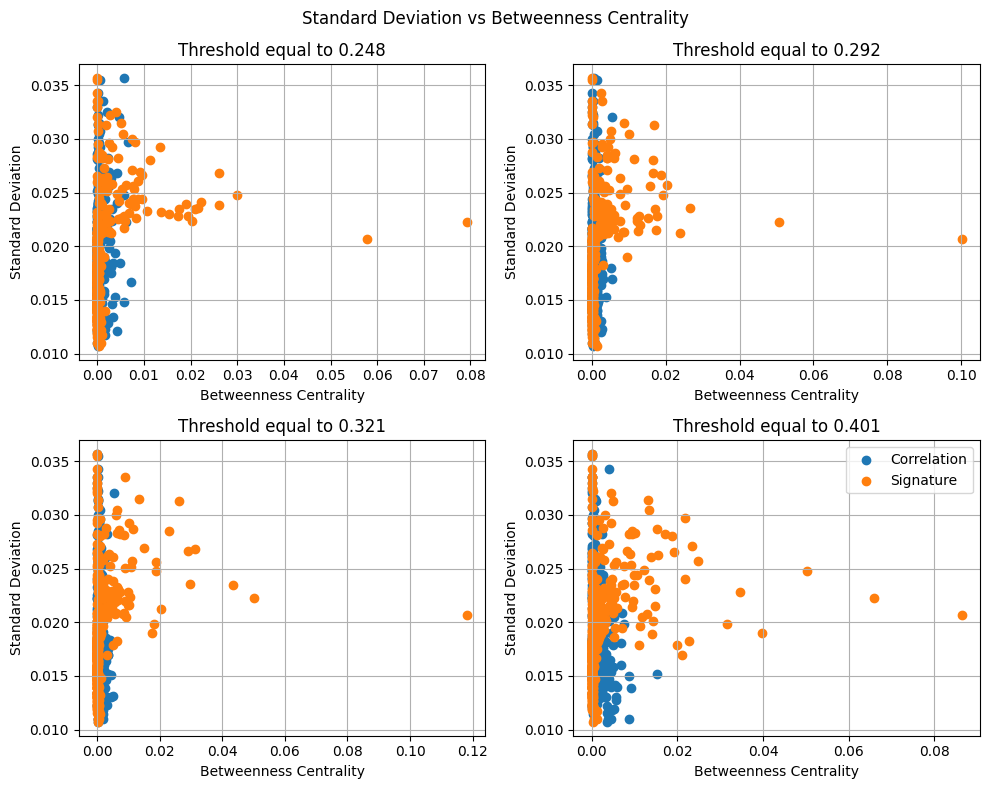

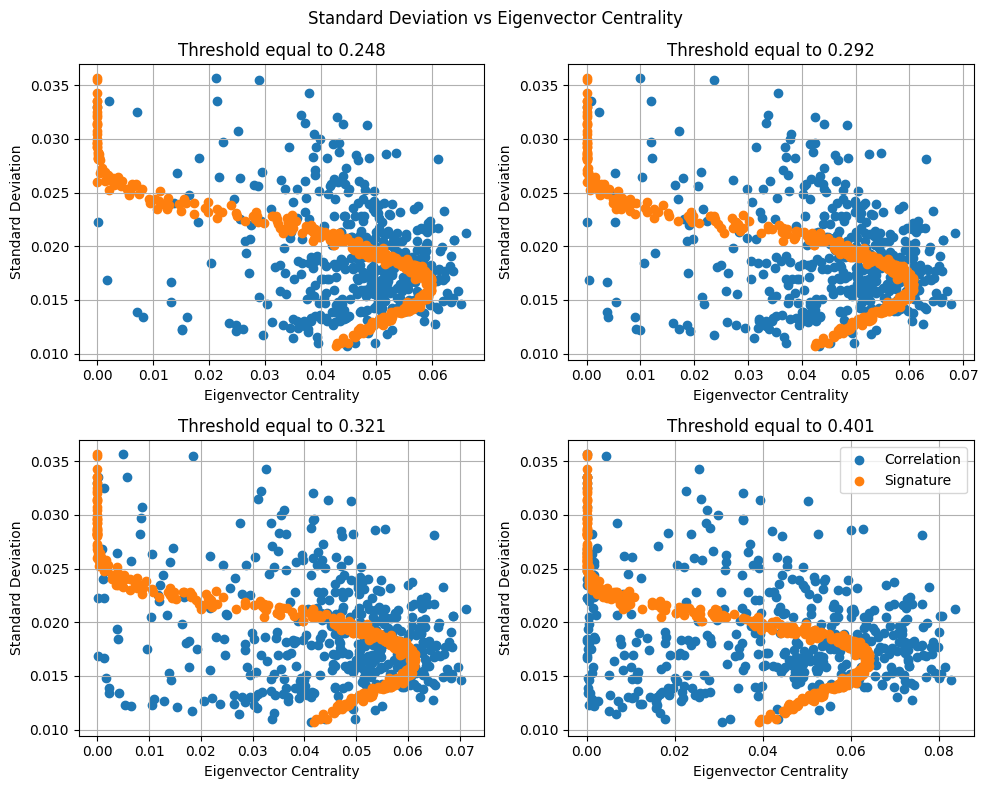

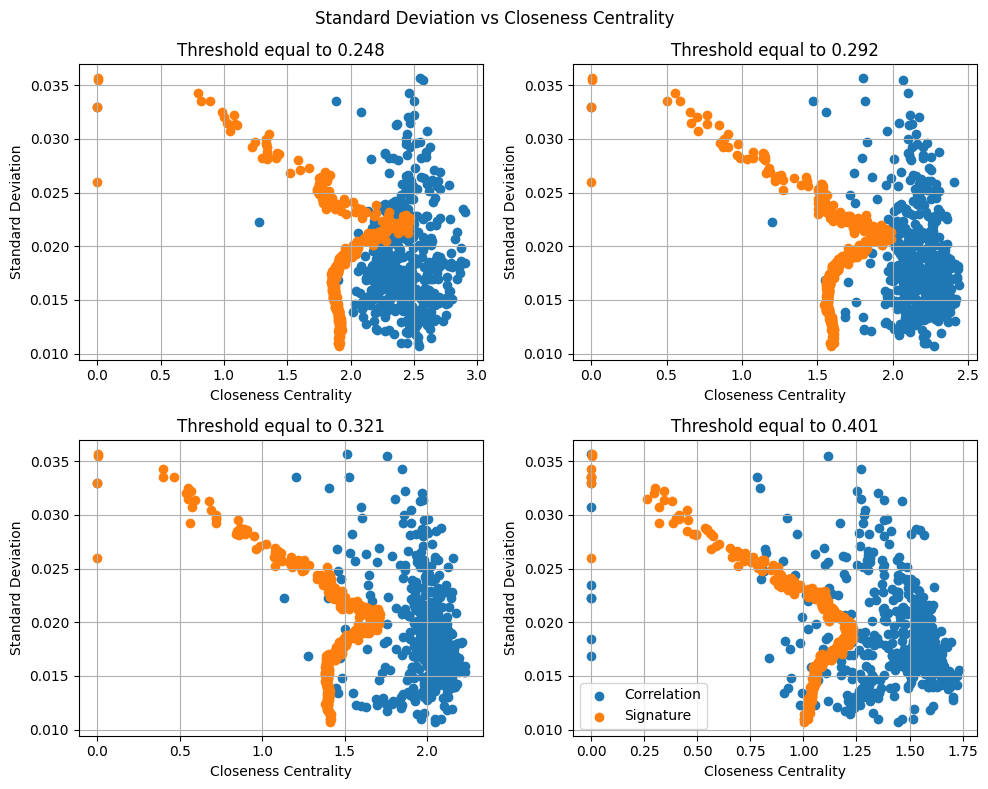

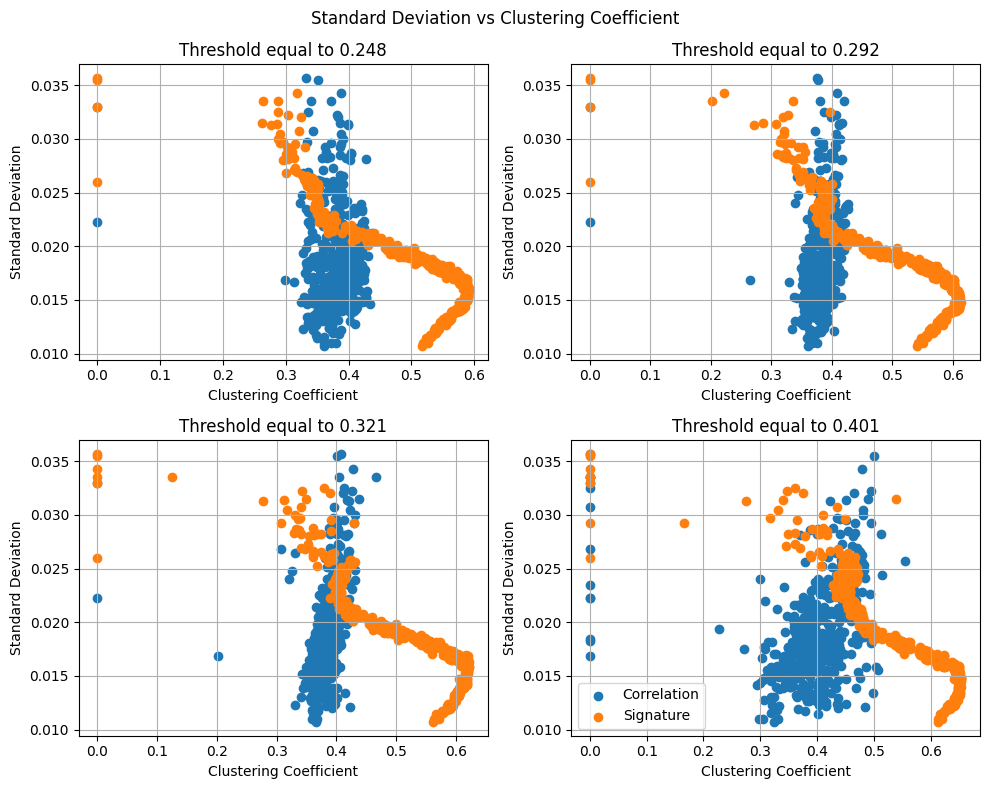

In [ ]:
for netstat in graph_metric:
  t_list, val_list , val_sig_list = [], [], []
  for i,t in enumerate(tau_list):
    # find critical value
    c_tau_ = np.round((np.exp(2*t/np.sqrt(T_-3))-1)/(np.exp(2*t/np.sqrt(T_-3))+1), 6)
    # Filter the correlation matrix
    adj_mtx = np.where(np.abs(corr_matrix)>c_tau_, np.abs(corr_matrix), 0)
    G_threshold=nx.from_numpy_array(adj_mtx)
    # Filter the signature-based similarity matrix
    adj_mtx = np.where(np.abs(sim_mtx)>c_tau_, np.abs(sim_mtx), 0)
    G_threshold_sig=nx.from_numpy_array(adj_mtx)
    # Compute the network statistics
    val_sig = network_metrics(G_threshold_sig, netstat)
    val = network_metrics(G_threshold, netstat)
    val_list.append(val)
    val_sig_list.append(val_sig)
    t_list.append(c_tau_)

  fig, axs = plt.subplots(2, 2, figsize=(10,8))
  axs[0,0].scatter(val_list[0].values() ,df1.std(), label='Correlation')
  axs[0,0].scatter(val_sig_list[0].values() ,df1.std(), label='Signature')
  axs[0,0].set_title(f"Threshold equal to {np.round(t_list[0],3)}")
  axs[0,0].set_ylabel("Standard Deviation")
  axs[0,0].set_xlabel(netstat)
  axs[0,0].grid()

  axs[0,1].scatter(val_list[1].values() ,df1.std(), label='Correlation')
  axs[0,1].scatter(val_sig_list[1].values() ,df1.std(), label='Signature')
  axs[0,1].set_title(f"Threshold equal to {np.round(t_list[1],3)}")
  axs[0,1].set_ylabel("Standard Deviation")
  axs[0,1].set_xlabel(netstat)
  axs[0,1].grid()

  axs[1,0].scatter(val_list[2].values() ,df1.std(), label='Correlation')
  axs[1,0].scatter(val_sig_list[2].values() ,df1.std(), label='Signature')
  axs[1,0].set_title(f"Threshold equal to {np.round(t_list[2],3)}")
  axs[1,0].set_ylabel("Standard Deviation")
  axs[1,0].set_xlabel(netstat)
  axs[1,0].grid()

  axs[1,1].scatter(val_list[3].values() ,df1.std(), label='Correlation')
  axs[1,1].scatter(val_sig_list[3].values() ,df1.std(), label='Signature')
  axs[1,1].set_title(f"Threshold equal to {np.round(t_list[3],3)}")
  axs[1,1].set_ylabel("Standard Deviation")
  axs[1,1].set_xlabel(netstat)
  axs[1,1].grid()


  # Adjust layout
  fig.suptitle(f"Standard Deviation vs {netstat}")
  plt.tight_layout()
  #plt.grid()
  plt.legend()
  plt.savefig(f"{netstat}.eps", format="eps", dpi=1000)
  plt.show()

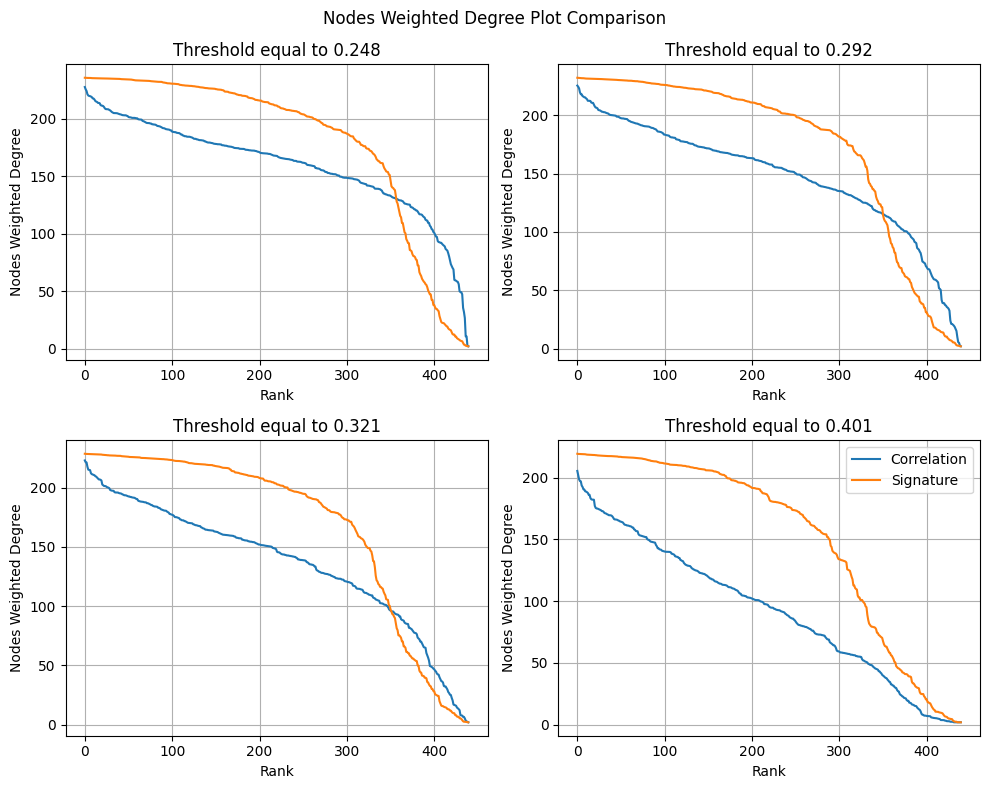

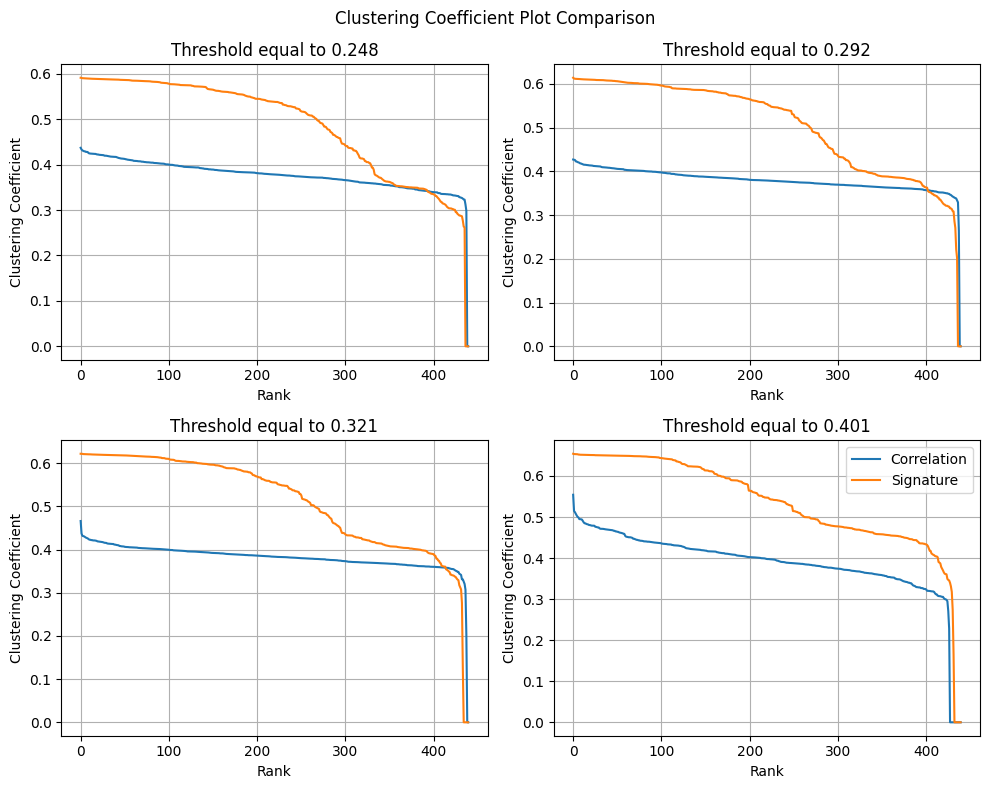

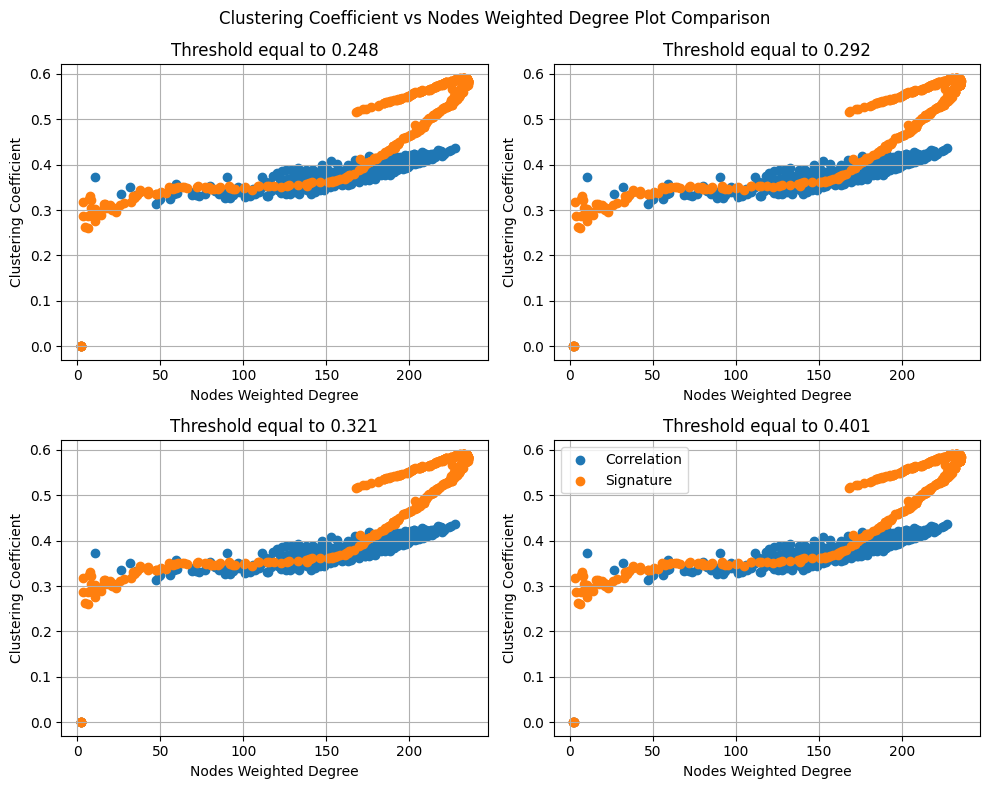

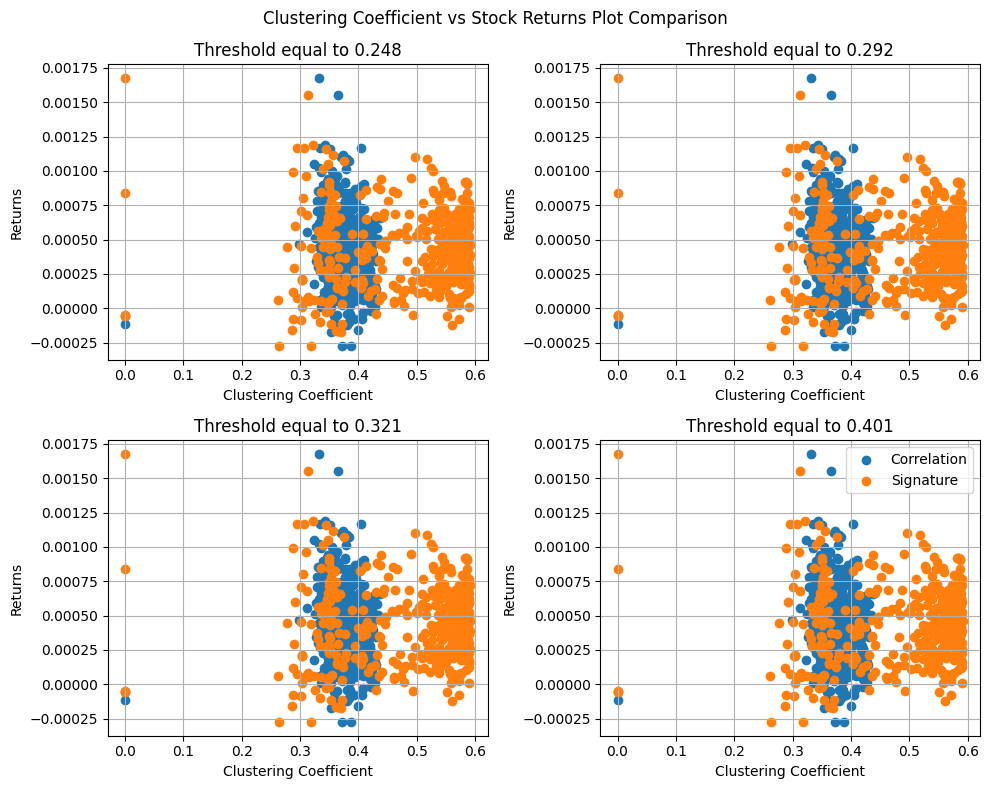

In [ ]:
t_list, degree_list , degree_sig_list, cluster_list , cluster_sig_list = [], [], [], [], []
for i,t in enumerate(tau_list):
  # find critical value
  c_tau_ = np.round((np.exp(2*t/np.sqrt(T_-3))-1)/(np.exp(2*t/np.sqrt(T_-3))+1), 6)
  # Filter the correlation matrix
  adj_mtx = np.where(np.abs(corr_matrix)>c_tau_, np.abs(corr_matrix), 0)
  G_threshold=nx.from_numpy_array(adj_mtx)
  # Filter the signature-based similarity matrix
  adj_mtx = np.where(np.abs(sim_mtx)>c_tau_, np.abs(sim_mtx), 0)
  G_threshold_sig=nx.from_numpy_array(adj_mtx)
  # Compute the network statistics
  # degree
  degree_sequence_sig = dict(G_threshold_sig.degree(weight='weight'))
  degree_sequence = dict(G_threshold.degree(weight='weight'))
  # clustering
  val_sig = network_metrics(G_threshold_sig, "Clustering Coefficient")
  val = network_metrics(G_threshold, "Clustering Coefficient")
  # Append value
  degree_list.append(degree_sequence)
  degree_sig_list.append(degree_sequence_sig)
  cluster_list.append(val)
  cluster_sig_list.append(val_sig)
  t_list.append(c_tau_)

# Plot Degree --------------------------
fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0,0].plot(sorted(degree_list[0].values(), reverse=True),label='Correlation')
axs[0,0].plot(sorted(degree_sig_list[0].values(), reverse=True), label='Signature')
axs[0,0].set_title(f"Threshold equal to {np.round(t_list[0],3)}")
axs[0,0].set_ylabel("Nodes Weighted Degree")
axs[0,0].set_xlabel("Rank")
axs[0,0].grid()

axs[0,1].plot(sorted(degree_list[1].values(), reverse=True),label='Correlation')
axs[0,1].plot(sorted(degree_sig_list[1].values(), reverse=True), label='Signature')
axs[0,1].set_title(f"Threshold equal to {np.round(t_list[1],3)}")
axs[0,1].set_ylabel("Nodes Weighted Degree")
axs[0,1].set_xlabel("Rank")
axs[0,1].grid()

axs[1,0].plot(sorted(degree_list[2].values(), reverse=True),label='Correlation')
axs[1,0].plot(sorted(degree_sig_list[2].values(), reverse=True), label='Signature')
axs[1,0].set_title(f"Threshold equal to {np.round(t_list[2],3)}")
axs[1,0].set_ylabel("Nodes Weighted Degree")
axs[1,0].set_xlabel("Rank")
axs[1,0].grid()

axs[1,1].plot(sorted(degree_list[3].values(), reverse=True),label='Correlation')
axs[1,1].plot(sorted(degree_sig_list[3].values(), reverse=True), label='Signature')
axs[1,1].set_title(f"Threshold equal to {np.round(t_list[3],3)}")
axs[1,1].set_ylabel("Nodes Weighted Degree")
axs[1,1].set_xlabel("Rank")
axs[1,1].grid()

# Adjust layout
fig.suptitle("Nodes Weighted Degree Plot Comparison")
plt.tight_layout()
#plt.grid()
plt.legend()
plt.savefig("DegreeComparison.eps", format="eps", dpi=1000)
plt.show()

# Clustering Dist-------------------------
fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0,0].plot(sorted(cluster_list[0].values(), reverse=True),label='Correlation')
axs[0,0].plot(sorted(cluster_sig_list[0].values(), reverse=True), label='Signature')
axs[0,0].set_title(f"Threshold equal to {np.round(t_list[0],3)}")
axs[0,0].set_ylabel("Clustering Coefficient")
axs[0,0].set_xlabel("Rank")
axs[0,0].grid()

axs[0,1].plot(sorted(cluster_list[1].values(), reverse=True),label='Correlation')
axs[0,1].plot(sorted(cluster_sig_list[1].values(), reverse=True), label='Signature')
axs[0,1].set_title(f"Threshold equal to {np.round(t_list[1],3)}")
axs[0,1].set_ylabel("Clustering Coefficient")
axs[0,1].set_xlabel("Rank")
axs[0,1].grid()

axs[1,0].plot(sorted(cluster_list[2].values(), reverse=True),label='Correlation')
axs[1,0].plot(sorted(cluster_sig_list[2].values(), reverse=True), label='Signature')
axs[1,0].set_title(f"Threshold equal to {np.round(t_list[2],3)}")
axs[1,0].set_ylabel("Clustering Coefficient")
axs[1,0].set_xlabel("Rank")
axs[1,0].grid()

axs[1,1].plot(sorted(cluster_list[3].values(), reverse=True),label='Correlation')
axs[1,1].plot(sorted(cluster_sig_list[3].values(), reverse=True), label='Signature')
axs[1,1].set_title(f"Threshold equal to {np.round(t_list[3],3)}")
axs[1,1].set_ylabel("Clustering Coefficient")
axs[1,1].set_xlabel("Rank")
axs[1,1].grid()

# Adjust layout
fig.suptitle("Clustering Coefficient Plot Comparison")
plt.tight_layout()
#plt.grid()
plt.legend()
plt.savefig("ClusteringComparison.eps", format="eps", dpi=1000)
plt.show()

# Degree vs Clusteing plot -------------------------
fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0,0].scatter(degree_list[0].values(),cluster_list[0].values(),label='Correlation')
axs[0,0].scatter(degree_sig_list[0].values(),cluster_sig_list[0].values(), label='Signature')
axs[0,0].set_title(f"Threshold equal to {np.round(t_list[0],3)}")
axs[0,0].set_ylabel("Clustering Coefficient")
axs[0,0].set_xlabel("Nodes Weighted Degree")
axs[0,0].grid()

axs[0,1].scatter(degree_list[0].values(),cluster_list[0].values(),label='Correlation')
axs[0,1].scatter(degree_sig_list[0].values(),cluster_sig_list[0].values(), label='Signature')
axs[0,1].set_title(f"Threshold equal to {np.round(t_list[1],3)}")
axs[0,1].set_ylabel("Clustering Coefficient")
axs[0,1].set_xlabel("Nodes Weighted Degree")
axs[0,1].grid()

axs[1,0].scatter(degree_list[0].values(),cluster_list[0].values(),label='Correlation')
axs[1,0].scatter(degree_sig_list[0].values(),cluster_sig_list[0].values(), label='Signature')
axs[1,0].set_title(f"Threshold equal to {np.round(t_list[2],3)}")
axs[1,0].set_ylabel("Clustering Coefficient")
axs[1,0].set_xlabel("Nodes Weighted Degree")
axs[1,0].grid()

axs[1,1].scatter(degree_list[0].values(),cluster_list[0].values(),label='Correlation')
axs[1,1].scatter(degree_sig_list[0].values(),cluster_sig_list[0].values(), label='Signature')
axs[1,1].set_title(f"Threshold equal to {np.round(t_list[3],3)}")
axs[1,1].set_ylabel("Clustering Coefficient")
axs[1,1].set_xlabel("Nodes Weighted Degree")
axs[1,1].grid()

# Adjust layout
fig.suptitle("Clustering Coefficient vs Nodes Weighted Degree Plot Comparison")
plt.tight_layout()
#plt.grid()
plt.legend()
plt.savefig("DegreeClustering.eps", format="eps", dpi=1000)
plt.show()

# Retuns vs Clusteing plot -------------------------
fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0,0].scatter(cluster_list[0].values(),df1.mean(), label='Correlation')
axs[0,0].scatter(cluster_sig_list[0].values(), df1.mean(), label='Signature')
axs[0,0].set_title(f"Threshold equal to {np.round(t_list[0],3)}")
axs[0,0].set_xlabel("Clustering Coefficient")
axs[0,0].set_ylabel("Returns")
axs[0,0].grid()

axs[0,1].scatter(cluster_list[0].values(), df1.mean(), label='Correlation')
axs[0,1].scatter(cluster_sig_list[0].values(), df1.mean(), label='Signature')
axs[0,1].set_title(f"Threshold equal to {np.round(t_list[1],3)}")
axs[0,1].set_xlabel("Clustering Coefficient")
axs[0,1].set_ylabel("Returns")
axs[0,1].grid()

axs[1,0].scatter(cluster_list[0].values(), df1.mean(), label='Correlation')
axs[1,0].scatter(cluster_sig_list[0].values(), df1.mean(), label='Signature')
axs[1,0].set_title(f"Threshold equal to {np.round(t_list[2],3)}")
axs[1,0].set_xlabel("Clustering Coefficient")
axs[1,0].set_ylabel("Returns")
axs[1,0].grid()

axs[1,1].scatter(cluster_list[0].values(), df1.mean(), label='Correlation')
axs[1,1].scatter(cluster_sig_list[0].values(), df1.mean(), label='Signature')
axs[1,1].set_title(f"Threshold equal to {np.round(t_list[3],3)}")
axs[1,1].set_xlabel("Clustering Coefficient")
axs[1,1].set_ylabel("Returns")
axs[1,1].grid()

# Adjust layout
fig.suptitle("Clustering Coefficient vs Stock Returns Plot Comparison")
plt.tight_layout()
#plt.grid()
plt.legend()
plt.savefig("ReturnsClustering.eps", format="eps", dpi=1000)
plt.show()

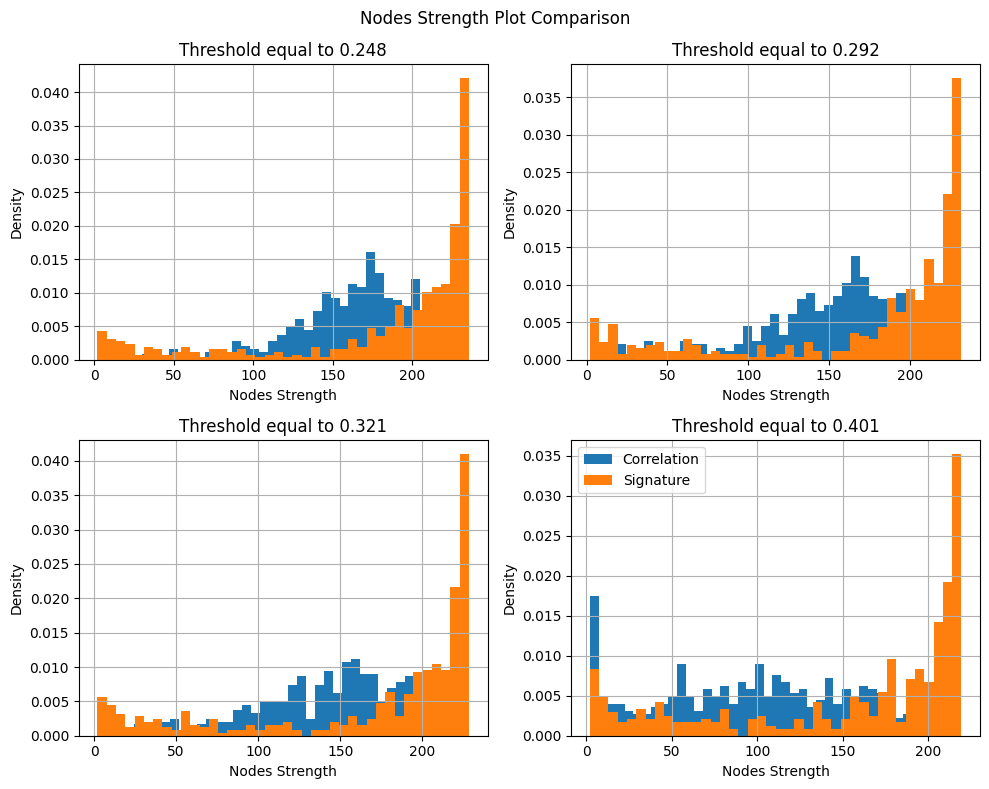

In [ ]:
# Plot Degree --------------------------
nbin=40
fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0,0].hist(degree_list[0].values(), bins=nbin, density=True, label='Correlation')
axs[0,0].hist(degree_sig_list[0].values(), bins=nbin, density=True, label='Signature')
axs[0,0].set_title(f"Threshold equal to {np.round(t_list[0],3)}")
axs[0,0].set_ylabel("Density")
axs[0,0].set_xlabel("Nodes Strength")
axs[0,0].grid()

axs[0,1].hist(sorted(degree_list[1].values(), reverse=True), bins=nbin, density=True,label='Correlation')
axs[0,1].hist(sorted(degree_sig_list[1].values(), reverse=True), bins=nbin, density=True, label='Signature')
axs[0,1].set_title(f"Threshold equal to {np.round(t_list[1],3)}")
axs[0,1].set_ylabel("Density")
axs[0,1].set_xlabel("Nodes Strength")
axs[0,1].grid()

axs[1,0].hist(sorted(degree_list[2].values(), reverse=True), bins=nbin, density=True,label='Correlation')
axs[1,0].hist(sorted(degree_sig_list[2].values(), reverse=True), bins=nbin, density=True, label='Signature')
axs[1,0].set_title(f"Threshold equal to {np.round(t_list[2],3)}")
axs[1,0].set_ylabel("Density")
axs[1,0].set_xlabel("Nodes Strength")
axs[1,0].grid()

axs[1,1].hist(sorted(degree_list[3].values(), reverse=True), bins=nbin, density=True,label='Correlation')
axs[1,1].hist(sorted(degree_sig_list[3].values(), reverse=True), bins=nbin, density=True, label='Signature')
axs[1,1].set_title(f"Threshold equal to {np.round(t_list[3],3)}")
axs[1,1].set_ylabel("Density")
axs[1,1].set_xlabel("Nodes Strength")
axs[1,1].grid()

# Adjust layout
fig.suptitle("Nodes Strength Plot Comparison")
plt.tight_layout()
#plt.grid()
plt.legend()
#plt.savefig("DegreeComparison.eps", format="eps", dpi=1000)
plt.show()


# Portfolio Optimization Step

In [ ]:
T_ = df_signature_leadlag.shape[0]
df1 = df_ret.copy()
df1.columns= np.linspace(0, df.shape[1]-1, num=df.shape[1])

In [ ]:
tau_list = [1.96, 2.326, 2.575, 3.291]
t_list =[]
for i,t in enumerate(tau_list):
  # find critical value
  c_tau_ = np.round((np.exp(2*t/np.sqrt(T_-3))-1)/(np.exp(2*t/np.sqrt(T_-3))+1), 6)
  t_list.append(c_tau_)


## Stock Selection


In [ ]:
vol = pd.read_csv("volume_sp500_train.csv", index_col="Unnamed: 0")
vol

MMM      AOS       ABT       ABBV      ACN  ATVI  \
2010-07-12 00:00:00  3835094  2002200  11977282        NaN  3226500   NaN   
2010-07-13 00:00:00  6144330  2044200  14423510        NaN  5391800   NaN   
2010-07-14 00:00:00  3724703  1497600  11571697        NaN  2947600   NaN   
2010-07-15 00:00:00  5551832  1057200  12081075        NaN  3112600   NaN   
2010-07-16 00:00:00  5145790  3027600  19046269        NaN  2709900   NaN   
...                      ...      ...       ...        ...      ...   ...   
2023-06-30 00:00:00  6084052   452600   4449200  8710500.0  2668500   NaN   
2023-07-03 00:00:00  1913002   480500   2268000  2674600.0  1172800   NaN   
2023-07-05 00:00:00  4716306   838500   4968600  6903300.0  1924800   NaN   
2023-07-06 00:00:00  6137035   960900   5325000  6091000.0  1375800   NaN   
2023-07-07 00:00:00  4770126  1152500   5053700  6872700.0  1902800   NaN   

                         ADM      ADBE      ADP      AAP  ...     WTW  \
2010-07-12 00:00:00  2730400   7012700  2621181   703000  ...  272744   
2010-07-13 00:00:00  4691200  13577900  3554705  1569300  ...  407209   
2010-07-14 00:00:00  3195200   9457100  3208221   926300  ...  196375   
2010-07-15 00:00:00  3616800   4838200  3025412  1016500  ...  198414   
2010-07-16 00:00:00  7020900   7254200  4492672  1202000  ...  303472   
...                      ...       ...      ...      ...  ...     ...   
2023-06-30 00:00:00  2942400   3095900  1781800  3979600  ...  758300   
2023-07-03 00:00:00  1485100   1491000   848300  1234700  ...  327900   
2023-07-05 00:00:00  2412500   2190000  1113000  2212100  ...  557000   
2023-07-06 00:00:00  3300600   2100900  1889300  2315000  ...  518200   
2023-07-07 00:00:00  3257100   2324500  1678400  2779300  ...  558200   

                         GWW     WYNN      XEL        XYL       YUM    ZBRA  \
2010-07-12 00:00:00   660600  2251600  1131700        NaN   7302194  168900   
2010-07-13 00:00:00   847100  3203100  2098800        NaN   8862200  255800   
2010-07-14 00:00:00   879000  3168600  2511700        NaN  14936002  223000   
2010-07-15 00:00:00  2510700  2589700  2180200        NaN   7096465  215300   
2010-07-16 00:00:00  1153000  2445800  2282900        NaN   6104682  204200   
...                      ...      ...      ...        ...       ...     ...   
2023-06-30 00:00:00   269200  1349400  3298700  1278100.0   1391800  342400   
2023-07-03 00:00:00   135500  1120300  1375000   700900.0    845600  184100   
2023-07-05 00:00:00   245800  3301900  4555300  1036100.0   1743100  369000   
2023-07-06 00:00:00   251900  2726500  5359700  1284400.0   1869900  292000   
2023-07-07 00:00:00   242900  1862100  3730900  1058000.0   1530400  251200   

                         ZBH     ZION        ZTS  
2010-07-12 00:00:00  1403375  2337800        NaN  
2010-07-13 00:00:00  2166708  4079900        NaN  
2010-07-14 00:00:00  1622971  4756900        NaN  
2010-07-15 00:00:00  1697646  3536300        NaN  
2010-07-16 00:00:00  1595470  5927300        NaN  
...                      ...      ...        ...  
2023-06-30 00:00:00  1281900  3698700  2061100.0  
2023-07-03 00:00:00   662500  2621400   742900.0  
2023-07-05 00:00:00  1181600  3181200  1702400.0  
2023-07-06 00:00:00   885900  4488000  1564300.0  
2023-07-07 00:00:00  1165500  4500000  1315400.0  

[3270 rows x 503 columns]

In [ ]:
stock_sp = list(df.columns)
stock_sp_str = [str(i) for i in stock_sp]

In [ ]:
df_vol = vol[stock_sp_str]
df_vol

MMM      AOS       ABT      ACN      ADM      ADBE  \
2010-07-12 00:00:00  3835094  2002200  11977282  3226500  2730400   7012700   
2010-07-13 00:00:00  6144330  2044200  14423510  5391800  4691200  13577900   
2010-07-14 00:00:00  3724703  1497600  11571697  2947600  3195200   9457100   
2010-07-15 00:00:00  5551832  1057200  12081075  3112600  3616800   4838200   
2010-07-16 00:00:00  5145790  3027600  19046269  2709900  7020900   7254200   
...                      ...      ...       ...      ...      ...       ...   
2023-06-30 00:00:00  6084052   452600   4449200  2668500  2942400   3095900   
2023-07-03 00:00:00  1913002   480500   2268000  1172800  1485100   1491000   
2023-07-05 00:00:00  4716306   838500   4968600  1924800  2412500   2190000   
2023-07-06 00:00:00  6137035   960900   5325000  1375800  3300600   2100900   
2023-07-07 00:00:00  4770126  1152500   5053700  1902800  3257100   2324500   

                         ADP      AAP      AES       AFL  ...      WHR  \
2010-07-12 00:00:00  2621181   703000  6444500   5761800  ...   818500   
2010-07-13 00:00:00  3554705  1569300  4839100  11767600  ...  1485400   
2010-07-14 00:00:00  3208221   926300  5886900   8074200  ...  2015300   
2010-07-15 00:00:00  3025412  1016500  5184700   7972000  ...  1368300   
2010-07-16 00:00:00  4492672  1202000  7567800   8490600  ...  2118200   
...                      ...      ...      ...       ...  ...      ...   
2023-06-30 00:00:00  1781800  3979600  3842200   1890400  ...   429000   
2023-07-03 00:00:00   848300  1234700  2361000    952900  ...   312800   
2023-07-05 00:00:00  1113000  2212100  4642200   2407700  ...   345800   
2023-07-06 00:00:00  1889300  2315000  3372200   2383000  ...   441700   
2023-07-07 00:00:00  1678400  2779300  4315900   2608400  ...   770900   

                          WMB     WTW      GWW     WYNN      XEL       YUM  \
2010-07-12 00:00:00   6963567  272744   660600  2251600  1131700   7302194   
2010-07-13 00:00:00   7587831  407209   847100  3203100  2098800   8862200   
2010-07-14 00:00:00   5814156  196375   879000  3168600  2511700  14936002   
2010-07-15 00:00:00   6448602  198414  2510700  2589700  2180200   7096465   
2010-07-16 00:00:00   7913027  303472  1153000  2445800  2282900   6104682   
...                       ...     ...      ...      ...      ...       ...   
2023-06-30 00:00:00   7552600  758300   269200  1349400  3298700   1391800   
2023-07-03 00:00:00   2930300  327900   135500  1120300  1375000    845600   
2023-07-05 00:00:00  10043600  557000   245800  3301900  4555300   1743100   
2023-07-06 00:00:00   6686100  518200   251900  2726500  5359700   1869900   
2023-07-07 00:00:00   6676000  558200   242900  1862100  3730900   1530400   

                       ZBRA      ZBH     ZION  
2010-07-12 00:00:00  168900  1403375  2337800  
2010-07-13 00:00:00  255800  2166708  4079900  
2010-07-14 00:00:00  223000  1622971  4756900  
2010-07-15 00:00:00  215300  1697646  3536300  
2010-07-16 00:00:00  204200  1595470  5927300  
...                     ...      ...      ...  
2023-06-30 00:00:00  342400  1281900  3698700  
2023-07-03 00:00:00  184100   662500  2621400  
2023-07-05 00:00:00  369000  1181600  3181200  
2023-07-06 00:00:00  292000   885900  4488000  
2023-07-07 00:00:00  251200  1165500  4500000  

[3270 rows x 440 columns]

In [ ]:
df_turnover = df_vol * df
df_turnover = df_turnover.drop(columns=["GOOG"])

In [ ]:
df_mean = pd.DataFrame({"Turnover":df_turnover.mean()}).sort_values(by="Turnover", ascending=False)
df_mean

Turnover
AAPL  8.054852e+09
TSLA  6.902295e+09
AMZN  5.094904e+09
MSFT  3.460980e+09
NVDA  2.938553e+09
...            ...
WRB   3.984999e+07
BRO   3.914654e+07
TECH  3.592834e+07
NDSN  3.176685e+07
ROL   2.726624e+07

[439 rows x 1 columns]

In [ ]:
head_10 = list(df_mean.head(10).index)
head_20 = list(df_mean.head(20).index)
head_40 = list(df_mean.head(40).index)
head_80 = list(df_mean.head(80).index)
print("first 10:", head_10)
print("first 20:", head_20)
print("first 40:", head_40)
print("first 80:", head_80)

first 10: ['AAPL', 'TSLA', 'AMZN', 'MSFT', 'NVDA', 'WMT', 'GOOGL', 'AMD', 'NFLX', 'BAC']
first 20: ['AAPL', 'TSLA', 'AMZN', 'MSFT', 'NVDA', 'WMT', 'GOOGL', 'AMD', 'NFLX', 'BAC', 'JPM', 'BA', 'XOM', 'C', 'INTC', 'GE', 'WFC', 'V', 'PFE', 'T']
first 40: ['AAPL', 'TSLA', 'AMZN', 'MSFT', 'NVDA', 'WMT', 'GOOGL', 'AMD', 'NFLX', 'BAC', 'JPM', 'BA', 'XOM', 'C', 'INTC', 'GE', 'WFC', 'V', 'PFE', 'T', 'DIS', 'CSCO', 'JNJ', 'CVX', 'MU', 'QCOM', 'PG', 'VZ', 'HD', 'BKNG', 'UNH', 'ORCL', 'IBM', 'CMCSA', 'CRM', 'GS', 'MRK', 'MA', 'GILD', 'KO']
first 80: ['AAPL', 'TSLA', 'AMZN', 'MSFT', 'NVDA', 'WMT', 'GOOGL', 'AMD', 'NFLX', 'BAC', 'JPM', 'BA', 'XOM', 'C', 'INTC', 'GE', 'WFC', 'V', 'PFE', 'T', 'DIS', 'CSCO', 'JNJ', 'CVX', 'MU', 'QCOM', 'PG', 'VZ', 'HD', 'BKNG', 'UNH', 'ORCL', 'IBM', 'CMCSA', 'CRM', 'GS', 'MRK', 'MA', 'GILD', 'KO', 'F', 'MCD', 'ADBE', 'CAT', 'AVGO', 'PEP', 'SLB', 'BMY', 'AMGN', 'SBUX', 'NKE', 'COST', 'MS', 'FCX', 'TXN', 'OXY', 'MMM', 'LLY', 'COP', 'LOW', 'CVS', 'UNP', 'TGT', 'AMAT', 'PM'

In [ ]:
tail_10 = list(df_mean.tail(10).index)
tail_20 = list(df_mean.tail(20).index)
tail_40 = list(df_mean.tail(40).index)
tail_80 = list(df_mean.tail(80).index)
print("last 10:", tail_10)
print("last 20:", tail_20)
print("last 40:", tail_40)
print("last 80:", tail_80)

last 10: ['IEX', 'BIO', 'TDY', 'AXON', 'GL', 'WRB', 'BRO', 'TECH', 'NDSN', 'ROL']
last 20: ['TRMB', 'L', 'POOL', 'CINF', 'REG', 'ACGL', 'AIZ', 'JKHY', 'FICO', 'TYL', 'IEX', 'BIO', 'TDY', 'AXON', 'GL', 'WRB', 'BRO', 'TECH', 'NDSN', 'ROL']
last 40: ['MAA', 'PNW', 'RVTY', 'AVY', 'LDOS', 'RHI', 'LKQ', 'CBOE', 'PTC', 'TFX', 'PODD', 'CRL', 'WST', 'FRT', 'MKTX', 'BR', 'ATO', 'AOS', 'LNT', 'STE', 'TRMB', 'L', 'POOL', 'CINF', 'REG', 'ACGL', 'AIZ', 'JKHY', 'FICO', 'TYL', 'IEX', 'BIO', 'TDY', 'AXON', 'GL', 'WRB', 'BRO', 'TECH', 'NDSN', 'ROL']
last 80: ['ALK', 'MKC', 'UHS', 'ARE', 'NI', 'AWK', 'KIM', 'PFG', 'NDAQ', 'EXR', 'GPC', 'LYV', 'GNRC', 'FMC', 'RMD', 'ANSS', 'HRL', 'GRMN', 'XRAY', 'HSIC', 'AJG', 'PWR', 'CPRT', 'PKG', 'MOH', 'IRM', 'PNR', 'WAB', 'IT', 'NVR', 'UDR', 'SEE', 'J', 'MPWR', 'EVRG', 'ZBRA', 'SNA', 'FDS', 'RJF', 'CPT', 'MAA', 'PNW', 'RVTY', 'AVY', 'LDOS', 'RHI', 'LKQ', 'CBOE', 'PTC', 'TFX', 'PODD', 'CRL', 'WST', 'FRT', 'MKTX', 'BR', 'ATO', 'AOS', 'LNT', 'STE', 'TRMB', 'L', 'POOL', '

## Baseline Approach

In [ ]:
shorts = True
day = 20 #df_ret.shape[0] #(No rebalancing)

In [ ]:
# Mean-Variance
w_first10_MV, d_first10_MV = find_baseline_weight(df_returns=df_ret, stocks_list=head_10, risk_free=0.0, rebalancing_day=day, type_strategy="mean_variance", short=shorts )
w_first20_MV, d_first20_MV = find_baseline_weight(df_returns=df_ret, stocks_list=head_20, risk_free=0.0, rebalancing_day=day, type_strategy="mean_variance", short=shorts )
w_first40_MV, d_first40_MV = find_baseline_weight(df_returns=df_ret, stocks_list=head_40, risk_free=0.0, rebalancing_day=day, type_strategy="mean_variance", short=shorts )
w_first80_MV, d_first80_MV = find_baseline_weight(df_returns=df_ret, stocks_list=head_80, risk_free=0.0, rebalancing_day=day, type_strategy="mean_variance", short=shorts )

# Max_sharpe
w_first10_MS, d_first10_MS = find_baseline_weight(df_returns=df_ret, stocks_list=head_10, risk_free=0.0, rebalancing_day=day, type_strategy="max_sharpe", short=shorts )
w_first20_MS, d_first20_MS = find_baseline_weight(df_returns=df_ret, stocks_list=head_20, risk_free=0.0, rebalancing_day=day, type_strategy="max_sharpe", short=shorts )
w_first40_MS, d_first40_MS = find_baseline_weight(df_returns=df_ret, stocks_list=head_40, risk_free=0.0, rebalancing_day=day, type_strategy="max_sharpe", short=shorts )
w_first80_MS, d_first80_MS = find_baseline_weight(df_returns=df_ret, stocks_list=head_80, risk_free=0.0, rebalancing_day=day, type_strategy="max_sharpe", short=shorts )

# Global Minimum Variance
w_first10_GMV, d_first10_GMV = find_baseline_weight(df_returns=df_ret, stocks_list=head_10, risk_free=0.0, rebalancing_day=day, type_strategy="minimum_variance", short=shorts )
w_first20_GMV, d_first20_GMV = find_baseline_weight(df_returns=df_ret, stocks_list=head_20, risk_free=0.0, rebalancing_day=day, type_strategy="minimum_variance", short=shorts )
w_first40_GMV, d_first40_GMV = find_baseline_weight(df_returns=df_ret, stocks_list=head_40, risk_free=0.0, rebalancing_day=day, type_strategy="minimum_variance", short=shorts )
w_first80_GMV, d_first80_GMV = find_baseline_weight(df_returns=df_ret, stocks_list=head_80, risk_free=0.0, rebalancing_day=day, type_strategy="minimum_variance", short=shorts )


In [ ]:
initial_weights_10 = len(head_10) * [1. / len(head_10), ]
initial_weights_20 = len(head_20) * [1. / len(head_20), ]
initial_weights_40 = len(head_40) * [1. / len(head_40), ]
initial_weights_80 = len(head_80) * [1. / len(head_80), ]
e1 = (df_ret[head_10].iloc[2:] * initial_weights_10).sum(axis=1)
e2 = (df_ret[head_20].iloc[2:] * initial_weights_20).sum(axis=1)
e3 = (df_ret[head_40].iloc[2:] * initial_weights_40).sum(axis=1)
e4 = (df_ret[head_80].iloc[2:] * initial_weights_80).sum(axis=1)
df_ = pd.concat([e1,e2,e3,e4],axis=1)
df_EW = pd.DataFrame(df_.values, index=df_.index, columns=["first_10", "first_20", "first_40", "first_80"])
df_EW

first_10  first_20  first_40  first_80
2010-07-15 00:00:00 -0.006935 -0.003909  0.000586  0.001298
2010-07-16 00:00:00 -0.029920 -0.033794 -0.031664 -0.029553
2010-07-19 00:00:00  0.010609  0.009757  0.008702  0.007441
2010-07-20 00:00:00  0.008983  0.008218  0.007348  0.010922
2010-07-21 00:00:00 -0.014663 -0.012446 -0.013198 -0.010912
...                       ...       ...       ...       ...
2023-06-30 00:00:00  0.018682  0.013249  0.010011  0.008667
2023-07-03 00:00:00  0.009744  0.007045  0.004154  0.004572
2023-07-05 00:00:00  0.000741 -0.001456 -0.003591 -0.004890
2023-07-06 00:00:00 -0.009814 -0.013018 -0.012674 -0.012980
2023-07-07 00:00:00 -0.002924 -0.002068 -0.004838 -0.000990

[3267 rows x 4 columns]

In [ ]:
mv1 = (df_ret[head_10].iloc[2:] * w_first10_MV.iloc[1:]).sum(axis=1)
mv2 = (df_ret[head_20].iloc[2:] * w_first20_MV.iloc[1:]).sum(axis=1)
mv3 = (df_ret[head_40].iloc[2:] * w_first40_MV.iloc[1:]).sum(axis=1)
mv4 = (df_ret[head_80].iloc[2:] * w_first80_MV.iloc[1:]).sum(axis=1)
df_ = pd.concat([mv1,mv2,mv3,mv4],axis=1)
df_MV = pd.DataFrame(df_.values, index=df_.index, columns=["first_10","first_20","first_40", "first_80"])
df_MV

first_10  first_20  first_40  first_80
2010-07-15 00:00:00 -0.040965 -0.011130 -0.022341 -0.037909
2010-07-16 00:00:00 -0.101133 -0.152560 -0.239324 -0.245777
2010-07-19 00:00:00  0.127795  0.082570  0.182474  0.245980
2010-07-20 00:00:00 -0.089063 -0.083457 -0.141224 -0.105378
2010-07-21 00:00:00 -0.032237 -0.082184 -0.143755 -0.235558
...                       ...       ...       ...       ...
2023-06-30 00:00:00  0.046595  0.074368  0.098929  0.091117
2023-07-03 00:00:00  0.000860 -0.006711 -0.035606 -0.052080
2023-07-05 00:00:00  0.002485  0.023803  0.011190  0.056253
2023-07-06 00:00:00  0.011904  0.044665  0.047357  0.029650
2023-07-07 00:00:00 -0.001360 -0.003135 -0.024105 -0.078266

[3267 rows x 4 columns]

In [ ]:
ms1 = (df_ret[head_10].iloc[2:] * w_first10_MS.iloc[1:]).sum(axis=1)
ms2 = (df_ret[head_20].iloc[2:] * w_first20_MS.iloc[1:]).sum(axis=1)
ms3 = (df_ret[head_40].iloc[2:] * w_first40_MS.iloc[1:]).sum(axis=1)
ms4 = (df_ret[head_80].iloc[2:] * w_first80_MS.iloc[1:]).sum(axis=1)
df_ = pd.concat([ms1,ms2,ms3,ms4],axis=1)
df_MS = pd.DataFrame(df_.values, index=df_.index, columns=["first_10","first_20","first_40", "first_80"])
df_MS

first_10  first_20  first_40  first_80
2010-07-15 00:00:00 -0.006736 -0.003671  0.005419 -0.007916
2010-07-16 00:00:00 -0.003899  0.002787  0.004725 -0.000115
2010-07-19 00:00:00  0.075672  0.074119  0.081726  0.075265
2010-07-20 00:00:00 -0.076742 -0.071890 -0.080090 -0.063360
2010-07-21 00:00:00 -0.021955 -0.022162 -0.026672 -0.035589
...                       ...       ...       ...       ...
2023-06-30 00:00:00  0.031599  0.048631  0.059039  0.048677
2023-07-03 00:00:00  0.002152 -0.004449 -0.019568 -0.026408
2023-07-05 00:00:00  0.001928  0.006334 -0.000660  0.024182
2023-07-06 00:00:00  0.003072  0.022536  0.020479  0.015303
2023-07-07 00:00:00 -0.008539 -0.006189 -0.018666 -0.040073

[3267 rows x 4 columns]

In [ ]:
gmv1 = (df_ret[head_10].iloc[2:] * w_first10_GMV.iloc[1:]).sum(axis=1)
gmv2 = (df_ret[head_20].iloc[2:] * w_first20_GMV.iloc[1:]).sum(axis=1)
gmv3 = (df_ret[head_40].iloc[2:] * w_first40_GMV.iloc[1:]).sum(axis=1)
gmv4 = (df_ret[head_80].iloc[2:] * w_first80_GMV.iloc[1:]).sum(axis=1)
df_ = pd.concat([gmv1,gmv2,gmv3,gmv4],axis=1)
df_GMV = pd.DataFrame(df_.values, index=df_.index, columns=["first_10","first_20","first_40", "first_80"])
df_GMV

first_10  first_20  first_40  first_80
2010-07-15 00:00:00 -0.005330 -0.002749 -0.000515  0.000367
2010-07-16 00:00:00 -0.019083 -0.022899 -0.024350 -0.022046
2010-07-19 00:00:00  0.012742  0.011609  0.009402  0.008820
2010-07-20 00:00:00  0.002374  0.004056  0.004363  0.008632
2010-07-21 00:00:00 -0.009833 -0.009241 -0.010874 -0.009823
...                       ...       ...       ...       ...
2023-06-30 00:00:00  0.015049  0.014298  0.011427  0.011993
2023-07-03 00:00:00  0.003559  0.002222 -0.000302  0.000063
2023-07-05 00:00:00  0.001297 -0.002962 -0.000246 -0.000563
2023-07-06 00:00:00 -0.006628 -0.011295 -0.010620 -0.009160
2023-07-07 00:00:00 -0.016493 -0.013589 -0.018220 -0.013942

[3267 rows x 4 columns]

##### Plots

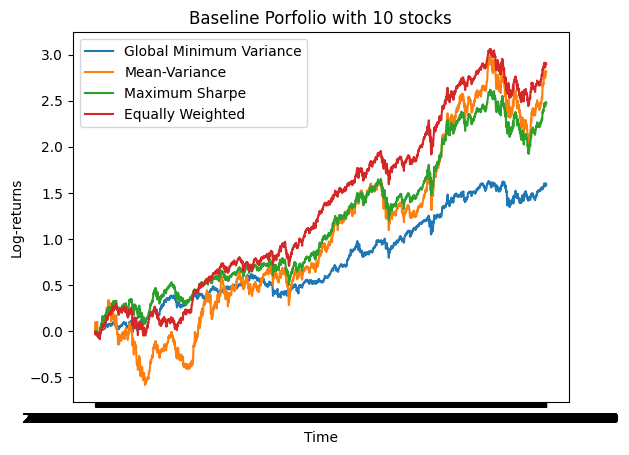

In [ ]:
plt.plot(df_GMV['first_10'].cumsum(), label="Global Minimum Variance")
plt.plot(df_MV['first_10'].cumsum(), label="Mean-Variance")
plt.plot(df_MS['first_10'].cumsum(), label="Maximum Sharpe")
plt.plot(df_EW['first_10'].cumsum(), label="Equally Weighted")
plt.title("Baseline Porfolio with 10 stocks")
plt.xlabel("Time")
plt.ylabel("Log-returns")
plt.legend()
#plt.grid()
plt.show()

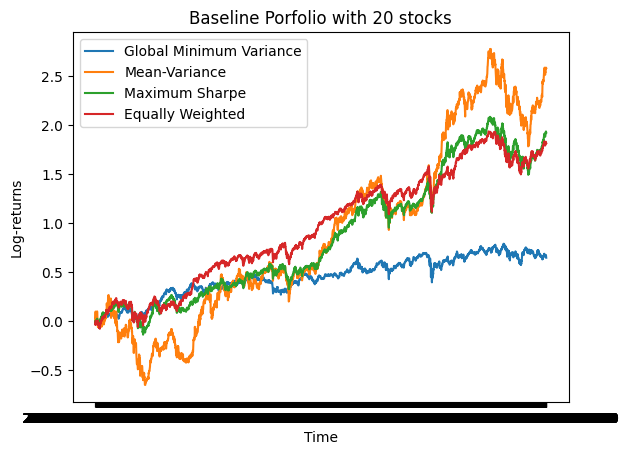

In [ ]:
plt.plot(df_GMV['first_20'].cumsum(), label="Global Minimum Variance")
plt.plot(df_MV['first_20'].cumsum(), label="Mean-Variance")
plt.plot(df_MS['first_20'].cumsum(), label="Maximum Sharpe")
plt.plot(df_EW['first_20'].cumsum(), label="Equally Weighted")
plt.title("Baseline Porfolio with 20 stocks")
plt.xlabel("Time")
plt.ylabel("Log-returns")
plt.legend()
#plt.grid()
plt.show()

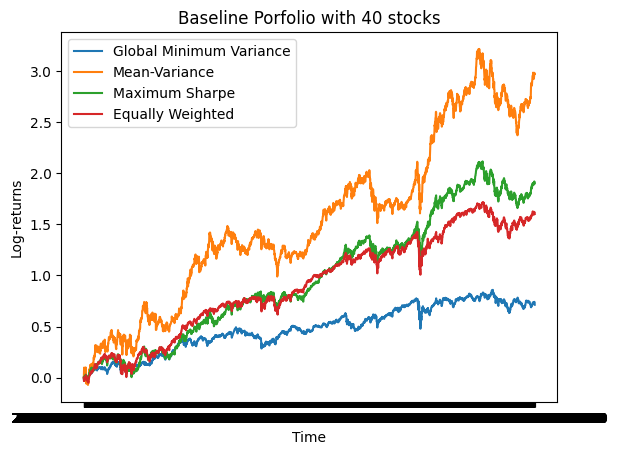

In [ ]:
plt.plot(df_GMV['first_40'].cumsum(), label="Global Minimum Variance")
plt.plot(df_MV['first_40'].cumsum(), label="Mean-Variance")
plt.plot(df_MS['first_40'].cumsum(), label="Maximum Sharpe")
plt.plot(df_EW['first_40'].cumsum(), label="Equally Weighted")
plt.title("Baseline Porfolio with 40 stocks")
plt.xlabel("Time")
plt.ylabel("Log-returns")
plt.legend()
#plt.grid()
plt.show()

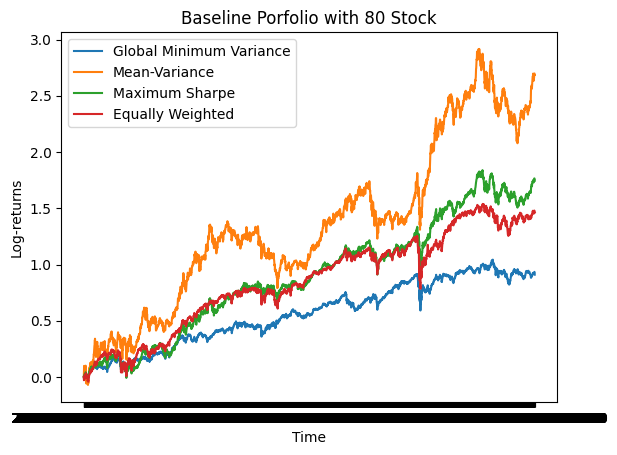

In [ ]:
plt.plot(df_GMV['first_80'].cumsum(), label="Global Minimum Variance")
plt.plot(df_MV['first_80'].cumsum(), label="Mean-Variance")
plt.plot(df_MS['first_80'].cumsum(), label="Maximum Sharpe ")
plt.plot(df_EW['first_80'].cumsum(), label="Equally Weighted")
plt.title("Baseline Porfolio with 80 Stock")
plt.xlabel("Time")
plt.ylabel("Log-returns")
plt.legend()
#plt.grid()
plt.show()

## Network Approach

### Smart Network Based Portfolio

Substitute the Covariance matrix with a metrix H. \\
$H = \Delta^{T}C \Delta$ \\
where $\Delta=diag(S_i)$, $S_i = \frac{\sigma_i}{\sqrt{\sum_{i=1}^{N}\sigma_{i}^{2}}}$, and C is the clustering coefficient matrix whose entrues are equal to $C_{ij} = c_i c_j$ if $i\neq j$ and 1 in the opposite case. $c_i$ is the clustering cofficient of the node i.

In [ ]:
NMV_w_dict, NMV_d_dict, NMS_w_dict, NMS_d_dict, NGMV_w_dict, NGMV_d_dict = {},{},{},{},{},{}
for t in tau_list:
  print(t)
  # Mean-Variance
  w_first10_NMV, d_first10_NMV = find_portoflio_network_weight(df_returns=df_ret, stocks_list=head_10, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="mean_variance", short=shorts )
  w_first20_NMV, d_first20_NMV = find_portoflio_network_weight(df_returns=df_ret, stocks_list=head_20, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="mean_variance", short=shorts )
  w_first40_NMV, d_first40_NMV = find_portoflio_network_weight(df_returns=df_ret, stocks_list=head_40, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="mean_variance", short=shorts )
  w_first80_NMV, d_first80_NMV = find_portoflio_network_weight(df_returns=df_ret, stocks_list=head_80, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="mean_variance", short=shorts )
  NMV_w_dict[t] = [w_first10_NMV, w_first20_NMV, w_first40_NMV, w_first80_NMV ]
  NMV_d_dict[t] = [d_first10_NMV, d_first20_NMV, d_first40_NMV, d_first80_NMV]

  # Max_sharpe
  w_first10_NMS, d_first10_NMS = find_portoflio_network_weight(df_returns=df_ret, stocks_list=head_10, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="max_sharpe", short=shorts )
  w_first20_NMS, d_first20_NMS = find_portoflio_network_weight(df_returns=df_ret, stocks_list=head_20, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="max_sharpe", short=shorts )
  w_first40_NMS, d_first40_NMS = find_portoflio_network_weight(df_returns=df_ret, stocks_list=head_40, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="max_sharpe", short=shorts )
  w_first80_NMS, d_first80_NMS = find_portoflio_network_weight(df_returns=df_ret, stocks_list=head_80, risk_free=0.0, theta=t, rebalancing_day=df_ret.shape[1], type_strategy="max_sharpe", short=shorts )
  NMS_w_dict[t] = [w_first10_NMS, w_first20_NMS, w_first40_NMS, w_first80_NMS]
  NMS_d_dict[t] = [d_first10_NMS, d_first20_NMS, d_first40_NMS, d_first80_NMS]

  # Global Minimum Variance
  w_first10_NGMV, d_first10_NGMV = find_portoflio_network_weight(df_returns=df_ret, stocks_list=head_10, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="minimum_variance", short=shorts )
  w_first20_NGMV, d_first20_NGMV = find_portoflio_network_weight(df_returns=df_ret, stocks_list=head_20, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="minimum_variance", short=shorts )
  w_first40_NGMV, d_first40_NGMV = find_portoflio_network_weight(df_returns=df_ret, stocks_list=head_40, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="minimum_variance", short=shorts )
  w_first80_NGMV, d_first80_NGMV = find_portoflio_network_weight(df_returns=df_ret, stocks_list=head_80, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="minimum_variance", short=shorts )
  NGMV_w_dict[t] = [w_first10_NGMV, w_first20_NGMV, w_first40_NGMV, w_first80_NGMV ]
  NGMV_d_dict[t] = [d_first10_NGMV, d_first20_NGMV, d_first40_NGMV, d_first80_NGMV ]

1.96
2.326
2.575
3.291


In [ ]:
df_NMV_dict = {}
for t in tau_list:
  mv1 = (df_ret[head_10].iloc[2:] * NMV_w_dict[t][0].iloc[1:]).sum(axis=1)
  mv2 = (df_ret[head_20].iloc[2:] * NMV_w_dict[t][1].iloc[1:]).sum(axis=1)
  mv3 = (df_ret[head_40].iloc[2:] * NMV_w_dict[t][2].iloc[1:]).sum(axis=1)
  mv4 = (df_ret[head_80].iloc[2:] * NMV_w_dict[t][3].iloc[1:]).sum(axis=1)
  df_ = pd.concat([mv1,mv2,mv3,mv4],axis=1)
  df_NMV = pd.DataFrame(df_.values, index=df_.index, columns=["first_10","first_20","first_40", "first_80"])
  df_NMV_dict[t] = df_NMV
df_NMV_dict[1.96]

first_10  first_20  first_40  first_80
2010-07-15 00:00:00 -0.013926 -0.023047 -0.009871 -0.047868
2010-07-16 00:00:00 -0.027173 -0.124979 -0.114481 -0.137657
2010-07-19 00:00:00  0.168870  0.120834  0.191541  0.228413
2010-07-20 00:00:00 -0.086737 -0.044343 -0.127571 -0.069799
2010-07-21 00:00:00 -0.012220 -0.109231 -0.180449 -0.237999
...                       ...       ...       ...       ...
2023-06-30 00:00:00  0.015723  0.012106  0.011031  0.011549
2023-07-03 00:00:00  0.001796  0.002110 -0.002583 -0.005545
2023-07-05 00:00:00  0.001280 -0.001995  0.000005  0.003260
2023-07-06 00:00:00 -0.006130 -0.010752 -0.008009 -0.002152
2023-07-07 00:00:00 -0.010547 -0.009459 -0.017548 -0.025723

[3267 rows x 4 columns]

In [ ]:
df_NMS_dict = {}
for t in tau_list:
  mv1 = (df_ret[head_10].iloc[2:] * NMS_w_dict[t][0].iloc[1:]).sum(axis=1)
  mv2 = (df_ret[head_20].iloc[2:] * NMS_w_dict[t][1].iloc[1:]).sum(axis=1)
  mv3 = (df_ret[head_40].iloc[2:] * NMS_w_dict[t][2].iloc[1:]).sum(axis=1)
  mv4 = (df_ret[head_80].iloc[2:] * NMS_w_dict[t][3].iloc[1:]).sum(axis=1)
  df_ = pd.concat([mv1,mv2,mv3,mv4],axis=1)
  df_NMS = pd.DataFrame(df_.values, index=df_.index, columns=["first_10","first_20","first_40", "first_80"])
  df_NMS_dict[t] = df_NMS
df_NMS_dict[1.96]

first_10  first_20  first_40  first_80
2010-07-15 00:00:00  0.000699 -0.000078 -0.000987 -0.009361
2010-07-16 00:00:00  0.012331  0.015647  0.015352  0.010825
2010-07-19 00:00:00  0.061762  0.064950  0.068238  0.069599
2010-07-20 00:00:00 -0.055177 -0.055543 -0.065571 -0.051912
2010-07-21 00:00:00 -0.005587 -0.015748 -0.019410 -0.035846
...                       ...       ...       ...       ...
2023-06-30 00:00:00  0.021252  0.034225  0.035346  0.020594
2023-07-03 00:00:00  0.002407 -0.000215 -0.008319 -0.012326
2023-07-05 00:00:00  0.002372  0.007882  0.003568  0.008700
2023-07-06 00:00:00 -0.003228  0.009653  0.008619  0.004229
2023-07-07 00:00:00 -0.004609 -0.007936 -0.012865 -0.037868

[3267 rows x 4 columns]

In [ ]:
df_NGMV_dict = {}
for t in tau_list:
  mv1 = (df_ret[head_10].iloc[2:] * NGMV_w_dict[t][0].iloc[1:]).sum(axis=1)
  mv2 = (df_ret[head_20].iloc[2:] * NGMV_w_dict[t][1].iloc[1:]).sum(axis=1)
  mv3 = (df_ret[head_40].iloc[2:] * NGMV_w_dict[t][2].iloc[1:]).sum(axis=1)
  mv4 = (df_ret[head_80].iloc[2:] * NGMV_w_dict[t][3].iloc[1:]).sum(axis=1)
  df_ = pd.concat([mv1,mv2,mv3,mv4],axis=1)
  df_NGMV = pd.DataFrame(df_.values, index=df_.index, columns=["first_10","first_20","first_40", "first_80"])
  df_NGMV_dict[t] = df_NGMV
df_NGMV_dict[1.96]

first_10  first_20  first_40  first_80
2010-07-15 00:00:00 -0.002889 -0.001862 -0.001886 -0.000075
2010-07-16 00:00:00 -0.024299 -0.023346 -0.024385 -0.021602
2010-07-19 00:00:00  0.007346  0.010030  0.007829  0.008098
2010-07-20 00:00:00  0.019629  0.012186  0.008262  0.011794
2010-07-21 00:00:00 -0.005864 -0.010025 -0.011223 -0.011250
...                       ...       ...       ...       ...
2023-06-30 00:00:00  0.015553  0.011420  0.009476  0.008184
2023-07-03 00:00:00  0.001738  0.002170 -0.002236 -0.002509
2023-07-05 00:00:00  0.001245 -0.002338 -0.000255  0.001548
2023-07-06 00:00:00 -0.006193 -0.011406 -0.009109 -0.004674
2023-07-07 00:00:00 -0.010693 -0.009520 -0.017827 -0.021989

[3267 rows x 4 columns]

##### Plots

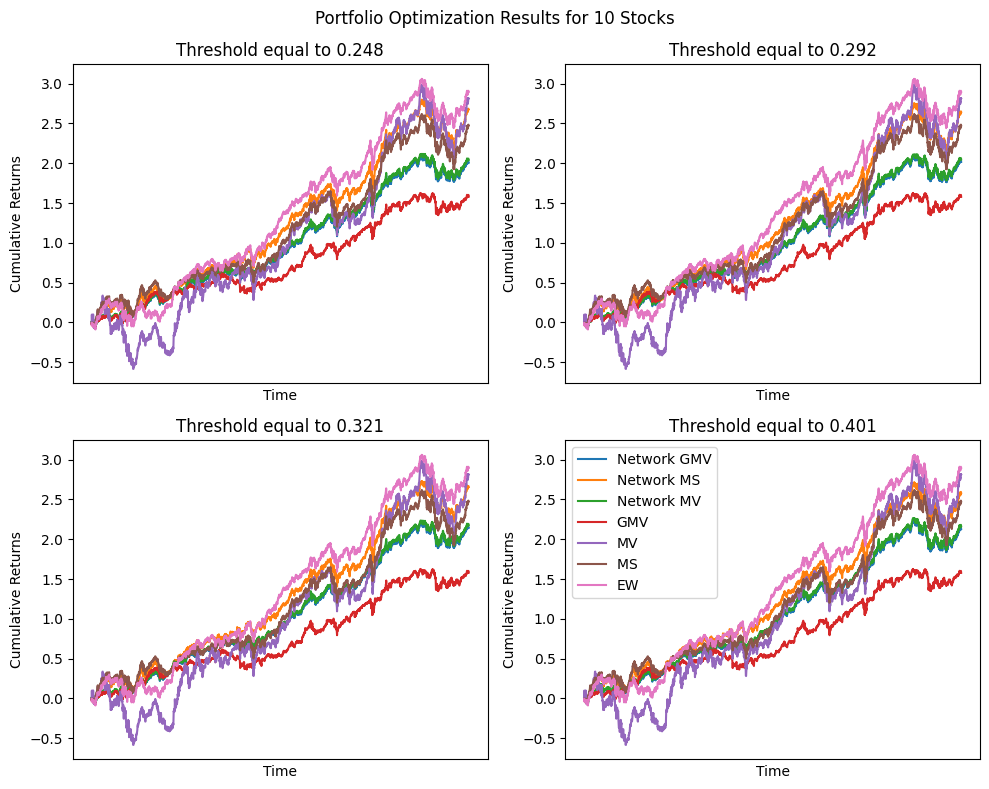

In [ ]:
# Plot Degree --------------------------
fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0,0].plot(df_NGMV_dict[1.96]['first_10'].cumsum(), label="Network GMV")
axs[0,0].plot(df_NMS_dict[1.96]['first_10'].cumsum(), label="Network MS")
axs[0,0].plot(df_NMV_dict[1.96]['first_10'].cumsum(), label="Network MV")
axs[0,0].plot(df_GMV['first_10'].cumsum(), label="GMV")
axs[0,0].plot(df_MV['first_10'].cumsum(), label="MV")
axs[0,0].plot(df_MS['first_10'].cumsum(), label="MS ")
axs[0,0].plot(df_EW['first_10'].cumsum(), label="EW")
axs[0,0].set_xticks([])
axs[0,0].set_title(f"Threshold equal to {np.round(t_list[0],3)}")
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time")
#axs[0,0].grid()

axs[0,1].plot(df_NGMV_dict[2.326]['first_10'].cumsum(), label="Network GMV")
axs[0,1].plot(df_NMS_dict[2.326]['first_10'].cumsum(), label="Network MS")
axs[0,1].plot(df_NMV_dict[2.326]['first_10'].cumsum(), label="Network MV")
axs[0,1].plot(df_GMV['first_10'].cumsum(), label="Global MV")
axs[0,1].plot(df_MV['first_10'].cumsum(), label="MV")
axs[0,1].plot(df_MS['first_10'].cumsum(), label="MS")
axs[0,1].plot(df_EW['first_10'].cumsum(), label="EW")
axs[0,1].set_xticks([])
axs[0,1].set_title(f"Threshold equal to {np.round(t_list[1],3)}")
axs[0,1].set_ylabel("Cumulative Returns")
axs[0,1].set_xlabel("Time")
#axs[0,1].grid()

axs[1,0].plot(df_NGMV_dict[2.575]['first_10'].cumsum(), label="Network GMV")
axs[1,0].plot(df_NMS_dict[2.575]['first_10'].cumsum(), label="Network MS")
axs[1,0].plot(df_NMV_dict[2.575]['first_10'].cumsum(), label="Network MV")
axs[1,0].plot(df_GMV['first_10'].cumsum(), label="GMV")
axs[1,0].plot(df_MV['first_10'].cumsum(), label="MV")
axs[1,0].plot(df_MS['first_10'].cumsum(), label="MS")
axs[1,0].plot(df_EW['first_10'].cumsum(), label="EW")
axs[1,0].set_xticks([])
axs[1,0].set_title(f"Threshold equal to {np.round(t_list[2],3)}")
axs[1,0].set_ylabel("Cumulative Returns")
axs[1,0].set_xlabel("Time")
#axs[1,0].grid()

axs[1,1].plot(df_NGMV_dict[3.291]['first_10'].cumsum(), label="Network GMV")
axs[1,1].plot(df_NMS_dict[3.291]['first_10'].cumsum(), label="Network MS")
axs[1,1].plot(df_NMV_dict[3.291]['first_10'].cumsum(), label="Network MV")
axs[1,1].plot(df_GMV['first_10'].cumsum(), label="GMV")
axs[1,1].plot(df_MV['first_10'].cumsum(), label="MV")
axs[1,1].plot(df_MS['first_10'].cumsum(), label="MS ")
axs[1,1].plot(df_EW['first_10'].cumsum(), label="EW")
axs[1,1].set_xticks([])
axs[1,1].set_title(f"Threshold equal to {np.round(t_list[3],3)}")
axs[1,1].set_ylabel("Cumulative Returns")
axs[1,1].set_xlabel("Time")
#axs[1,1].grid()

# Adjust layout
fig.suptitle("Portfolio Optimization Results for 10 Stocks")
plt.tight_layout()
#plt.grid()
plt.legend()
#plt.savefig("DegreeComparison.eps", format="eps", dpi=1000)
plt.show()

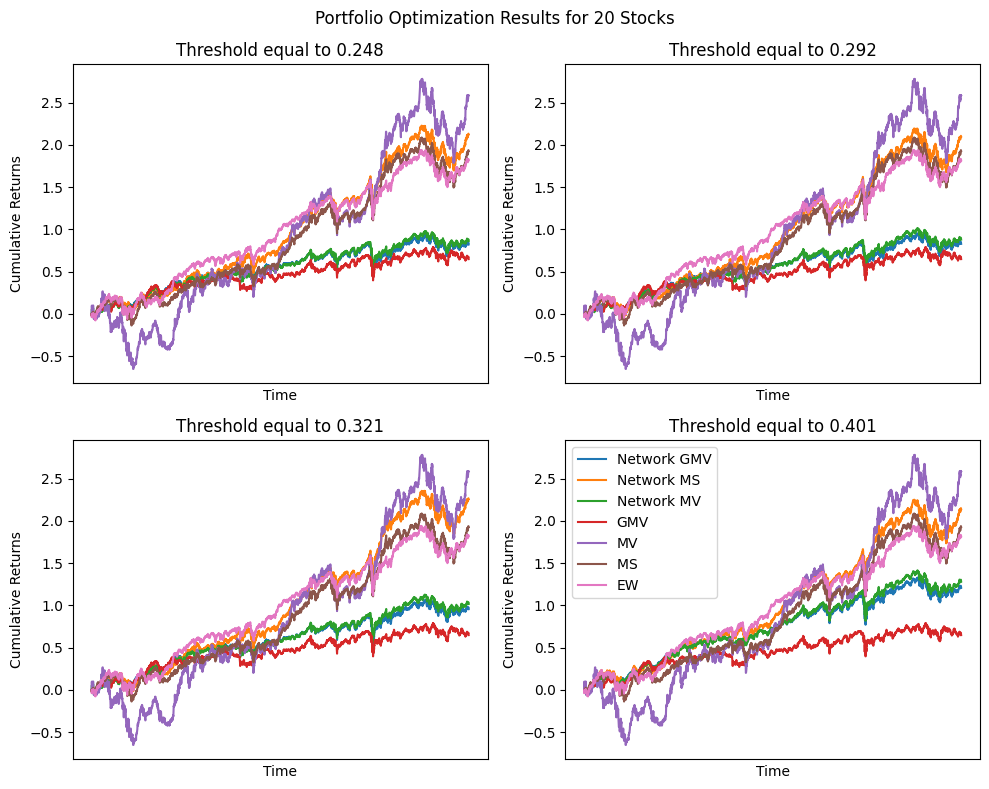

In [ ]:
# Plot Degree --------------------------
fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0,0].plot(df_NGMV_dict[1.96]['first_20'].cumsum(), label="Network GMV")
axs[0,0].plot(df_NMS_dict[1.96]['first_20'].cumsum(), label="Network MS")
axs[0,0].plot(df_NMV_dict[1.96]['first_20'].cumsum(), label="Network MV")
axs[0,0].plot(df_GMV['first_20'].cumsum(), label="GMV")
axs[0,0].plot(df_MV['first_20'].cumsum(), label="MV")
axs[0,0].plot(df_MS['first_20'].cumsum(), label="MS ")
axs[0,0].plot(df_EW['first_20'].cumsum(), label="EW")
axs[0,0].set_xticks([])
axs[0,0].set_title(f"Threshold equal to {np.round(t_list[0],3)}")
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time")
#axs[0,0].grid()

axs[0,1].plot(df_NGMV_dict[2.326]['first_20'].cumsum(), label="Network GMV")
axs[0,1].plot(df_NMS_dict[2.326]['first_20'].cumsum(), label="Network MS")
axs[0,1].plot(df_NMV_dict[2.326]['first_20'].cumsum(), label="Network MV")
axs[0,1].plot(df_GMV['first_20'].cumsum(), label="Global MV")
axs[0,1].plot(df_MV['first_20'].cumsum(), label="MV")
axs[0,1].plot(df_MS['first_20'].cumsum(), label="MS")
axs[0,1].plot(df_EW['first_20'].cumsum(), label="EW")
axs[0,1].set_xticks([])
axs[0,1].set_title(f"Threshold equal to {np.round(t_list[1],3)}")
axs[0,1].set_ylabel("Cumulative Returns")
axs[0,1].set_xlabel("Time")
#axs[0,1].grid()

axs[1,0].plot(df_NGMV_dict[2.575]['first_20'].cumsum(), label="Network GMV")
axs[1,0].plot(df_NMS_dict[2.575]['first_20'].cumsum(), label="Network MS")
axs[1,0].plot(df_NMV_dict[2.575]['first_20'].cumsum(), label="Network MV")
axs[1,0].plot(df_GMV['first_20'].cumsum(), label="GMV")
axs[1,0].plot(df_MV['first_20'].cumsum(), label="MV")
axs[1,0].plot(df_MS['first_20'].cumsum(), label="MS")
axs[1,0].plot(df_EW['first_20'].cumsum(), label="EW")
axs[1,0].set_xticks([])
axs[1,0].set_title(f"Threshold equal to {np.round(t_list[2],3)}")
axs[1,0].set_ylabel("Cumulative Returns")
axs[1,0].set_xlabel("Time")
#axs[1,0].grid()

axs[1,1].plot(df_NGMV_dict[3.291]['first_20'].cumsum(), label="Network GMV")
axs[1,1].plot(df_NMS_dict[3.291]['first_20'].cumsum(), label="Network MS")
axs[1,1].plot(df_NMV_dict[3.291]['first_20'].cumsum(), label="Network MV")
axs[1,1].plot(df_GMV['first_20'].cumsum(), label="GMV")
axs[1,1].plot(df_MV['first_20'].cumsum(), label="MV")
axs[1,1].plot(df_MS['first_20'].cumsum(), label="MS ")
axs[1,1].plot(df_EW['first_20'].cumsum(), label="EW")
axs[1,1].set_xticks([])
axs[1,1].set_title(f"Threshold equal to {np.round(t_list[3],3)}")
axs[1,1].set_ylabel("Cumulative Returns")
axs[1,1].set_xlabel("Time")
#axs[1,1].grid()

# Adjust layout
fig.suptitle("Portfolio Optimization Results for 20 Stocks")
plt.tight_layout()
#plt.grid()
plt.legend()
#plt.savefig("DegreeComparison.eps", format="eps", dpi=1000)
plt.show()

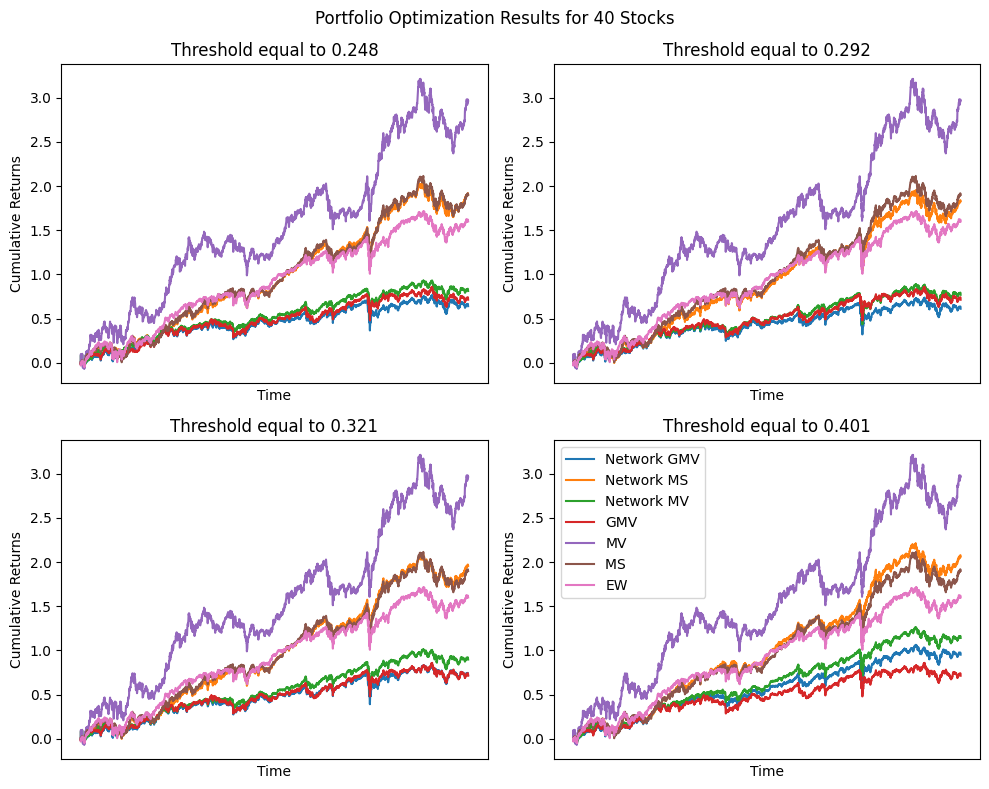

In [ ]:
# Plot Degree --------------------------
fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0,0].plot(df_NGMV_dict[1.96]['first_40'].cumsum(), label="Network GMV")
axs[0,0].plot(df_NMS_dict[1.96]['first_40'].cumsum(), label="Network MS")
axs[0,0].plot(df_NMV_dict[1.96]['first_40'].cumsum(), label="Network MV")
axs[0,0].plot(df_GMV['first_40'].cumsum(), label="GMV")
axs[0,0].plot(df_MV['first_40'].cumsum(), label="MV")
axs[0,0].plot(df_MS['first_40'].cumsum(), label="MS ")
axs[0,0].plot(df_EW['first_40'].cumsum(), label="EW")
axs[0,0].set_xticks([])
axs[0,0].set_title(f"Threshold equal to {np.round(t_list[0],3)}")
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time")
#axs[0,0].grid()

axs[0,1].plot(df_NGMV_dict[2.326]['first_40'].cumsum(), label="Network GMV")
axs[0,1].plot(df_NMS_dict[2.326]['first_40'].cumsum(), label="Network MS")
axs[0,1].plot(df_NMV_dict[2.326]['first_40'].cumsum(), label="Network MV")
axs[0,1].plot(df_GMV['first_40'].cumsum(), label="Global MV")
axs[0,1].plot(df_MV['first_40'].cumsum(), label="MV")
axs[0,1].plot(df_MS['first_40'].cumsum(), label="MS")
axs[0,1].plot(df_EW['first_40'].cumsum(), label="EW")
axs[0,1].set_xticks([])
axs[0,1].set_title(f"Threshold equal to {np.round(t_list[1],3)}")
axs[0,1].set_ylabel("Cumulative Returns")
axs[0,1].set_xlabel("Time")
#axs[0,1].grid()

axs[1,0].plot(df_NGMV_dict[2.575]['first_40'].cumsum(), label="Network GMV")
axs[1,0].plot(df_NMS_dict[2.575]['first_40'].cumsum(), label="Network MS")
axs[1,0].plot(df_NMV_dict[2.575]['first_40'].cumsum(), label="Network MV")
axs[1,0].plot(df_GMV['first_40'].cumsum(), label="GMV")
axs[1,0].plot(df_MV['first_40'].cumsum(), label="MV")
axs[1,0].plot(df_MS['first_40'].cumsum(), label="MS")
axs[1,0].plot(df_EW['first_40'].cumsum(), label="EW")
axs[1,0].set_xticks([])
axs[1,0].set_title(f"Threshold equal to {np.round(t_list[2],3)}")
axs[1,0].set_ylabel("Cumulative Returns")
axs[1,0].set_xlabel("Time")
#axs[1,0].grid()

axs[1,1].plot(df_NGMV_dict[3.291]['first_40'].cumsum(), label="Network GMV")
axs[1,1].plot(df_NMS_dict[3.291]['first_40'].cumsum(), label="Network MS")
axs[1,1].plot(df_NMV_dict[3.291]['first_40'].cumsum(), label="Network MV")
axs[1,1].plot(df_GMV['first_40'].cumsum(), label="GMV")
axs[1,1].plot(df_MV['first_40'].cumsum(), label="MV")
axs[1,1].plot(df_MS['first_40'].cumsum(), label="MS ")
axs[1,1].plot(df_EW['first_40'].cumsum(), label="EW")
axs[1,1].set_xticks([])
axs[1,1].set_title(f"Threshold equal to {np.round(t_list[3],3)}")
axs[1,1].set_ylabel("Cumulative Returns")
axs[1,1].set_xlabel("Time")
#axs[1,1].grid()

# Adjust layout
fig.suptitle("Portfolio Optimization Results for 40 Stocks")
plt.tight_layout()
#plt.grid()
plt.legend()
#plt.savefig("DegreeComparison.eps", format="eps", dpi=1000)
plt.show()

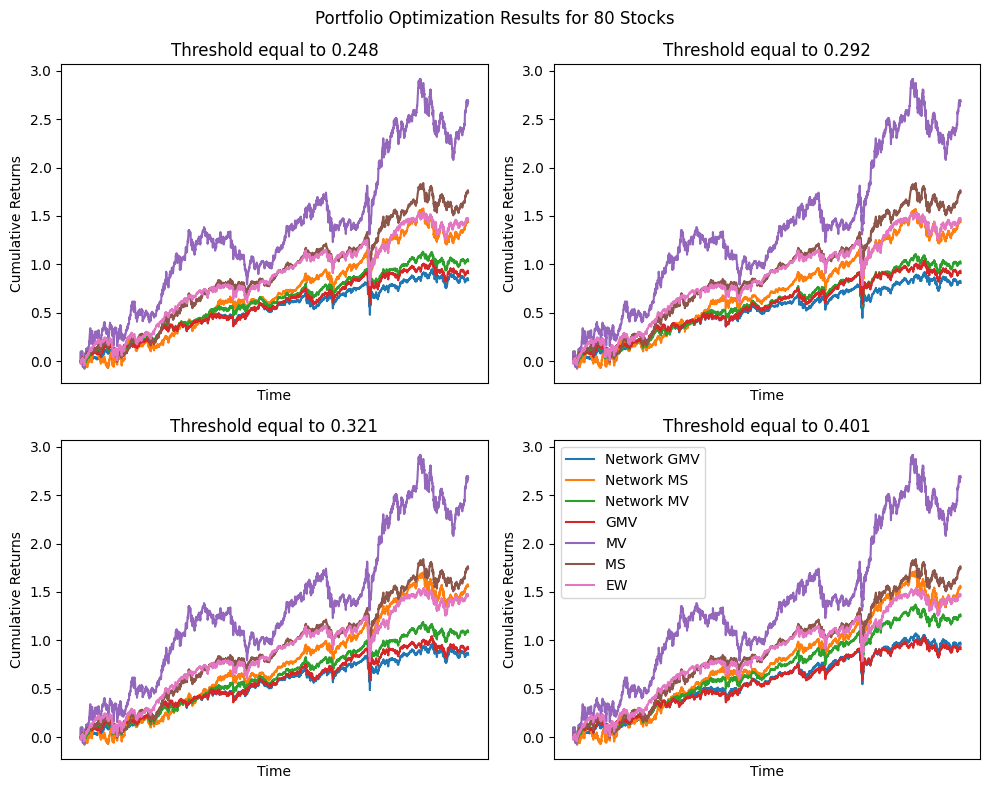

In [ ]:
# Plot Degree --------------------------
fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0,0].plot(df_NGMV_dict[1.96]['first_80'].cumsum(), label="Network GMV")
axs[0,0].plot(df_NMS_dict[1.96]['first_80'].cumsum(), label="Network MS")
axs[0,0].plot(df_NMV_dict[1.96]['first_80'].cumsum(), label="Network MV")
axs[0,0].plot(df_GMV['first_80'].cumsum(), label="GMV")
axs[0,0].plot(df_MV['first_80'].cumsum(), label="MV")
axs[0,0].plot(df_MS['first_80'].cumsum(), label="MS ")
axs[0,0].plot(df_EW['first_80'].cumsum(), label="EW")
axs[0,0].set_xticks([])
axs[0,0].set_title(f"Threshold equal to {np.round(t_list[0],3)}")
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time")
#axs[0,0].grid()

axs[0,1].plot(df_NGMV_dict[2.326]['first_80'].cumsum(), label="Network GMV")
axs[0,1].plot(df_NMS_dict[2.326]['first_80'].cumsum(), label="Network MS")
axs[0,1].plot(df_NMV_dict[2.326]['first_80'].cumsum(), label="Network MV")
axs[0,1].plot(df_GMV['first_80'].cumsum(), label="Global MV")
axs[0,1].plot(df_MV['first_80'].cumsum(), label="MV")
axs[0,1].plot(df_MS['first_80'].cumsum(), label="MS")
axs[0,1].plot(df_EW['first_80'].cumsum(), label="EW")
axs[0,1].set_xticks([])
axs[0,1].set_title(f"Threshold equal to {np.round(t_list[1],3)}")
axs[0,1].set_ylabel("Cumulative Returns")
axs[0,1].set_xlabel("Time")
#axs[0,1].grid()

axs[1,0].plot(df_NGMV_dict[2.575]['first_80'].cumsum(), label="Network GMV")
axs[1,0].plot(df_NMS_dict[2.575]['first_80'].cumsum(), label="Network MS")
axs[1,0].plot(df_NMV_dict[2.575]['first_80'].cumsum(), label="Network MV")
axs[1,0].plot(df_GMV['first_80'].cumsum(), label="GMV")
axs[1,0].plot(df_MV['first_80'].cumsum(), label="MV")
axs[1,0].plot(df_MS['first_80'].cumsum(), label="MS")
axs[1,0].plot(df_EW['first_80'].cumsum(), label="EW")
axs[1,0].set_xticks([])
axs[1,0].set_title(f"Threshold equal to {np.round(t_list[2],3)}")
axs[1,0].set_ylabel("Cumulative Returns")
axs[1,0].set_xlabel("Time")
#axs[1,0].grid()

axs[1,1].plot(df_NGMV_dict[3.291]['first_80'].cumsum(), label="Network GMV")
axs[1,1].plot(df_NMS_dict[3.291]['first_80'].cumsum(), label="Network MS")
axs[1,1].plot(df_NMV_dict[3.291]['first_80'].cumsum(), label="Network MV")
axs[1,1].plot(df_GMV['first_80'].cumsum(), label="GMV")
axs[1,1].plot(df_MV['first_80'].cumsum(), label="MV")
axs[1,1].plot(df_MS['first_80'].cumsum(), label="MS ")
axs[1,1].plot(df_EW['first_80'].cumsum(), label="EW")
axs[1,1].set_xticks([])
axs[1,1].set_title(f"Threshold equal to {np.round(t_list[3],3)}")
axs[1,1].set_ylabel("Cumulative Returns")
axs[1,1].set_xlabel("Time")
#axs[1,1].grid()

# Adjust layout
fig.suptitle("Portfolio Optimization Results for 80 Stocks")
plt.tight_layout()
#plt.grid()
plt.legend()
#plt.savefig("DegreeComparison.eps", format="eps", dpi=1000)
plt.show()

### Signature Implementation

In [ ]:
Sig_NMV_w_dict, Sig_NMV_d_dict, Sig_NMS_w_dict, Sig_NMS_d_dict, Sig_NGMV_w_dict, Sig_NGMV_d_dict = {},{},{},{},{},{}
for t in tau_list:
  print(t)
  # Mean-Variance
  w_first10_Sig_NMV, d_first10_Sig_NMV = find_portoflio_sig_network_weight(df_returns=df_ret, stocks_list=head_10, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="mean_variance", short=shorts )
  w_first20_Sig_NMV, d_first20_Sig_NMV = find_portoflio_sig_network_weight(df_returns=df_ret, stocks_list=head_20, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="mean_variance", short=shorts )
  w_first40_Sig_NMV, d_first40_Sig_NMV = find_portoflio_sig_network_weight(df_returns=df_ret, stocks_list=head_40, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="mean_variance", short=shorts )
  w_first80_Sig_NMV, d_first80_Sig_NMV = find_portoflio_sig_network_weight(df_returns=df_ret, stocks_list=head_80, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="mean_variance", short=shorts )
  Sig_NMV_w_dict[t] = [w_first10_Sig_NMV, w_first20_Sig_NMV, w_first40_Sig_NMV, w_first80_Sig_NMV ]
  Sig_NMV_d_dict[t] = [d_first10_Sig_NMV, d_first20_Sig_NMV, d_first40_Sig_NMV, d_first80_Sig_NMV ]

  # Max_sharpe
  w_first10_Sig_NMS, d_first10_Sig_NMS = find_portoflio_sig_network_weight(df_returns=df_ret, stocks_list=head_10, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="max_sharpe", short=shorts )
  w_first20_Sig_NMS, d_first20_Sig_NMS = find_portoflio_sig_network_weight(df_returns=df_ret, stocks_list=head_20, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="max_sharpe", short=shorts )
  w_first40_Sig_NMS, d_first40_Sig_NMS = find_portoflio_sig_network_weight(df_returns=df_ret, stocks_list=head_40, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="max_sharpe", short=shorts )
  w_first80_Sig_NMS, d_first80_Sig_NMS = find_portoflio_sig_network_weight(df_returns=df_ret, stocks_list=head_80, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="max_sharpe", short=shorts )
  Sig_NMS_w_dict[t] = [w_first10_Sig_NMS, w_first20_Sig_NMS, w_first40_Sig_NMS, w_first80_Sig_NMS ]
  Sig_NMS_d_dict[t] = [d_first10_Sig_NMS, d_first20_Sig_NMS, d_first40_Sig_NMS, d_first80_Sig_NMS]

  # Global Minimum Variance
  w_first10_Sig_NGMV, d_first10_Sig_NGMV = find_portoflio_sig_network_weight(df_returns=df_ret, stocks_list=head_10, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="minimum_variance", short=shorts )
  w_first20_Sig_NGMV, d_first20_Sig_NGMV = find_portoflio_sig_network_weight(df_returns=df_ret, stocks_list=head_20, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="minimum_variance", short=shorts )
  w_first40_Sig_NGMV, d_first40_Sig_NGMV = find_portoflio_sig_network_weight(df_returns=df_ret, stocks_list=head_40, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="minimum_variance", short=shorts )
  w_first80_Sig_NGMV, d_first80_Sig_NGMV = find_portoflio_sig_network_weight(df_returns=df_ret, stocks_list=head_80, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="minimum_variance", short=shorts )
  Sig_NGMV_w_dict[t] = [w_first10_Sig_NGMV, w_first20_Sig_NGMV, w_first40_Sig_NGMV, w_first80_Sig_NGMV ]
  Sig_NGMV_d_dict[t] = [d_first10_Sig_NGMV, d_first20_Sig_NGMV, d_first40_Sig_NGMV, d_first80_Sig_NGMV]

1.96
2.326
2.575
3.291


In [ ]:
Sig_NMS_w_dict[1.96][2].loc[Sig_NMS_d_dict[1.96][2]]

AAPL   TSLA   AMZN   MSFT   NVDA    WMT  GOOGL    AMD  \
2010-07-14 00:00:00 -0.000  0.000 -0.000  0.931 -0.000 -0.001 -0.000 -0.000   
2010-08-11 00:00:00 -0.150  0.003  0.088 -0.049 -0.106  0.076  0.027 -0.139   
2010-09-09 00:00:00  0.010  0.037  0.253 -0.243 -0.029  0.151 -0.049 -0.231   
2010-10-07 00:00:00  0.077  0.002  0.223 -0.208 -0.043  0.206  0.030 -0.111   
2010-11-04 00:00:00  0.113  0.010  0.126 -0.064 -0.026  0.097  0.075 -0.061   
...                    ...    ...    ...    ...    ...    ...    ...    ...   
2023-03-02 00:00:00  0.217  0.141  0.144  0.194  0.200  0.039  0.123  0.066   
2023-03-30 00:00:00  0.222  0.136  0.146  0.205  0.199  0.047  0.131  0.069   
2023-04-28 00:00:00  0.219  0.128  0.144  0.208  0.196  0.052  0.132  0.065   
2023-05-26 00:00:00  0.233  0.136  0.162  0.231  0.211  0.050  0.164  0.076   
2023-06-27 00:00:00  0.233  0.138  0.161  0.220  0.207  0.060  0.146  0.070   

                      NFLX    BAC  ...    UNH   ORCL    IBM  CMCSA    CRM  \
2010-07-14 00:00:00  0.001 -0.000  ... -0.002  0.000 -0.001 -0.000  0.010   
2010-08-11 00:00:00  0.005 -0.195  ...  0.167 -0.008 -0.010 -0.102  0.087   
2010-09-09 00:00:00  0.038 -0.186  ...  0.271  0.041 -0.177 -0.102  0.092   
2010-10-07 00:00:00  0.012 -0.200  ...  0.098  0.099  0.088 -0.173 -0.005   
2010-11-04 00:00:00  0.003 -0.240  ...  0.085  0.083  0.103 -0.037 -0.010   
...                    ...    ...  ...    ...    ...    ...    ...    ...   
2023-03-02 00:00:00  0.096 -0.042  ...  0.306  0.001 -0.246  0.042  0.063   
2023-03-30 00:00:00  0.095 -0.056  ...  0.287  0.006 -0.237  0.039  0.062   
2023-04-28 00:00:00  0.092 -0.054  ...  0.282  0.010 -0.241  0.053  0.058   
2023-05-26 00:00:00  0.099 -0.058  ...  0.290  0.032 -0.236  0.050  0.068   
2023-06-27 00:00:00  0.099 -0.060  ...  0.274  0.048 -0.225  0.054  0.062   

                        GS    MRK     MA   GILD     KO  
2010-07-14 00:00:00 -0.000 -0.001 -0.001 -0.000 -0.003  
2010-08-11 00:00:00  0.234 -0.335 -0.057 -0.029  0.670  
2010-09-09 00:00:00  0.154 -0.082 -0.192 -0.058  0.786  
2010-10-07 00:00:00  0.032 -0.148 -0.074 -0.053  0.578  
2010-11-04 00:00:00  0.082 -0.258 -0.008 -0.024  0.660  
...                    ...    ...    ...    ...    ...  
2023-03-02 00:00:00 -0.072  0.045  0.235  0.023  0.017  
2023-03-30 00:00:00 -0.082  0.037  0.225  0.024  0.021  
2023-04-28 00:00:00 -0.075  0.054  0.224  0.021  0.028  
2023-05-26 00:00:00 -0.076  0.051  0.231  0.015  0.013  
2023-06-27 00:00:00 -0.086  0.050  0.223  0.009 -0.001  

[164 rows x 40 columns]

In [ ]:
Sig_df_NMV_dict = {}
for t in tau_list:
  mv1 = (df_ret[head_10].iloc[2:] * Sig_NMV_w_dict[t][0].iloc[1:]).sum(axis=1)
  mv2 = (df_ret[head_20].iloc[2:] * Sig_NMV_w_dict[t][1].iloc[1:]).sum(axis=1)
  mv3 = (df_ret[head_40].iloc[2:] * Sig_NMV_w_dict[t][2].iloc[1:]).sum(axis=1)
  mv4 = (df_ret[head_80].iloc[2:] * Sig_NMV_w_dict[t][3].iloc[1:]).sum(axis=1)
  df_ = pd.concat([mv1,mv2,mv3,mv4],axis=1)
  Sig_df_NMV = pd.DataFrame(df_.values, index=df_.index, columns=["first_10","first_20","first_40","first_80"])
  Sig_df_NMV_dict[t] = Sig_df_NMV
Sig_df_NMV_dict[1.96]

first_10  first_20  first_40  first_80
2010-07-15 00:00:00 -0.021912 -0.022328 -0.021177 -0.079196
2010-07-16 00:00:00 -0.028262 -0.115718 -0.147324 -0.171462
2010-07-19 00:00:00  0.115632  0.160783  0.187340  0.229216
2010-07-20 00:00:00 -0.098913 -0.062503 -0.155519 -0.098461
2010-07-21 00:00:00 -0.028611 -0.065374 -0.140263 -0.296773
...                       ...       ...       ...       ...
2023-06-30 00:00:00  0.018872  0.015113  0.011919  0.012943
2023-07-03 00:00:00  0.006612  0.007480  0.003018 -0.000409
2023-07-05 00:00:00  0.000844 -0.001055 -0.000028  0.004824
2023-07-06 00:00:00 -0.007264 -0.011674 -0.008213 -0.001375
2023-07-07 00:00:00 -0.008804 -0.009029 -0.017606 -0.021899

[3267 rows x 4 columns]

In [ ]:
Sig_df_NMS_dict = {}
for t in tau_list:
  mv1 = (df_ret[head_10].iloc[2:] * Sig_NMS_w_dict[t][0].iloc[1:]).sum(axis=1)
  mv2 = (df_ret[head_20].iloc[2:] * Sig_NMS_w_dict[t][1].iloc[1:]).sum(axis=1)
  mv3 = (df_ret[head_40].iloc[2:] * Sig_NMS_w_dict[t][2].iloc[1:]).sum(axis=1)
  mv4 = (df_ret[head_80].iloc[2:] * Sig_NMS_w_dict[t][3].iloc[1:]).sum(axis=1)
  df_ = pd.concat([mv1,mv2,mv3,mv4],axis=1)
  Sig_df_NMS = pd.DataFrame(df_.values, index=df_.index, columns=["first_10","first_20","first_40", "first_80"])
  Sig_df_NMS_dict[t] = Sig_df_NMS
Sig_df_NMS_dict[1.96]

first_10  first_20  first_40  first_80
2010-07-15 00:00:00  0.002640  0.002746  0.002674  0.002568
2010-07-16 00:00:00 -0.024474 -0.024391 -0.024003 -0.024089
2010-07-19 00:00:00  0.013480  0.013741  0.012944  0.012932
2010-07-20 00:00:00  0.009858  0.009733  0.009237  0.009153
2010-07-21 00:00:00 -0.014125 -0.014159 -0.014523 -0.014576
...                       ...       ...       ...       ...
2023-06-30 00:00:00  0.022843  0.031354  0.034158  0.048039
2023-07-03 00:00:00  0.006361  0.003343 -0.002296 -0.033031
2023-07-05 00:00:00  0.001639  0.007484  0.002162  0.023261
2023-07-06 00:00:00 -0.004917  0.005417  0.007009  0.024303
2023-07-07 00:00:00 -0.003478 -0.006350 -0.008357 -0.050625

[3267 rows x 4 columns]

In [ ]:
Sig_df_NGMV_dict = {}
for t in tau_list:
  mv1 = (df_ret[head_10].iloc[2:] * Sig_NGMV_w_dict[t][0].iloc[1:]).sum(axis=1)
  mv2 = (df_ret[head_20].iloc[2:] * Sig_NGMV_w_dict[t][1].iloc[1:]).sum(axis=1)
  mv3 = (df_ret[head_40].iloc[2:] * Sig_NGMV_w_dict[t][2].iloc[1:]).sum(axis=1)
  mv4 = (df_ret[head_80].iloc[2:] * Sig_NGMV_w_dict[t][3].iloc[1:]).sum(axis=1)
  df_ = pd.concat([mv1,mv2,mv3,mv4],axis=1)
  Sig_df_NGMV = pd.DataFrame(df_.values, index=df_.index, columns=["first_10","first_20","first_40","first_80"])
  Sig_df_NGMV_dict[t] = Sig_df_NGMV
Sig_df_NGMV_dict[1.96]

first_10  first_20  first_40  first_80
2010-07-15 00:00:00  0.002640  0.002728  0.002524  0.002375
2010-07-16 00:00:00 -0.024474 -0.024484 -0.022030 -0.022136
2010-07-19 00:00:00  0.013480  0.013615  0.010677  0.011125
2010-07-20 00:00:00  0.009858  0.009832  0.008467  0.008793
2010-07-21 00:00:00 -0.014125 -0.014118 -0.014479 -0.014488
...                       ...       ...       ...       ...
2023-06-30 00:00:00  0.018742  0.014365  0.010200  0.009044
2023-07-03 00:00:00  0.006656  0.007660  0.003504  0.003124
2023-07-05 00:00:00  0.000829 -0.001434 -0.000187  0.002834
2023-07-06 00:00:00 -0.007363 -0.012406 -0.009381 -0.004127
2023-07-07 00:00:00 -0.009001 -0.009148 -0.018328 -0.018878

[3267 rows x 4 columns]

##### Plots

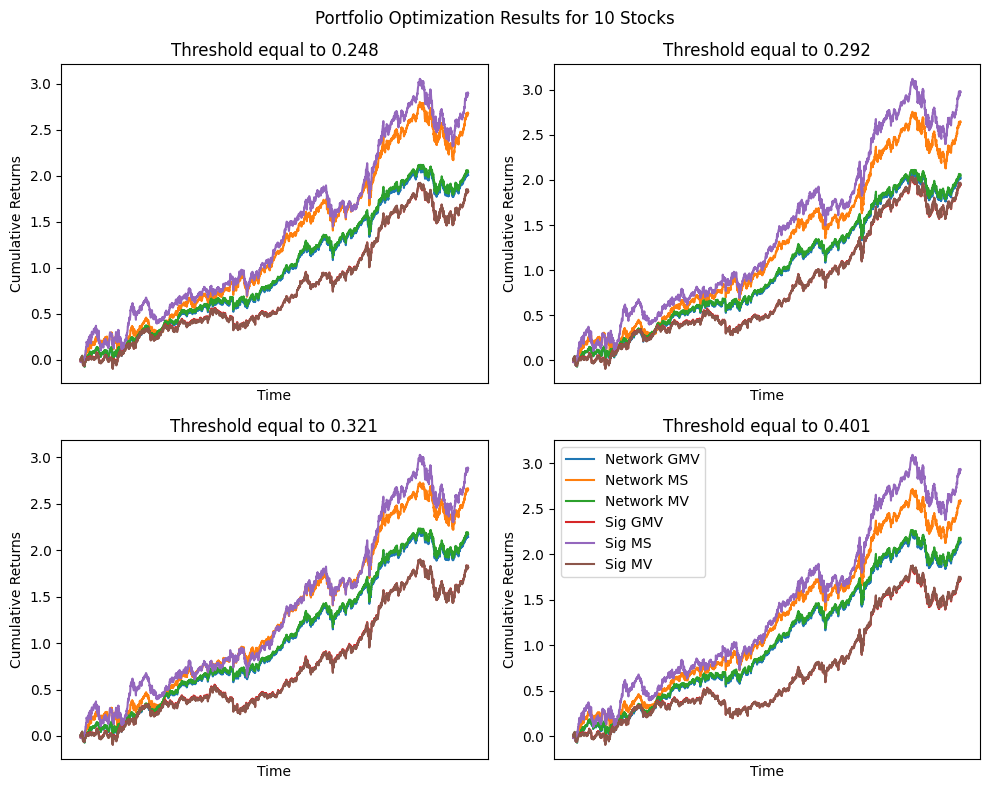

In [ ]:
# Plot Degree --------------------------
fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0,0].plot(df_NGMV_dict[1.96]['first_10'].cumsum(), label="Network GMV")
axs[0,0].plot(df_NMS_dict[1.96]['first_10'].cumsum(), label="Network MS")
axs[0,0].plot(df_NMV_dict[1.96]['first_10'].cumsum(), label="Network MV")
axs[0,0].plot(Sig_df_NGMV_dict[1.96]['first_10'].cumsum(), label="Sig GMV")
axs[0,0].plot(Sig_df_NMS_dict[1.96]['first_10'].cumsum(), label="Sig MS")
axs[0,0].plot(Sig_df_NMV_dict[1.96]['first_10'].cumsum(), label="Sig MV")
axs[0,0].set_xticks([])
axs[0,0].set_title(f"Threshold equal to {np.round(t_list[0],3)}")
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time")
#axs[0,0].grid()

axs[0,1].plot(df_NGMV_dict[2.326]['first_10'].cumsum(), label="Network GMV")
axs[0,1].plot(df_NMS_dict[2.326]['first_10'].cumsum(), label="Network MS")
axs[0,1].plot(df_NMV_dict[2.326]['first_10'].cumsum(), label="Network MV")
axs[0,1].plot(Sig_df_NGMV_dict[2.326]['first_10'].cumsum(), label="Sig GMV")
axs[0,1].plot(Sig_df_NMS_dict[2.326]['first_10'].cumsum(), label="Sig MS")
axs[0,1].plot(Sig_df_NMV_dict[2.326]['first_10'].cumsum(), label="Sig MV")
axs[0,1].set_xticks([])
axs[0,1].set_title(f"Threshold equal to {np.round(t_list[1],3)}")
axs[0,1].set_ylabel("Cumulative Returns")
axs[0,1].set_xlabel("Time")
#axs[0,1].grid()

axs[1,0].plot(df_NGMV_dict[2.575]['first_10'].cumsum(), label="Network GMV")
axs[1,0].plot(df_NMS_dict[2.575]['first_10'].cumsum(), label="Network MS")
axs[1,0].plot(df_NMV_dict[2.575]['first_10'].cumsum(), label="Network MV")
axs[1,0].plot(Sig_df_NGMV_dict[2.575]['first_10'].cumsum(), label="Sig GMV")
axs[1,0].plot(Sig_df_NMS_dict[2.575]['first_10'].cumsum(), label="Sig MS")
axs[1,0].plot(Sig_df_NMV_dict[2.575]['first_10'].cumsum(), label="Sig MV")
axs[1,0].set_xticks([])
axs[1,0].set_title(f"Threshold equal to {np.round(t_list[2],3)}")
axs[1,0].set_ylabel("Cumulative Returns")
axs[1,0].set_xlabel("Time")
#axs[1,0].grid()

axs[1,1].plot(df_NGMV_dict[3.291]['first_10'].cumsum(), label="Network GMV")
axs[1,1].plot(df_NMS_dict[3.291]['first_10'].cumsum(), label="Network MS")
axs[1,1].plot(df_NMV_dict[3.291]['first_10'].cumsum(), label="Network MV")
axs[1,1].plot(Sig_df_NGMV_dict[3.291]['first_10'].cumsum(), label="Sig GMV")
axs[1,1].plot(Sig_df_NMS_dict[3.291]['first_10'].cumsum(), label="Sig MS")
axs[1,1].plot(Sig_df_NMV_dict[3.291]['first_10'].cumsum(), label="Sig MV")
axs[1,1].set_xticks([])
axs[1,1].set_title(f"Threshold equal to {np.round(t_list[3],3)}")
axs[1,1].set_ylabel("Cumulative Returns")
axs[1,1].set_xlabel("Time")
#axs[1,1].grid()

# Adjust layout
fig.suptitle("Portfolio Optimization Results for 10 Stocks")
plt.tight_layout()
#plt.grid()
plt.legend()
plt.savefig("sigNet_ptf_10_ss.eps", format="eps", dpi=1000)
plt.show()

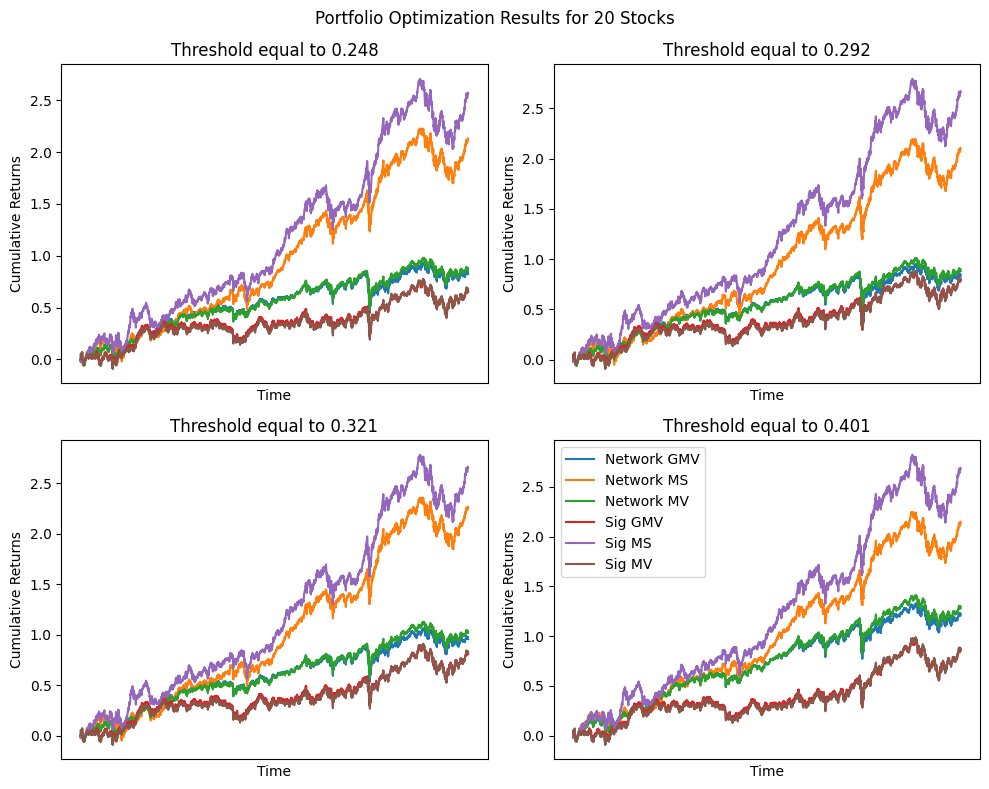

In [ ]:
# Plot Degree --------------------------
fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0,0].plot(df_NGMV_dict[1.96]['first_20'].cumsum(), label="Network GMV")
axs[0,0].plot(df_NMS_dict[1.96]['first_20'].cumsum(), label="Network MS")
axs[0,0].plot(df_NMV_dict[1.96]['first_20'].cumsum(), label="Network MV")
axs[0,0].plot(Sig_df_NGMV_dict[1.96]['first_20'].cumsum(), label="Sig GMV")
axs[0,0].plot(Sig_df_NMS_dict[1.96]['first_20'].cumsum(), label="Sig MS")
axs[0,0].plot(Sig_df_NMV_dict[1.96]['first_20'].cumsum(), label="Sig MV")
axs[0,0].set_xticks([])
axs[0,0].set_title(f"Threshold equal to {np.round(t_list[0],3)}")
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time")
#axs[0,0].grid()

axs[0,1].plot(df_NGMV_dict[2.326]['first_20'].cumsum(), label="Network GMV")
axs[0,1].plot(df_NMS_dict[2.326]['first_20'].cumsum(), label="Network MS")
axs[0,1].plot(df_NMV_dict[2.326]['first_20'].cumsum(), label="Network MV")
axs[0,1].plot(Sig_df_NGMV_dict[2.326]['first_20'].cumsum(), label="Sig GMV")
axs[0,1].plot(Sig_df_NMS_dict[2.326]['first_20'].cumsum(), label="Sig MS")
axs[0,1].plot(Sig_df_NMV_dict[2.326]['first_20'].cumsum(), label="Sig MV")
axs[0,1].set_xticks([])
axs[0,1].set_title(f"Threshold equal to {np.round(t_list[1],3)}")
axs[0,1].set_ylabel("Cumulative Returns")
axs[0,1].set_xlabel("Time")
#axs[0,1].grid()

axs[1,0].plot(df_NGMV_dict[2.575]['first_20'].cumsum(), label="Network GMV")
axs[1,0].plot(df_NMS_dict[2.575]['first_20'].cumsum(), label="Network MS")
axs[1,0].plot(df_NMV_dict[2.575]['first_20'].cumsum(), label="Network MV")
axs[1,0].plot(Sig_df_NGMV_dict[2.575]['first_20'].cumsum(), label="Sig GMV")
axs[1,0].plot(Sig_df_NMS_dict[2.575]['first_20'].cumsum(), label="Sig MS")
axs[1,0].plot(Sig_df_NMV_dict[2.575]['first_20'].cumsum(), label="Sig MV")
axs[1,0].set_xticks([])
axs[1,0].set_title(f"Threshold equal to {np.round(t_list[2],3)}")
axs[1,0].set_ylabel("Cumulative Returns")
axs[1,0].set_xlabel("Time")
#axs[1,0].grid()

axs[1,1].plot(df_NGMV_dict[3.291]['first_20'].cumsum(), label="Network GMV")
axs[1,1].plot(df_NMS_dict[3.291]['first_20'].cumsum(), label="Network MS")
axs[1,1].plot(df_NMV_dict[3.291]['first_20'].cumsum(), label="Network MV")
axs[1,1].plot(Sig_df_NGMV_dict[3.291]['first_20'].cumsum(), label="Sig GMV")
axs[1,1].plot(Sig_df_NMS_dict[3.291]['first_20'].cumsum(), label="Sig MS")
axs[1,1].plot(Sig_df_NMV_dict[3.291]['first_20'].cumsum(), label="Sig MV")
axs[1,1].set_xticks([])
axs[1,1].set_title(f"Threshold equal to {np.round(t_list[3],3)}")
axs[1,1].set_ylabel("Cumulative Returns")
axs[1,1].set_xlabel("Time")
#axs[1,1].grid()

# Adjust layout
fig.suptitle("Portfolio Optimization Results for 20 Stocks")
plt.tight_layout()
#plt.grid()
plt.legend()
plt.savefig("sigNet_ptf_20_ss.eps", format="eps", dpi=1000)
plt.show()

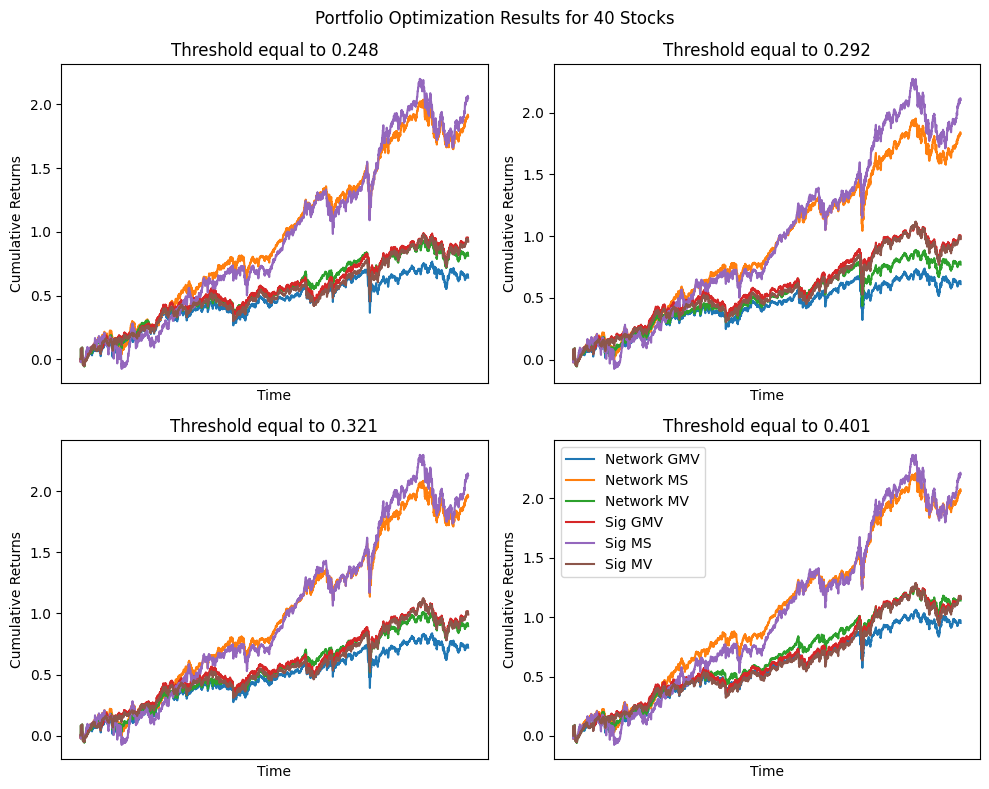

In [ ]:
# Plot Degree --------------------------
fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0,0].plot(df_NGMV_dict[1.96]['first_40'].cumsum(), label="Network GMV")
axs[0,0].plot(df_NMS_dict[1.96]['first_40'].cumsum(), label="Network MS")
axs[0,0].plot(df_NMV_dict[1.96]['first_40'].cumsum(), label="Network MV")
axs[0,0].plot(Sig_df_NGMV_dict[1.96]['first_40'].cumsum(), label="Sig GMV")
axs[0,0].plot(Sig_df_NMS_dict[1.96]['first_40'].cumsum(), label="Sig MS")
axs[0,0].plot(Sig_df_NMV_dict[1.96]['first_40'].cumsum(), label="Sig MV")
axs[0,0].set_xticks([])
axs[0,0].set_title(f"Threshold equal to {np.round(t_list[0],3)}")
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time")
#axs[0,0].grid()

axs[0,1].plot(df_NGMV_dict[2.326]['first_40'].cumsum(), label="Network GMV")
axs[0,1].plot(df_NMS_dict[2.326]['first_40'].cumsum(), label="Network MS")
axs[0,1].plot(df_NMV_dict[2.326]['first_40'].cumsum(), label="Network MV")
axs[0,1].plot(Sig_df_NGMV_dict[2.326]['first_40'].cumsum(), label="Sig GMV")
axs[0,1].plot(Sig_df_NMS_dict[2.326]['first_40'].cumsum(), label="Sig MS")
axs[0,1].plot(Sig_df_NMV_dict[2.326]['first_40'].cumsum(), label="Sig MV")
axs[0,1].set_xticks([])
axs[0,1].set_title(f"Threshold equal to {np.round(t_list[1],3)}")
axs[0,1].set_ylabel("Cumulative Returns")
axs[0,1].set_xlabel("Time")
#axs[0,1].grid()

axs[1,0].plot(df_NGMV_dict[2.575]['first_40'].cumsum(), label="Network GMV")
axs[1,0].plot(df_NMS_dict[2.575]['first_40'].cumsum(), label="Network MS")
axs[1,0].plot(df_NMV_dict[2.575]['first_40'].cumsum(), label="Network MV")
axs[1,0].plot(Sig_df_NGMV_dict[2.575]['first_40'].cumsum(), label="Sig GMV")
axs[1,0].plot(Sig_df_NMS_dict[2.575]['first_40'].cumsum(), label="Sig MS")
axs[1,0].plot(Sig_df_NMV_dict[2.575]['first_40'].cumsum(), label="Sig MV")
axs[1,0].set_xticks([])
axs[1,0].set_title(f"Threshold equal to {np.round(t_list[2],3)}")
axs[1,0].set_ylabel("Cumulative Returns")
axs[1,0].set_xlabel("Time")
#axs[1,0].grid()

axs[1,1].plot(df_NGMV_dict[3.291]['first_40'].cumsum(), label="Network GMV")
axs[1,1].plot(df_NMS_dict[3.291]['first_40'].cumsum(), label="Network MS")
axs[1,1].plot(df_NMV_dict[3.291]['first_40'].cumsum(), label="Network MV")
axs[1,1].plot(Sig_df_NGMV_dict[3.291]['first_40'].cumsum(), label="Sig GMV")
axs[1,1].plot(Sig_df_NMS_dict[3.291]['first_40'].cumsum(), label="Sig MS")
axs[1,1].plot(Sig_df_NMV_dict[3.291]['first_40'].cumsum(), label="Sig MV")
axs[1,1].set_xticks([])
axs[1,1].set_title(f"Threshold equal to {np.round(t_list[3],3)}")
axs[1,1].set_ylabel("Cumulative Returns")
axs[1,1].set_xlabel("Time")
#axs[1,1].grid()

# Adjust layout
fig.suptitle("Portfolio Optimization Results for 40 Stocks")
plt.tight_layout()
#plt.grid()
plt.legend()
plt.savefig("sigNet_ptf_30_ss.eps", format="eps", dpi=1000)
plt.show()

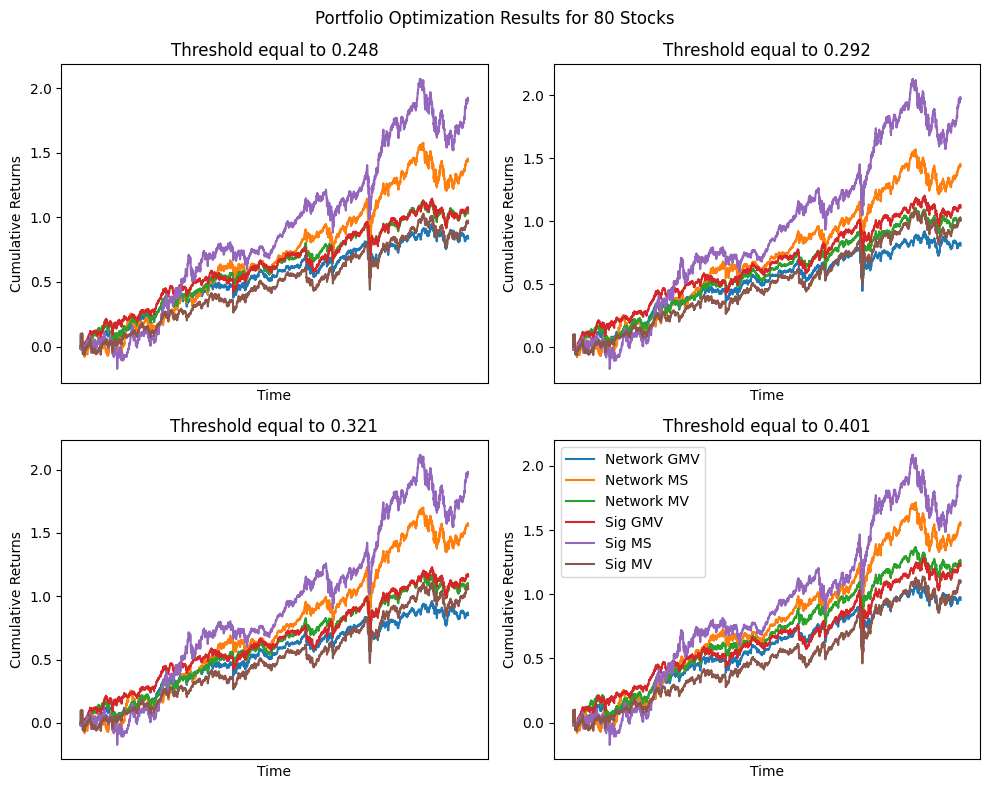

In [ ]:
# Plot Degree --------------------------
fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0,0].plot(df_NGMV_dict[1.96]['first_80'].cumsum(), label="Network GMV")
axs[0,0].plot(df_NMS_dict[1.96]['first_80'].cumsum(), label="Network MS")
axs[0,0].plot(df_NMV_dict[1.96]['first_80'].cumsum(), label="Network MV")
axs[0,0].plot(Sig_df_NGMV_dict[1.96]['first_80'].cumsum(), label="Sig GMV")
axs[0,0].plot(Sig_df_NMS_dict[1.96]['first_80'].cumsum(), label="Sig MS")
axs[0,0].plot(Sig_df_NMV_dict[1.96]['first_80'].cumsum(), label="Sig MV")
axs[0,0].set_xticks([])
axs[0,0].set_title(f"Threshold equal to {np.round(t_list[0],3)}")
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time")
#axs[0,0].grid()

axs[0,1].plot(df_NGMV_dict[2.326]['first_80'].cumsum(), label="Network GMV")
axs[0,1].plot(df_NMS_dict[2.326]['first_80'].cumsum(), label="Network MS")
axs[0,1].plot(df_NMV_dict[2.326]['first_80'].cumsum(), label="Network MV")
axs[0,1].plot(Sig_df_NGMV_dict[2.326]['first_80'].cumsum(), label="Sig GMV")
axs[0,1].plot(Sig_df_NMS_dict[2.326]['first_80'].cumsum(), label="Sig MS")
axs[0,1].plot(Sig_df_NMV_dict[2.326]['first_80'].cumsum(), label="Sig MV")
axs[0,1].set_xticks([])
axs[0,1].set_title(f"Threshold equal to {np.round(t_list[1],3)}")
axs[0,1].set_ylabel("Cumulative Returns")
axs[0,1].set_xlabel("Time")
#axs[0,1].grid()

axs[1,0].plot(df_NGMV_dict[2.575]['first_80'].cumsum(), label="Network GMV")
axs[1,0].plot(df_NMS_dict[2.575]['first_80'].cumsum(), label="Network MS")
axs[1,0].plot(df_NMV_dict[2.575]['first_80'].cumsum(), label="Network MV")
axs[1,0].plot(Sig_df_NGMV_dict[2.575]['first_80'].cumsum(), label="Sig GMV")
axs[1,0].plot(Sig_df_NMS_dict[2.575]['first_80'].cumsum(), label="Sig MS")
axs[1,0].plot(Sig_df_NMV_dict[2.575]['first_80'].cumsum(), label="Sig MV")
axs[1,0].set_xticks([])
axs[1,0].set_title(f"Threshold equal to {np.round(t_list[2],3)}")
axs[1,0].set_ylabel("Cumulative Returns")
axs[1,0].set_xlabel("Time")
#axs[1,0].grid()

axs[1,1].plot(df_NGMV_dict[3.291]['first_80'].cumsum(), label="Network GMV")
axs[1,1].plot(df_NMS_dict[3.291]['first_80'].cumsum(), label="Network MS")
axs[1,1].plot(df_NMV_dict[3.291]['first_80'].cumsum(), label="Network MV")
axs[1,1].plot(Sig_df_NGMV_dict[3.291]['first_80'].cumsum(), label="Sig GMV")
axs[1,1].plot(Sig_df_NMS_dict[3.291]['first_80'].cumsum(), label="Sig MS")
axs[1,1].plot(Sig_df_NMV_dict[3.291]['first_80'].cumsum(), label="Sig MV")
axs[1,1].set_xticks([])
axs[1,1].set_title(f"Threshold equal to {np.round(t_list[3],3)}")
axs[1,1].set_ylabel("Cumulative Returns")
axs[1,1].set_xlabel("Time")
#axs[1,1].grid()

# Adjust layout
fig.suptitle("Portfolio Optimization Results for 80 Stocks")
plt.tight_layout()
#plt.grid()
plt.legend()
plt.savefig("sigNet_ptf_80_ss.eps", format="eps", dpi=1000)
plt.show()

# Results Comparison

### Plot Visualization

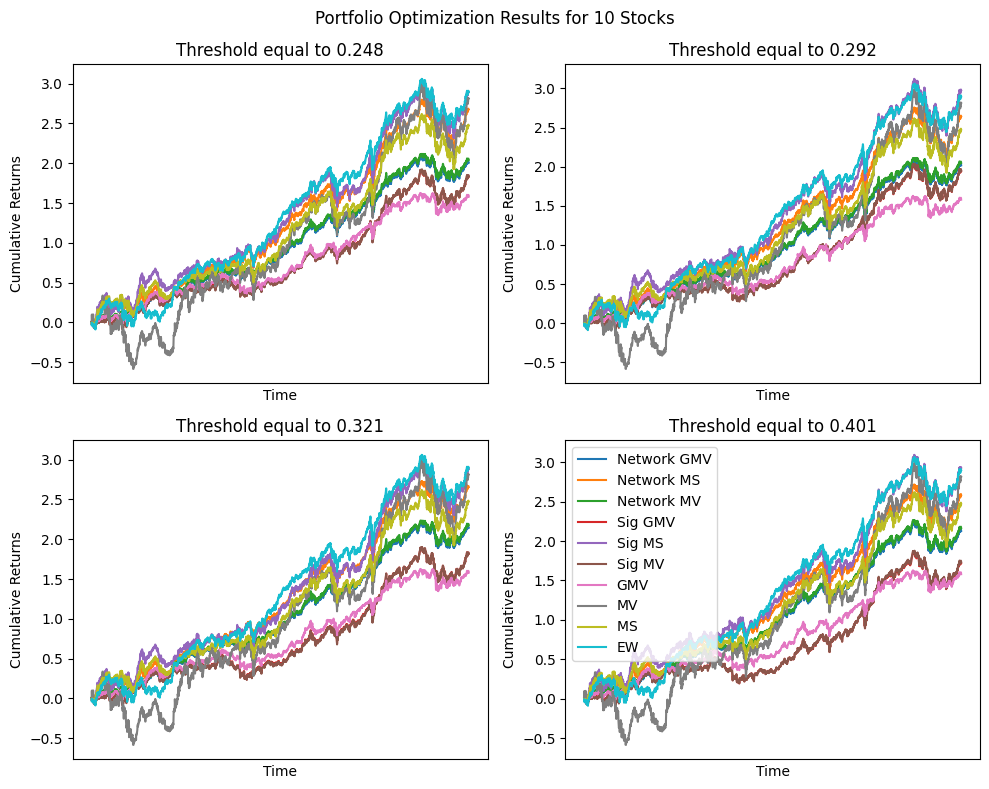

In [ ]:
# Plot Degree --------------------------
fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0,0].plot(df_NGMV_dict[1.96]['first_10'].cumsum(), label="Network GMV")
axs[0,0].plot(df_NMS_dict[1.96]['first_10'].cumsum(), label="Network MS")
axs[0,0].plot(df_NMV_dict[1.96]['first_10'].cumsum(), label="Network MV")
axs[0,0].plot(Sig_df_NGMV_dict[1.96]['first_10'].cumsum(), label="Sig GMV")
axs[0,0].plot(Sig_df_NMS_dict[1.96]['first_10'].cumsum(), label="Sig MS")
axs[0,0].plot(Sig_df_NMV_dict[1.96]['first_10'].cumsum(), label="Sig MV")
axs[0,0].plot(df_GMV['first_10'].cumsum(), label="GMV")
axs[0,0].plot(df_MV['first_10'].cumsum(), label="MV")
axs[0,0].plot(df_MS['first_10'].cumsum(), label="MS ")
axs[0,0].plot(df_EW['first_10'].cumsum(), label="EW")
axs[0,0].set_xticks([])
axs[0,0].set_title(f"Threshold equal to {np.round(t_list[0],3)}")
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time")
#axs[0,0].grid()

axs[0,1].plot(df_NGMV_dict[2.326]['first_10'].cumsum(), label="Network GMV")
axs[0,1].plot(df_NMS_dict[2.326]['first_10'].cumsum(), label="Network MS")
axs[0,1].plot(df_NMV_dict[2.326]['first_10'].cumsum(), label="Network MV")
axs[0,1].plot(Sig_df_NGMV_dict[2.326]['first_10'].cumsum(), label="Sig GMV")
axs[0,1].plot(Sig_df_NMS_dict[2.326]['first_10'].cumsum(), label="Sig MS")
axs[0,1].plot(Sig_df_NMV_dict[2.326]['first_10'].cumsum(), label="Sig MV")
axs[0,1].plot(df_GMV['first_10'].cumsum(), label="Global MV")
axs[0,1].plot(df_MV['first_10'].cumsum(), label="MV")
axs[0,1].plot(df_MS['first_10'].cumsum(), label="MS")
axs[0,1].plot(df_EW['first_10'].cumsum(), label="EW")
axs[0,1].set_xticks([])
axs[0,1].set_title(f"Threshold equal to {np.round(t_list[1],3)}")
axs[0,1].set_ylabel("Cumulative Returns")
axs[0,1].set_xlabel("Time")
#axs[0,1].grid()

axs[1,0].plot(df_NGMV_dict[2.575]['first_10'].cumsum(), label="Network GMV")
axs[1,0].plot(df_NMS_dict[2.575]['first_10'].cumsum(), label="Network MS")
axs[1,0].plot(df_NMV_dict[2.575]['first_10'].cumsum(), label="Network MV")
axs[1,0].plot(Sig_df_NGMV_dict[2.575]['first_10'].cumsum(), label="Sig GMV")
axs[1,0].plot(Sig_df_NMS_dict[2.575]['first_10'].cumsum(), label="Sig MS")
axs[1,0].plot(Sig_df_NMV_dict[2.575]['first_10'].cumsum(), label="Sig MV")
axs[1,0].plot(df_GMV['first_10'].cumsum(), label="GMV")
axs[1,0].plot(df_MV['first_10'].cumsum(), label="MV")
axs[1,0].plot(df_MS['first_10'].cumsum(), label="MS")
axs[1,0].plot(df_EW['first_10'].cumsum(), label="EW")
axs[1,0].set_xticks([])
axs[1,0].set_title(f"Threshold equal to {np.round(t_list[2],3)}")
axs[1,0].set_ylabel("Cumulative Returns")
axs[1,0].set_xlabel("Time")
#axs[1,0].grid()

axs[1,1].plot(df_NGMV_dict[3.291]['first_10'].cumsum(), label="Network GMV")
axs[1,1].plot(df_NMS_dict[3.291]['first_10'].cumsum(), label="Network MS")
axs[1,1].plot(df_NMV_dict[3.291]['first_10'].cumsum(), label="Network MV")
axs[1,1].plot(Sig_df_NGMV_dict[3.291]['first_10'].cumsum(), label="Sig GMV")
axs[1,1].plot(Sig_df_NMS_dict[3.291]['first_10'].cumsum(), label="Sig MS")
axs[1,1].plot(Sig_df_NMV_dict[3.291]['first_10'].cumsum(), label="Sig MV")
axs[1,1].plot(df_GMV['first_10'].cumsum(), label="GMV")
axs[1,1].plot(df_MV['first_10'].cumsum(), label="MV")
axs[1,1].plot(df_MS['first_10'].cumsum(), label="MS ")
axs[1,1].plot(df_EW['first_10'].cumsum(), label="EW")
axs[1,1].set_xticks([])
axs[1,1].set_title(f"Threshold equal to {np.round(t_list[3],3)}")
axs[1,1].set_ylabel("Cumulative Returns")
axs[1,1].set_xlabel("Time")
#axs[1,1].grid()

# Adjust layout
fig.suptitle("Portfolio Optimization Results for 10 Stocks")
plt.tight_layout()
#plt.grid()
plt.legend()
plt.savefig("All_ptf_10_ss.eps", format="eps", dpi=1000)
plt.show()

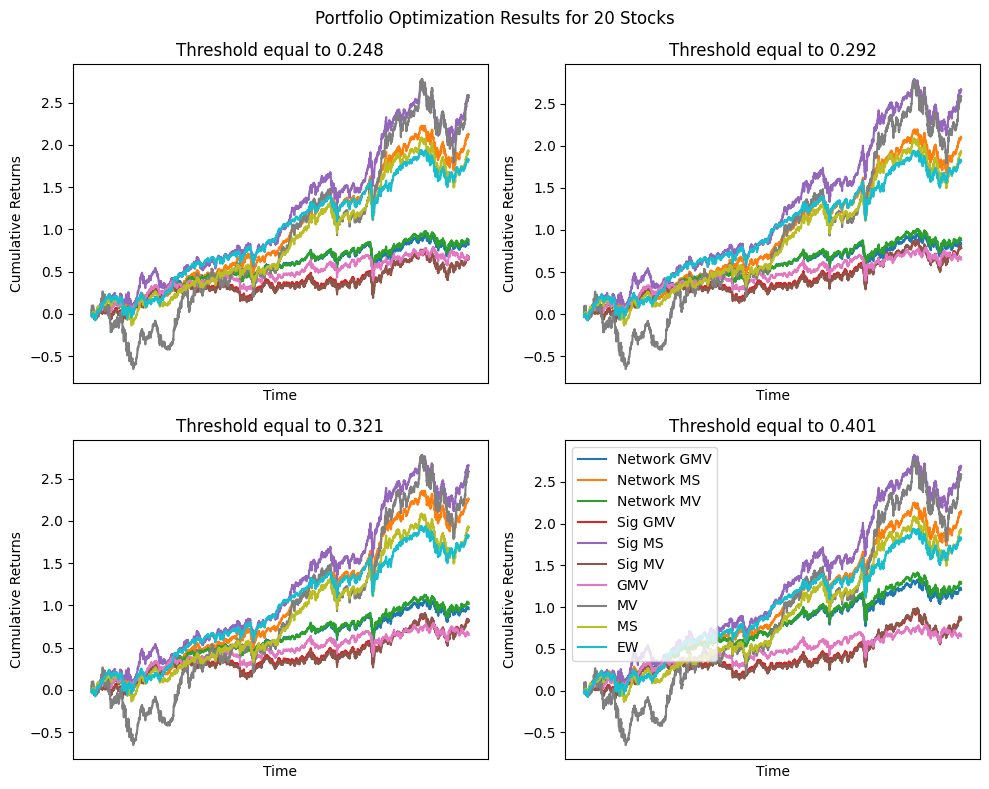

In [ ]:
# Plot Degree --------------------------
fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0,0].plot(df_NGMV_dict[1.96]['first_20'].cumsum(), label="Network GMV")
axs[0,0].plot(df_NMS_dict[1.96]['first_20'].cumsum(), label="Network MS")
axs[0,0].plot(df_NMV_dict[1.96]['first_20'].cumsum(), label="Network MV")
axs[0,0].plot(Sig_df_NGMV_dict[1.96]['first_20'].cumsum(), label="Sig GMV")
axs[0,0].plot(Sig_df_NMS_dict[1.96]['first_20'].cumsum(), label="Sig MS")
axs[0,0].plot(Sig_df_NMV_dict[1.96]['first_20'].cumsum(), label="Sig MV")
axs[0,0].plot(df_GMV['first_20'].cumsum(), label="GMV")
axs[0,0].plot(df_MV['first_20'].cumsum(), label="MV")
axs[0,0].plot(df_MS['first_20'].cumsum(), label="MS ")
axs[0,0].plot(df_EW['first_20'].cumsum(), label="EW")
axs[0,0].set_xticks([])
axs[0,0].set_title(f"Threshold equal to {np.round(t_list[0],3)}")
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time")
#axs[0,0].grid()

axs[0,1].plot(df_NGMV_dict[2.326]['first_20'].cumsum(), label="Network GMV")
axs[0,1].plot(df_NMS_dict[2.326]['first_20'].cumsum(), label="Network MS")
axs[0,1].plot(df_NMV_dict[2.326]['first_20'].cumsum(), label="Network MV")
axs[0,1].plot(Sig_df_NGMV_dict[2.326]['first_20'].cumsum(), label="Sig GMV")
axs[0,1].plot(Sig_df_NMS_dict[2.326]['first_20'].cumsum(), label="Sig MS")
axs[0,1].plot(Sig_df_NMV_dict[2.326]['first_20'].cumsum(), label="Sig MV")
axs[0,1].plot(df_GMV['first_20'].cumsum(), label="Global MV")
axs[0,1].plot(df_MV['first_20'].cumsum(), label="MV")
axs[0,1].plot(df_MS['first_20'].cumsum(), label="MS")
axs[0,1].plot(df_EW['first_20'].cumsum(), label="EW")
axs[0,1].set_xticks([])
axs[0,1].set_title(f"Threshold equal to {np.round(t_list[1],3)}")
axs[0,1].set_ylabel("Cumulative Returns")
axs[0,1].set_xlabel("Time")
#axs[0,1].grid()

axs[1,0].plot(df_NGMV_dict[2.575]['first_20'].cumsum(), label="Network GMV")
axs[1,0].plot(df_NMS_dict[2.575]['first_20'].cumsum(), label="Network MS")
axs[1,0].plot(df_NMV_dict[2.575]['first_20'].cumsum(), label="Network MV")
axs[1,0].plot(Sig_df_NGMV_dict[2.575]['first_20'].cumsum(), label="Sig GMV")
axs[1,0].plot(Sig_df_NMS_dict[2.575]['first_20'].cumsum(), label="Sig MS")
axs[1,0].plot(Sig_df_NMV_dict[2.575]['first_20'].cumsum(), label="Sig MV")
axs[1,0].plot(df_GMV['first_20'].cumsum(), label="GMV")
axs[1,0].plot(df_MV['first_20'].cumsum(), label="MV")
axs[1,0].plot(df_MS['first_20'].cumsum(), label="MS")
axs[1,0].plot(df_EW['first_20'].cumsum(), label="EW")
axs[1,0].set_xticks([])
axs[1,0].set_title(f"Threshold equal to {np.round(t_list[2],3)}")
axs[1,0].set_ylabel("Cumulative Returns")
axs[1,0].set_xlabel("Time")
#axs[1,0].grid()

axs[1,1].plot(df_NGMV_dict[3.291]['first_20'].cumsum(), label="Network GMV")
axs[1,1].plot(df_NMS_dict[3.291]['first_20'].cumsum(), label="Network MS")
axs[1,1].plot(df_NMV_dict[3.291]['first_20'].cumsum(), label="Network MV")
axs[1,1].plot(Sig_df_NGMV_dict[3.291]['first_20'].cumsum(), label="Sig GMV")
axs[1,1].plot(Sig_df_NMS_dict[3.291]['first_20'].cumsum(), label="Sig MS")
axs[1,1].plot(Sig_df_NMV_dict[3.291]['first_20'].cumsum(), label="Sig MV")
axs[1,1].plot(df_GMV['first_20'].cumsum(), label="GMV")
axs[1,1].plot(df_MV['first_20'].cumsum(), label="MV")
axs[1,1].plot(df_MS['first_20'].cumsum(), label="MS ")
axs[1,1].plot(df_EW['first_20'].cumsum(), label="EW")
axs[1,1].set_xticks([])
axs[1,1].set_title(f"Threshold equal to {np.round(t_list[3],3)}")
axs[1,1].set_ylabel("Cumulative Returns")
axs[1,1].set_xlabel("Time")
#axs[1,1].grid()

# Adjust layout
fig.suptitle("Portfolio Optimization Results for 20 Stocks")
plt.tight_layout()
#plt.grid()
plt.legend()
plt.savefig("All_ptf_20_ss.eps", format="eps", dpi=1000)
plt.show()

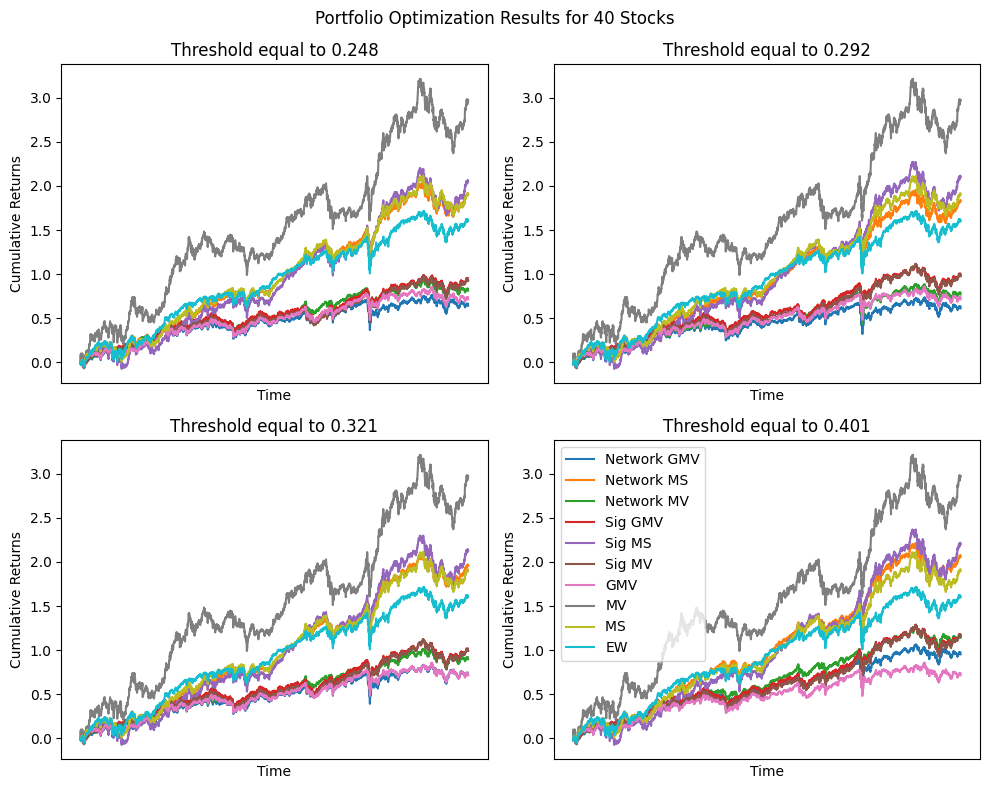

In [ ]:
# Plot Degree --------------------------
fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0,0].plot(df_NGMV_dict[1.96]['first_40'].cumsum(), label="Network GMV")
axs[0,0].plot(df_NMS_dict[1.96]['first_40'].cumsum(), label="Network MS")
axs[0,0].plot(df_NMV_dict[1.96]['first_40'].cumsum(), label="Network MV")
axs[0,0].plot(Sig_df_NGMV_dict[1.96]['first_40'].cumsum(), label="Sig GMV")
axs[0,0].plot(Sig_df_NMS_dict[1.96]['first_40'].cumsum(), label="Sig MS")
axs[0,0].plot(Sig_df_NMV_dict[1.96]['first_40'].cumsum(), label="Sig MV")
axs[0,0].plot(df_GMV['first_40'].cumsum(), label="GMV")
axs[0,0].plot(df_MV['first_40'].cumsum(), label="MV")
axs[0,0].plot(df_MS['first_40'].cumsum(), label="MS ")
axs[0,0].plot(df_EW['first_40'].cumsum(), label="EW")
axs[0,0].set_xticks([])
axs[0,0].set_title(f"Threshold equal to {np.round(t_list[0],3)}")
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time")
#axs[0,0].grid()

axs[0,1].plot(df_NGMV_dict[2.326]['first_40'].cumsum(), label="Network GMV")
axs[0,1].plot(df_NMS_dict[2.326]['first_40'].cumsum(), label="Network MS")
axs[0,1].plot(df_NMV_dict[2.326]['first_40'].cumsum(), label="Network MV")
axs[0,1].plot(Sig_df_NGMV_dict[2.326]['first_40'].cumsum(), label="Sig GMV")
axs[0,1].plot(Sig_df_NMS_dict[2.326]['first_40'].cumsum(), label="Sig MS")
axs[0,1].plot(Sig_df_NMV_dict[2.326]['first_40'].cumsum(), label="Sig MV")
axs[0,1].plot(df_GMV['first_40'].cumsum(), label="Global MV")
axs[0,1].plot(df_MV['first_40'].cumsum(), label="MV")
axs[0,1].plot(df_MS['first_40'].cumsum(), label="MS")
axs[0,1].plot(df_EW['first_40'].cumsum(), label="EW")
axs[0,1].set_xticks([])
axs[0,1].set_title(f"Threshold equal to {np.round(t_list[1],3)}")
axs[0,1].set_ylabel("Cumulative Returns")
axs[0,1].set_xlabel("Time")
#axs[0,1].grid()

axs[1,0].plot(df_NGMV_dict[2.575]['first_40'].cumsum(), label="Network GMV")
axs[1,0].plot(df_NMS_dict[2.575]['first_40'].cumsum(), label="Network MS")
axs[1,0].plot(df_NMV_dict[2.575]['first_40'].cumsum(), label="Network MV")
axs[1,0].plot(Sig_df_NGMV_dict[2.575]['first_40'].cumsum(), label="Sig GMV")
axs[1,0].plot(Sig_df_NMS_dict[2.575]['first_40'].cumsum(), label="Sig MS")
axs[1,0].plot(Sig_df_NMV_dict[2.575]['first_40'].cumsum(), label="Sig MV")
axs[1,0].plot(df_GMV['first_40'].cumsum(), label="GMV")
axs[1,0].plot(df_MV['first_40'].cumsum(), label="MV")
axs[1,0].plot(df_MS['first_40'].cumsum(), label="MS")
axs[1,0].plot(df_EW['first_40'].cumsum(), label="EW")
axs[1,0].set_xticks([])
axs[1,0].set_title(f"Threshold equal to {np.round(t_list[2],3)}")
axs[1,0].set_ylabel("Cumulative Returns")
axs[1,0].set_xlabel("Time")
#axs[1,0].grid()

axs[1,1].plot(df_NGMV_dict[3.291]['first_40'].cumsum(), label="Network GMV")
axs[1,1].plot(df_NMS_dict[3.291]['first_40'].cumsum(), label="Network MS")
axs[1,1].plot(df_NMV_dict[3.291]['first_40'].cumsum(), label="Network MV")
axs[1,1].plot(Sig_df_NGMV_dict[3.291]['first_40'].cumsum(), label="Sig GMV")
axs[1,1].plot(Sig_df_NMS_dict[3.291]['first_40'].cumsum(), label="Sig MS")
axs[1,1].plot(Sig_df_NMV_dict[3.291]['first_40'].cumsum(), label="Sig MV")
axs[1,1].plot(df_GMV['first_40'].cumsum(), label="GMV")
axs[1,1].plot(df_MV['first_40'].cumsum(), label="MV")
axs[1,1].plot(df_MS['first_40'].cumsum(), label="MS ")
axs[1,1].plot(df_EW['first_40'].cumsum(), label="EW")
axs[1,1].set_xticks([])
axs[1,1].set_title(f"Threshold equal to {np.round(t_list[3],3)}")
axs[1,1].set_ylabel("Cumulative Returns")
axs[1,1].set_xlabel("Time")
#axs[1,1].grid()

# Adjust layout
fig.suptitle("Portfolio Optimization Results for 40 Stocks")
plt.tight_layout()
#plt.grid()
plt.legend()
plt.savefig("All_ptf_40_ss.eps", format="eps", dpi=1000)
plt.show()

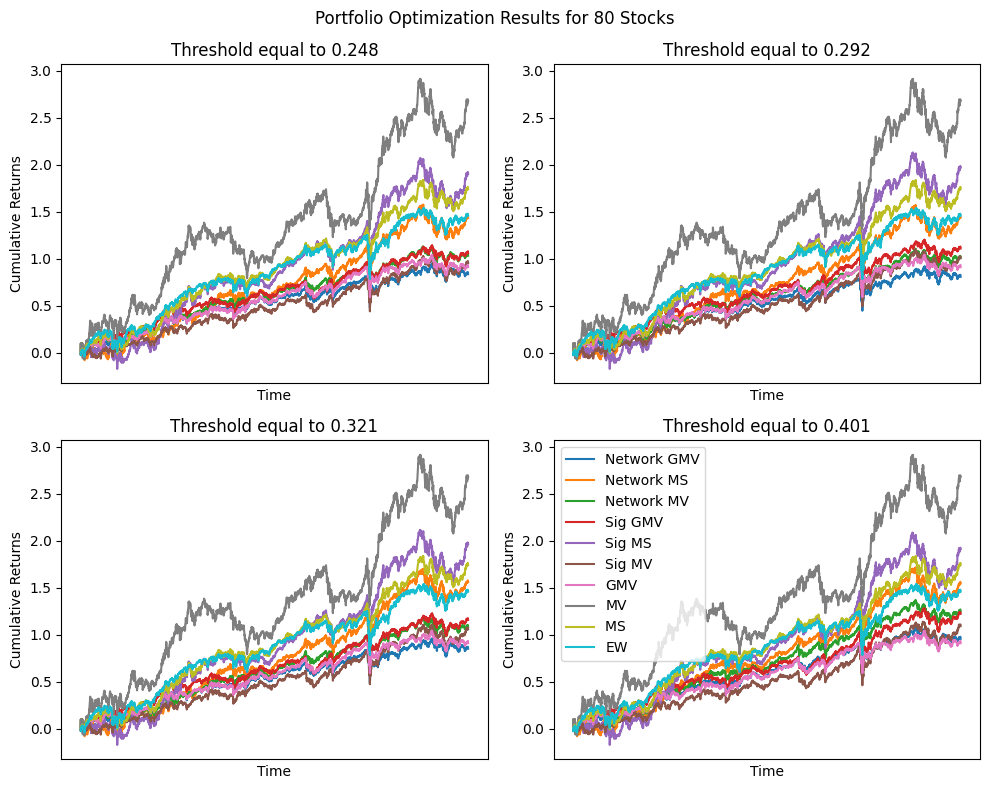

In [ ]:
# Plot Degree --------------------------
fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0,0].plot(df_NGMV_dict[1.96]['first_80'].cumsum(), label="Network GMV")
axs[0,0].plot(df_NMS_dict[1.96]['first_80'].cumsum(), label="Network MS")
axs[0,0].plot(df_NMV_dict[1.96]['first_80'].cumsum(), label="Network MV")
axs[0,0].plot(Sig_df_NGMV_dict[1.96]['first_80'].cumsum(), label="Sig GMV")
axs[0,0].plot(Sig_df_NMS_dict[1.96]['first_80'].cumsum(), label="Sig MS")
axs[0,0].plot(Sig_df_NMV_dict[1.96]['first_80'].cumsum(), label="Sig MV")
axs[0,0].plot(df_GMV['first_80'].cumsum(), label="GMV")
axs[0,0].plot(df_MV['first_80'].cumsum(), label="MV")
axs[0,0].plot(df_MS['first_80'].cumsum(), label="MS ")
axs[0,0].plot(df_EW['first_80'].cumsum(), label="EW")
axs[0,0].set_xticks([])
axs[0,0].set_title(f"Threshold equal to {np.round(t_list[0],3)}")
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time")
#axs[0,0].grid()

axs[0,1].plot(df_NGMV_dict[2.326]['first_80'].cumsum(), label="Network GMV")
axs[0,1].plot(df_NMS_dict[2.326]['first_80'].cumsum(), label="Network MS")
axs[0,1].plot(df_NMV_dict[2.326]['first_80'].cumsum(), label="Network MV")
axs[0,1].plot(Sig_df_NGMV_dict[2.326]['first_80'].cumsum(), label="Sig GMV")
axs[0,1].plot(Sig_df_NMS_dict[2.326]['first_80'].cumsum(), label="Sig MS")
axs[0,1].plot(Sig_df_NMV_dict[2.326]['first_80'].cumsum(), label="Sig MV")
axs[0,1].plot(df_GMV['first_80'].cumsum(), label="Global MV")
axs[0,1].plot(df_MV['first_80'].cumsum(), label="MV")
axs[0,1].plot(df_MS['first_80'].cumsum(), label="MS")
axs[0,1].plot(df_EW['first_80'].cumsum(), label="EW")
axs[0,1].set_xticks([])
axs[0,1].set_title(f"Threshold equal to {np.round(t_list[1],3)}")
axs[0,1].set_ylabel("Cumulative Returns")
axs[0,1].set_xlabel("Time")
#axs[0,1].grid()

axs[1,0].plot(df_NGMV_dict[2.575]['first_80'].cumsum(), label="Network GMV")
axs[1,0].plot(df_NMS_dict[2.575]['first_80'].cumsum(), label="Network MS")
axs[1,0].plot(df_NMV_dict[2.575]['first_80'].cumsum(), label="Network MV")
axs[1,0].plot(Sig_df_NGMV_dict[2.575]['first_80'].cumsum(), label="Sig GMV")
axs[1,0].plot(Sig_df_NMS_dict[2.575]['first_80'].cumsum(), label="Sig MS")
axs[1,0].plot(Sig_df_NMV_dict[2.575]['first_80'].cumsum(), label="Sig MV")
axs[1,0].plot(df_GMV['first_80'].cumsum(), label="GMV")
axs[1,0].plot(df_MV['first_80'].cumsum(), label="MV")
axs[1,0].plot(df_MS['first_80'].cumsum(), label="MS")
axs[1,0].plot(df_EW['first_80'].cumsum(), label="EW")
axs[1,0].set_xticks([])
axs[1,0].set_title(f"Threshold equal to {np.round(t_list[2],3)}")
axs[1,0].set_ylabel("Cumulative Returns")
axs[1,0].set_xlabel("Time")
#axs[1,0].grid()

axs[1,1].plot(df_NGMV_dict[3.291]['first_80'].cumsum(), label="Network GMV")
axs[1,1].plot(df_NMS_dict[3.291]['first_80'].cumsum(), label="Network MS")
axs[1,1].plot(df_NMV_dict[3.291]['first_80'].cumsum(), label="Network MV")
axs[1,1].plot(Sig_df_NGMV_dict[3.291]['first_80'].cumsum(), label="Sig GMV")
axs[1,1].plot(Sig_df_NMS_dict[3.291]['first_80'].cumsum(), label="Sig MS")
axs[1,1].plot(Sig_df_NMV_dict[3.291]['first_80'].cumsum(), label="Sig MV")
axs[1,1].plot(df_GMV['first_80'].cumsum(), label="GMV")
axs[1,1].plot(df_MV['first_80'].cumsum(), label="MV")
axs[1,1].plot(df_MS['first_80'].cumsum(), label="MS ")
axs[1,1].plot(df_EW['first_80'].cumsum(), label="EW")
axs[1,1].set_xticks([])
axs[1,1].set_title(f"Threshold equal to {np.round(t_list[3],3)}")
axs[1,1].set_ylabel("Cumulative Returns")
axs[1,1].set_xlabel("Time")
#axs[1,1].grid()

# Adjust layout
fig.suptitle("Portfolio Optimization Results for 80 Stocks")
plt.tight_layout()
#plt.grid()
plt.legend()
plt.savefig("All_ptf_80_ss.eps", format="eps", dpi=1000)
plt.show()

## Main Statistics

### Long-Only

#### With rebalancing

In [ ]:
number_asset = list(df_EW.columns)
dfs = [df_GMV, df_MV, df_MS, df_EW, df_NGMV_dict, df_NMS_dict, df_NMV_dict, Sig_df_NGMV_dict, Sig_df_NMS_dict, Sig_df_NMV_dict ]
df_statistics = compute_main_statistics(dfs, number_asset, tau_list)#, benchmark_ret=ret_sp_train["^GSPC"])
df_statistics

Strategy  Theta Number Asset  Mean Return  Std Return  Excess kurtosis  \
0        GMV  0.000     first_10    12.958047   17.469092         8.020613   
1        GMV  0.000     first_20     5.134054   15.106288         8.568002   
2        GMV  0.000     first_40     5.657236   13.564115         9.805656   
3        GMV  0.000     first_80     7.268919   13.362010        15.954362   
4         MV  0.000     first_10    24.209326   37.679994         0.102254   
..       ...    ...          ...          ...         ...              ...   
107  Sig_NMV  2.575     first_80     8.512932   15.423794        11.148738   
108  Sig_NMV  3.291     first_10    14.316733   19.818069         5.695456   
109  Sig_NMV  3.291     first_20     6.898971   17.176989         6.546736   
110  Sig_NMV  3.291     first_40     9.317042   15.512041         8.201839   
111  Sig_NMV  3.291     first_80     8.810937   15.923309        10.850847   

     Skewness  Cumulative Return  Sharpe Ratio  Max Drowdown  CVaR 95%  
0   -0.269021         158.003219      0.741770    -25.514017 -2.609505  
1   -0.407080          64.913511      0.339862    -27.851080 -2.267936  
2   -0.401728          71.350314      0.417074    -27.340637 -2.042628  
3   -0.807310          90.981445      0.543999    -29.470017 -1.978169  
4   -0.420025         281.184147      0.642498    -68.682459 -5.785565  
..        ...                ...           ...           ...       ...  
107 -0.727148         105.934303      0.551935    -31.926875 -2.341562  
108 -0.460766         173.511791      0.722408    -41.310522 -3.041756  
109 -0.558391          86.501394      0.401640    -36.876077 -2.655405  
110 -0.537238         115.509017      0.600633    -31.332100 -2.344615  
111 -0.851698         109.490929      0.553336    -36.029417 -2.458334  

[112 rows x 11 columns]

In [ ]:
df_statistics[df_statistics['Number Asset']=='first_10']

Strategy  Theta Number Asset  Mean Return  Std Return  Excess kurtosis  \
0         GMV  0.000     first_10    12.958047   17.469092         8.020613   
4          MV  0.000     first_10    24.209326   37.679994         0.102254   
8          MS  0.000     first_10    21.025544   25.901406         0.835216   
12         EW  0.000     first_10    25.037457   25.077205         1.836984   
16       NGMV  1.960     first_10    16.737746   18.466155         6.401653   
20       NGMV  2.326     first_10    16.840562   18.624144         5.906619   
24       NGMV  2.575     first_10    17.977077   18.624797         5.705364   
28       NGMV  3.291     first_10    17.841657   19.236528         5.876397   
32        NMS  1.960     first_10    22.927598   24.437758         1.753020   
36        NMS  2.326     first_10    22.620089   24.328866         1.543626   
40        NMS  2.575     first_10    22.738289   23.161857         1.893700   
44        NMS  3.291     first_10    22.031488   23.291555         2.391895   
48        NMV  1.960     first_10    17.051681   18.590495         6.199291   
52        NMV  2.326     first_10    17.115065   18.748079         5.666135   
56        NMV  2.575     first_10    18.279538   18.756173         5.497206   
60        NMV  3.291     first_10    18.159141   19.380777         5.651767   
64   Sig_NMGV  1.960     first_10    15.164048   19.234404         5.498837   
68   Sig_NMGV  2.326     first_10    16.185651   19.558414         5.173538   
72   Sig_NMGV  2.575     first_10    15.051695   19.624019         4.815820   
76   Sig_NMGV  3.291     first_10    14.202511   19.701409         5.821725   
80    Sig_NMS  1.960     first_10    25.006202   28.371923         0.771682   
84    Sig_NMS  2.326     first_10    25.805343   28.490414         0.668754   
88    Sig_NMS  2.575     first_10    24.902890   28.505006         0.582187   
92    Sig_NMS  3.291     first_10    25.334135   28.576978         0.776300   
96    Sig_NMV  1.960     first_10    15.201635   19.340432         5.324473   
100   Sig_NMV  2.326     first_10    16.257473   19.676194         4.995974   
104   Sig_NMV  2.575     first_10    15.057666   19.747738         4.680174   
108   Sig_NMV  3.291     first_10    14.316733   19.818069         5.695456   

     Skewness  Cumulative Return  Sharpe Ratio  Max Drowdown  CVaR 95%  
0   -0.269021         158.003219      0.741770    -25.514017 -2.609505  
4   -0.420025         281.184147      0.642498    -68.682459 -5.785565  
8   -0.385873         247.493031      0.811753    -53.977618 -3.955772  
12  -0.545634         289.806560      0.998415    -50.109273 -3.818560  
16  -0.353857         200.696574      0.906401    -29.571713 -2.798290  
20  -0.394625         201.838594      0.904233    -30.027154 -2.817676  
24  -0.436711         214.396092      0.965223    -29.322043 -2.821770  
28  -0.489086         212.906153      0.927488    -35.310634 -2.941339  
32  -0.406084         267.725379      0.938204    -50.814593 -3.721474  
36  -0.374815         264.475589      0.929763    -50.797003 -3.693183  
40  -0.418639         265.725696      0.981713    -43.476651 -3.481717  
44  -0.453905         258.232502      0.945900    -48.482647 -3.562908  
48  -0.355600         204.180455      0.917226    -30.253653 -2.815377  
52  -0.389338         204.882720      0.912897    -30.580455 -2.832347  
56  -0.432946         217.717722      0.974588    -29.907132 -2.837020  
60  -0.485457         216.396538      0.936967    -35.847314 -2.960406  
64  -0.404924         183.090699      0.788381    -39.538869 -2.950360  
68  -0.370622         194.547033      0.827554    -40.088142 -3.005062  
72  -0.365181         181.824592      0.767004    -40.088142 -3.027401  
76  -0.457371         172.215110      0.720888    -40.663613 -3.025582  
80  -0.399392         289.482177      0.881371    -56.394427 -4.305634  
84  -0.380042         297.751043      0.905755    -56.039379 -4.300874  
88  -0.375901         288.409340  

In [ ]:
df_statistics[df_statistics['Number Asset']=='first_20']

Strategy  Theta Number Asset  Mean Return  Std Return  Excess kurtosis  \
1         GMV  0.000     first_20     5.134054   15.106288         8.568002   
5          MV  0.000     first_20    22.035568   36.569380         0.292166   
9          MS  0.000     first_20    16.020787   23.308902         2.579245   
13         EW  0.000     first_20    15.040516   21.203002         8.386110   
17       NGMV  1.960     first_20     6.549364   15.833798        13.025484   
21       NGMV  2.326     first_20     6.611365   16.004437        13.070558   
25       NGMV  2.575     first_20     7.653471   15.982674        11.817549   
29       NGMV  3.291     first_20     9.783952   16.353383        11.464107   
33        NMS  1.960     first_20    17.792868   22.419960         4.734697   
37        NMS  2.326     first_20    17.562305   22.592224         4.849335   
41        NMS  2.575     first_20    18.997656   22.393138         3.710426   
45        NMS  3.291     first_20    17.922863   21.525582         4.276255   
49        NMV  1.960     first_20     6.876659   16.089022        12.332494   
53        NMV  2.326     first_20     7.024027   16.288794        12.269697   
57        NMV  2.575     first_20     8.157504   16.292393        11.070094   
61        NMV  3.291     first_20    10.402707   16.787865        10.645112   
65   Sig_NMGV  1.960     first_20     5.137878   15.997399         6.817277   
69   Sig_NMGV  2.326     first_20     6.246199   16.226663         6.491398   
73   Sig_NMGV  2.575     first_20     6.458177   16.369970         6.239119   
77   Sig_NMGV  3.291     first_20     6.809135   16.808547         7.074415   
81    Sig_NMS  1.960     first_20    21.868012   26.614906         1.561814   
85    Sig_NMS  2.326     first_20    22.804037   26.614407         1.437277   
89    Sig_NMS  2.575     first_20    22.706385   26.568971         1.356289   
93    Sig_NMS  3.291     first_20    22.993576   26.848277         1.641131   
97    Sig_NMV  1.960     first_20     5.261423   16.287532         6.501104   
101   Sig_NMV  2.326     first_20     6.268568   16.526894         6.074899   
105   Sig_NMV  2.575     first_20     6.505989   16.694445         5.793261   
109   Sig_NMV  3.291     first_20     6.898971   17.176989         6.546736   

     Skewness  Cumulative Return  Sharpe Ratio  Max Drowdown  CVaR 95%  
1   -0.407080          64.913511      0.339862    -27.851080 -2.267936  
5   -0.455890         258.275881      0.602569    -68.255535 -5.665908  
9   -0.483990         192.705042      0.687325    -48.249938 -3.610831  
13  -0.818171         181.698555      0.709358    -39.819900 -3.289289  
17  -0.733010          82.253458      0.413632    -33.815232 -2.413503  
21  -0.840718          83.007811      0.413096    -34.902212 -2.444953  
25  -0.699917          95.622074      0.478860    -31.616836 -2.434235  
29  -0.767121         121.036469      0.598283    -32.772627 -2.511651  
33  -0.589484         212.368953      0.793617    -44.795672 -3.488918  
37  -0.632000         209.827241      0.777361    -44.188703 -3.500229  
41  -0.479855         225.570341      0.848370    -43.741866 -3.442366  
45  -0.567528         213.799822      0.832631    -43.810712 -3.329455  
49  -0.694824          86.230707      0.427413    -33.290726 -2.465237  
53  -0.803306          88.017540      0.431218    -34.613939 -2.501341  
57  -0.664164         101.679602      0.500694    -31.193674 -2.495994  
61  -0.737217         128.325565      0.619656    -32.694104 -2.590669  
65  -0.593283          64.960678      0.321170    -31.309454 -2.445779  
69  -0.558897          78.558558      0.384934    -31.904479 -2.477124  
73  -0.574105          81.143196      0.394514    -32.397544 -2.507318  
77  -0.601678          85.411148      0.405100    -35.501075 -2.582155  
81  -0.462489         256.493246      0.821645    -53.648820 -4.085015  
85  -0.447577         266.420549      0.856831    -53.332386 -4.074004  
89  -0.438285         265.388395  

In [ ]:
df_statistics[df_statistics['Number Asset']=='first_40']

Strategy  Theta Number Asset  Mean Return  Std Return  Excess kurtosis  \
2         GMV  0.000     first_40     5.657236   13.564115         9.805656   
6          MV  0.000     first_40    25.710208   33.279348         0.904266   
10         MS  0.000     first_40    15.777880   21.203080        11.331087   
14         EW  0.000     first_40    13.134079   18.850577         9.881865   
18       NGMV  1.960     first_40     5.064595   13.708298        11.295845   
22       NGMV  2.326     first_40     4.828378   13.789819        11.665460   
26       NGMV  2.575     first_40     5.713113   13.867255        11.305846   
30       NGMV  3.291     first_40     7.617208   14.104490        10.351419   
34        NMS  1.960     first_40    15.835378   20.295217         9.745090   
38        NMS  2.326     first_40    15.131993   20.219757        10.450083   
42        NMS  2.575     first_40    16.305447   20.385284         9.579923   
46        NMS  3.291     first_40    17.231871   19.809679         6.288433   
50        NMV  1.960     first_40     6.463200   14.449079        11.646106   
54        NMV  2.326     first_40     6.113856   14.570878        12.074974   
58        NMV  2.575     first_40     7.159986   14.712834        11.578347   
62        NMV  3.291     first_40     9.198333   15.108371         9.936364   
66   Sig_NMGV  1.960     first_40     7.442608   14.209065         8.111166   
70   Sig_NMGV  2.326     first_40     7.868572   14.381921         8.168217   
74   Sig_NMGV  2.575     first_40     7.957335   14.423309         8.142234   
78   Sig_NMGV  3.291     first_40     9.322927   14.783963         8.852326   
82    Sig_NMS  1.960     first_40    17.148425   24.556969         5.647685   
86    Sig_NMS  2.326     first_40    17.594262   24.511371         5.139064   
90    Sig_NMS  2.575     first_40    17.869348   24.528026         5.219006   
94    Sig_NMS  3.291     first_40    18.511090   24.862004         5.061347   
98    Sig_NMV  1.960     first_40     7.375035   14.854856         7.723660   
102   Sig_NMV  2.326     first_40     7.816005   15.074141         7.790361   
106   Sig_NMV  2.575     first_40     7.961364   15.100819         7.786259   
110   Sig_NMV  3.291     first_40     9.317042   15.512041         8.201839   

     Skewness  Cumulative Return  Sharpe Ratio  Max Drowdown  CVaR 95%  
2   -0.401728          71.350314      0.417074    -27.340637 -2.042628  
6   -0.498525         296.769414      0.772557    -61.781557 -5.073160  
10  -0.994823         189.986344      0.744132    -39.438269 -3.226383  
14  -0.767789         160.022960      0.696747    -36.477335 -2.932777  
18  -0.542169          64.056553      0.369455    -30.465168 -2.071630  
22  -0.648368          61.137937      0.350141    -31.490033 -2.098522  
26  -0.646794          72.035904      0.411986    -31.273217 -2.112735  
30  -0.495733          95.185177      0.540056    -27.690707 -2.147829  
34  -0.758749         190.630390      0.780252    -36.861069 -3.134086  
38  -0.825373         182.729601      0.748377    -38.117267 -3.120611  
42  -0.760614         195.883853      0.799864    -37.964909 -3.136358  
46  -0.533574         206.175900      0.869871    -33.840703 -3.038189  
50  -0.570177          81.204368      0.447309    -30.252415 -2.198890  
54  -0.685223          76.942295      0.419594    -31.604643 -2.231490  
58  -0.677601          89.663879      0.486649    -31.430567 -2.252894  
62  -0.543128         114.099950      0.608824    -27.654836 -2.308859  
66  -0.438811          93.079504      0.523793    -29.160862 -2.136255  
70  -0.510689          98.210631      0.547115    -29.123439 -2.171364  
74  -0.519623          99.277322      0.551700    -29.132101 -2.176504  
78  -0.555949         115.578830      0.630611    -29.944307 -2.223465  
82  -0.680675         205.252183      0.698312    -45.777756 -3.765193  
86  -0.670290         210.179825      0.717800    -46.953245 -3.774193  
90  -0.675492         213.210963  

In [ ]:
df_statistics[df_statistics['Number Asset']=='first_80']

Strategy  Theta Number Asset  Mean Return  Std Return  Excess kurtosis  \
3         GMV  0.000     first_80     7.268919   13.362010        15.954362   
7          MV  0.000     first_80    23.000464   33.055401         0.353046   
11         MS  0.000     first_80    14.399084   19.239961         9.118769   
15         EW  0.000     first_80    11.927314   18.565463        10.818025   
19       NGMV  1.960     first_80     6.655239   13.416852        14.065825   
23       NGMV  2.326     first_80     6.426353   13.472839        13.946647   
27       NGMV  2.575     first_80     6.781733   13.565185        13.988323   
31       NGMV  3.291     first_80     7.658637   13.893330        12.574719   
35        NMS  1.960     first_80    11.728533   19.685755         9.499323   
39        NMS  2.326     first_80    11.737962   19.560202         9.874289   
43        NMS  2.575     first_80    12.786012   19.690742         9.846525   
47        NMS  3.291     first_80    12.662524   19.619155         7.527813   
51        NMV  1.960     first_80     8.279387   15.051619        14.011706   
55        NMV  2.326     first_80     8.094942   15.192624        13.844648   
59        NMV  2.575     first_80     8.716686   15.353689        13.261085   
63        NMV  3.291     first_80    10.109875   15.856082        10.806489   
67   Sig_NMGV  1.960     first_80     8.504013   14.126175        12.710687   
71   Sig_NMGV  2.326     first_80     8.933057   14.232668        12.677525   
75   Sig_NMGV  2.575     first_80     9.338155   14.287100        12.420383   
79   Sig_NMGV  3.291     first_80     9.896535   14.765231        12.273422   
83    Sig_NMS  1.960     first_80    15.849069   24.133459         4.428268   
87    Sig_NMS  2.326     first_80    16.416241   24.262903         4.179722   
91    Sig_NMS  2.575     first_80    16.385198   24.431170         4.170355   
95    Sig_NMS  3.291     first_80    15.883026   24.787321         3.578850   
99    Sig_NMV  1.960     first_80     7.644036   15.214369        11.713736   
103   Sig_NMV  2.326     first_80     8.068222   15.357452        11.337900   
107   Sig_NMV  2.575     first_80     8.512932   15.423794        11.148738   
111   Sig_NMV  3.291     first_80     8.810937   15.923309        10.850847   

     Skewness  Cumulative Return  Sharpe Ratio  Max Drowdown  CVaR 95%  
3   -0.807310          90.981445      0.543999    -29.470017 -1.978169  
7   -0.494802         268.494247      0.695816    -61.543071 -5.105720  
11  -0.976462         174.445870      0.748395    -34.239169 -2.964331  
15  -0.830717         146.113574      0.642446    -39.717008 -2.888858  
19  -0.710598          83.541368      0.496036    -30.345901 -2.012278  
23  -0.728687          80.755485      0.476986    -31.102256 -2.031329  
27  -0.791391          85.078422      0.499937    -31.407706 -2.053129  
31  -0.773646          95.684304      0.551246    -31.841056 -2.128190  
35  -0.648334         143.808078      0.595788    -35.608373 -2.982097  
39  -0.643382         143.917530      0.600094    -36.346702 -2.956324  
43  -0.691815         156.026300      0.649341    -37.684994 -2.986550  
47  -0.567405         154.605404      0.645416    -35.009219 -2.978829  
51  -0.849893         103.140197      0.550066    -31.067016 -2.274701  
55  -0.847363         100.929258      0.532821    -31.762126 -2.306928  
59  -0.887556         108.367120      0.567726    -32.380272 -2.346467  
63  -0.809924         124.881011      0.637602    -32.431713 -2.447405  
67  -0.684873         105.827708      0.602004    -31.215753 -2.103386  
71  -0.676808         110.945608      0.627645    -31.331877 -2.126785  
75  -0.696829         115.759470      0.653607    -31.397324 -2.138869  
79  -0.755717         122.365771      0.670259    -35.221246 -2.241237  
83  -0.672331         190.783698      0.656726    -46.196071 -3.716214  
87  -0.651296         197.119004      0.676598    -46.419200 -3.744522  
91  -0.652671         196.773050  

### Short-Selling

#### With Rebalancing

In [ ]:
number_asset = list(df_EW.columns)
dfs = [df_GMV, df_MV, df_MS, df_EW, df_NGMV_dict, df_NMS_dict, df_NMV_dict, Sig_df_NGMV_dict, Sig_df_NMS_dict, Sig_df_NMV_dict ]
df_statistics_ss = compute_main_statistics(dfs, number_asset, tau_list)#, benchmark_ret=ret_sp_train["^GSPC"])
df_statistics_ss

Strategy  Theta Number Asset  Mean Return  Std Return  Excess kurtosis  \
0        GMV  0.000     first_10    13.474155   17.455885         7.763040   
1        GMV  0.000     first_20     6.205420   15.126371         7.138294   
2        GMV  0.000     first_40     5.646474   13.716403         8.111416   
3        GMV  0.000     first_80     7.951479   13.611514        10.908622   
4         MV  0.000     first_10    57.425089   76.290417         0.899253   
..       ...    ...          ...          ...         ...              ...   
107  Sig_NMV  2.575     first_80    20.482284   51.252248        19.942877   
108  Sig_NMV  3.291     first_10    13.711926   21.286110         7.870788   
109  Sig_NMV  3.291     first_20     2.466665   20.105361        13.571136   
110  Sig_NMV  3.291     first_40     5.693376   25.853164        28.185841   
111  Sig_NMV  3.291     first_80    21.616465   51.132354        20.141728   

     Skewness  Cumulative Return  Sharpe Ratio  Max Drowdown   CVaR 95%  
0   -0.246145         163.916048      0.771898    -24.475798  -2.575998  
1   -0.243988          78.060745      0.410238    -26.674192  -2.257147  
2   -0.232023          71.218228      0.411659    -25.371250  -2.040177  
3   -0.317590          99.206977      0.584173    -26.467205  -1.991780  
4   -0.274043         588.822742      0.752717    -82.943458 -11.228847  
..        ...                ...           ...           ...        ...  
107  0.475415         241.656156      0.399637    -70.100633  -7.745344  
108 -0.510401         166.631082      0.644172    -41.309059  -3.230063  
109 -0.190516          31.592048      0.122687    -52.671862  -3.017635  
110 -0.256109          71.793773      0.220220    -62.089046  -3.694348  
111  0.469966         253.812436      0.422755    -70.100633  -7.744711  

[112 rows x 11 columns]

In [ ]:
df_statistics_ss[df_statistics_ss['Number Asset']=='first_10']

Strategy  Theta Number Asset  Mean Return  Std Return  Excess kurtosis  \
0         GMV  0.000     first_10    13.474155   17.455885         7.763040   
4          MV  0.000     first_10    57.425089   76.290417         0.899253   
8          MS  0.000     first_10    27.436111   32.738560         1.132013   
12         EW  0.000     first_10    25.037457   25.077205         1.836984   
16       NGMV  1.960     first_10    16.918271   18.501239         6.389727   
20       NGMV  2.326     first_10    16.955062   18.637225         5.905135   
24       NGMV  2.575     first_10    18.098376   18.653883         5.691380   
28       NGMV  3.291     first_10    18.044586   19.261665         5.856605   
32        NMS  1.960     first_10    24.017014   26.602017         1.846371   
36        NMS  2.326     first_10    23.916634   26.142945         1.112552   
40        NMS  2.575     first_10    24.279473   24.992811         1.398336   
44        NMS  3.291     first_10    23.104379   24.862518         2.146555   
48        NMV  1.960     first_10    17.220646   20.597141        19.013711   
52        NMV  2.326     first_10    17.258695   20.727782        18.303811   
56        NMV  2.575     first_10    18.398747   20.743750        18.144185   
60        NMV  3.291     first_10    18.352013   21.308151        16.748101   
64   Sig_NMGV  1.960     first_10    15.493336   19.530496         4.847967   
68   Sig_NMGV  2.326     first_10    16.252391   19.874050         4.522116   
72   Sig_NMGV  2.575     first_10    14.668658   19.948677         4.160277   
76   Sig_NMGV  3.291     first_10    13.867873   20.059812         5.042437   
80    Sig_NMS  1.960     first_10    29.954184   35.956383         1.507383   
84    Sig_NMS  2.326     first_10    29.054963   37.523846         1.946810   
88    Sig_NMS  2.575     first_10    28.367435   39.286850         4.282032   
92    Sig_NMS  3.291     first_10    26.291268   39.769220         6.555486   
96    Sig_NMV  1.960     first_10    15.398672   20.772892         8.103085   
100   Sig_NMV  2.326     first_10    16.151314   21.105882         7.559372   
104   Sig_NMV  2.575     first_10    14.556647   21.190498         7.255758   
108   Sig_NMV  3.291     first_10    13.711926   21.286110         7.870788   

     Skewness  Cumulative Return  Sharpe Ratio  Max Drowdown   CVaR 95%  
0   -0.246145         163.916048      0.771898    -24.475798  -2.575998  
4   -0.274043         588.822742      0.752717    -82.943458 -11.228847  
8   -0.285057         314.463826      0.838037    -57.194194  -4.820965  
12  -0.545634         289.806560      0.998415    -50.109273  -3.818560  
16  -0.369769         202.701077      0.914440    -29.560316  -2.810949  
20  -0.407914         203.109216      0.909742    -29.724804  -2.826004  
24  -0.447874         215.729219      0.970220    -29.311004  -2.833878  
28  -0.499652         215.138212      0.936813    -35.256506  -2.952061  
32  -0.293191         279.173621      0.902827    -51.967838  -4.033198  
36  -0.278311         278.122965      0.914841    -52.357802  -3.948474  
40  -0.285774         281.916726      0.971458    -45.202956  -3.734493  
44  -0.339172         269.589946      0.929286    -49.457351  -3.794301  
48   0.033996         206.051684      0.836070    -41.880232  -3.048195  
52  -0.000342         206.472694      0.832636    -41.880232  -3.061988  
56  -0.033654         219.024556      0.886954    -41.880232  -3.068761  
60  -0.101651         218.512390      0.861267    -41.880232  -3.188834  
64  -0.359445         186.794386      0.793289    -39.538869  -2.932568  
68  -0.322840         195.291970      0.817769    -40.086132  -2.988304  
72  -0.332250         177.498870      0.735320    -40.086132  -3.018930  
76  -0.410928         168.408734      0.691326    -40.663613  -3.023087  
80  -0.230536         339.856198      0.833070    -57.382661  -5.344120  
84  -0.346393         330.845102      0.774307    -57.964039  -5.641274  
88  -0.5542

In [ ]:
df_statistics_ss[df_statistics_ss['Number Asset']=='first_20']

Strategy  Theta Number Asset  Mean Return  Std Return  Excess kurtosis  \
1         GMV  0.000     first_20     6.205420   15.126371         7.138294   
5          MV  0.000     first_20   113.317353  100.749080        -0.345562   
9          MS  0.000     first_20    35.371795   39.670060         1.543123   
13         EW  0.000     first_20    15.040516   21.203002         8.386110   
17       NGMV  1.960     first_20     5.866141   15.591383        13.821897   
21       NGMV  2.326     first_20     5.887425   15.733565        14.456800   
25       NGMV  2.575     first_20     6.994569   15.679872        12.939541   
29       NGMV  3.291     first_20     9.840136   16.103518        12.499943   
33        NMS  1.960     first_20    23.900667   34.012258         3.579827   
37        NMS  2.326     first_20    22.559761   32.857125         3.380331   
41        NMS  2.575     first_20    22.032306   32.364447         3.128281   
45        NMS  3.291     first_20    21.164612   26.669568         2.100105   
49        NMV  1.960     first_20     2.768513   18.366898        34.910763   
53        NMV  2.326     first_20     2.863622   18.509351        34.268465   
57        NMV  2.575     first_20     3.927628   18.488179        33.652119   
61        NMV  3.291     first_20     6.680627   18.962168        30.711425   
65   Sig_NMGV  1.960     first_20     2.523844   16.686218         3.761344   
69   Sig_NMGV  2.326     first_20     3.311213   16.829388         2.760831   
73   Sig_NMGV  2.575     first_20     2.702507   16.963839         2.586731   
77   Sig_NMGV  3.291     first_20     3.259327   17.342253         3.220934   
81    Sig_NMS  1.960     first_20    63.589027   59.744764         1.432570   
85    Sig_NMS  2.326     first_20    65.967578   61.787167         1.584104   
89    Sig_NMS  2.575     first_20    62.654806   61.445248         1.506527   
93    Sig_NMS  3.291     first_20    50.154778   57.336707         1.340880   
97    Sig_NMV  1.960     first_20     1.823434   19.424839        15.744077   
101   Sig_NMV  2.326     first_20     2.570839   19.594262        14.742660   
105   Sig_NMV  2.575     first_20     1.971362   19.741312        14.190020   
109   Sig_NMV  3.291     first_20     2.466665   20.105361        13.571136   

     Skewness  Cumulative Return  Sharpe Ratio  Max Drowdown   CVaR 95%  
1   -0.243988          78.060745      0.410238    -26.674192  -2.257147  
5   -0.164430         983.666178      1.124748    -94.456407 -14.576906  
9   -0.049216         392.865701      0.891650    -57.184912  -5.882636  
13  -0.818171         181.698555      0.709358    -39.819900  -3.289289  
17  -0.711187          73.911642      0.376242    -34.887912  -2.366989  
21  -0.868406          74.172321      0.374195    -36.308244  -2.383305  
25  -0.708432          87.660564      0.446086    -32.220836  -2.368550  
29  -0.812553         121.700019      0.611055    -32.995947  -2.470132  
33  -0.181827         277.955765      0.702707    -68.531610  -5.321032  
37  -0.180465         263.837088      0.686602    -67.527464  -5.122752  
41  -0.210430         258.241202      0.680756    -68.127841  -5.045265  
45  -0.207344         248.983010      0.793587    -57.566278  -4.129002  
49  -2.089691          35.405862      0.150734    -45.905366  -2.808088  
53  -2.141174          36.605236      0.154712    -45.905366  -2.826666  
57  -2.051248          49.948198      0.212440    -45.905366  -2.817282  
61  -2.000731          83.850001      0.352313    -45.905366  -2.926695  
65  -0.302511          32.315351      0.151253    -54.349752  -2.459497  
69  -0.213344          42.234840      0.196752    -50.195611  -2.471506  
73  -0.247314          34.572838      0.159310    -56.798472  -2.501749  
77  -0.266007          41.583484      0.187941    -56.369383  -2.561268  
81  -0.283090         638.709038      1.064345    -74.962834  -9.171217  
85  -0.275119         657.460244      1.067658    -79.554441  -9.385273  
89  -0.2696

In [ ]:
df_statistics_ss[df_statistics_ss['Number Asset']=='first_40']

Strategy  Theta Number Asset  Mean Return  Std Return  Excess kurtosis  \
2         GMV  0.000     first_40     5.646474   13.716403         8.111416   
6          MV  0.000     first_40   159.108974  127.866399        -1.423762   
10         MS  0.000     first_40    36.705444   46.679428         1.011829   
14         EW  0.000     first_40    13.134079   18.850577         9.881865   
18       NGMV  1.960     first_40     3.318423   13.597862        10.348151   
22       NGMV  2.326     first_40     2.724463   13.694171        10.918069   
26       NGMV  2.575     first_40     3.712937   13.731561        11.058953   
30       NGMV  3.291     first_40     6.155933   13.770875        11.259043   
34        NMS  1.960     first_40    22.102808   34.537579         3.486549   
38        NMS  2.326     first_40    20.527132   33.813405         3.020992   
42        NMS  2.575     first_40    19.691969   32.747364         3.117235   
46        NMS  3.291     first_40    19.701433   26.596633         2.496054   
50        NMV  1.960     first_40     1.743324   20.133491       120.999464   
54        NMV  2.326     first_40     1.143934   20.214673       119.266597   
58        NMV  2.575     first_40     2.190049   20.276956       117.768562   
62        NMV  3.291     first_40     4.719822   20.472388       113.301511   
66   Sig_NMGV  1.960     first_40     0.784987   15.707706         2.508589   
70   Sig_NMGV  2.326     first_40     0.920434   15.703979         1.894246   
74   Sig_NMGV  2.575     first_40     0.792329   15.715242         1.907250   
78   Sig_NMGV  3.291     first_40     1.661365   15.559196         2.208803   
82    Sig_NMS  1.960     first_40    81.821060   73.803988         1.498018   
86    Sig_NMS  2.326     first_40    80.537708   69.923686         0.002552   
90    Sig_NMS  2.575     first_40    79.725724   71.328797        -0.203529   
94    Sig_NMS  3.291     first_40    73.261042   68.320441        -0.533632   
98    Sig_NMV  1.960     first_40     4.586766   25.789377        28.537502   
102   Sig_NMV  2.326     first_40     4.852221   25.852545        28.143514   
106   Sig_NMV  2.575     first_40     4.681614   25.877956        28.019346   
110   Sig_NMV  3.291     first_40     5.693376   25.853164        28.185841   

     Skewness  Cumulative Return  Sharpe Ratio  Max Drowdown   CVaR 95%  
2   -0.232023          71.218228      0.411659    -25.371250  -2.040177  
6   -0.133775        1236.636408      1.244338    -98.504945 -18.204955  
10  -0.205140         405.590818      0.786330    -72.816948  -6.724263  
14  -0.767789         160.022960      0.696747    -36.477335  -2.932777  
18  -0.419267          42.325327      0.244040    -31.202973  -2.007347  
22  -0.556454          34.849984      0.198951    -33.270883  -2.033011  
26  -0.597645          47.266891      0.270394    -32.852573  -2.043577  
30  -0.494272          77.456392      0.447026    -28.565686  -2.059766  
34  -0.103937         258.990565      0.639964    -71.636098  -5.348997  
38  -0.121223         242.139003      0.607071    -70.333533  -5.244032  
42  -0.163189         233.117892      0.601330    -70.754198  -5.087462  
46  -0.122643         233.220475      0.740749    -48.028704  -4.024485  
50   0.299408          22.406971      0.086588    -57.461618  -2.640377  
54   0.247031          14.746432      0.056589    -57.461618  -2.668395  
58   0.227803          28.087186      0.108007    -57.461618  -2.687896  
62   0.230777          59.794467      0.230546    -57.461618  -2.735888  
66  -0.095406          10.137212      0.049975    -53.987925  -2.237059  
70  -0.081714          11.878398      0.058611    -54.843282  -2.237927  
74  -0.089105          10.231655      0.050418    -55.386235  -2.244465  
78  -0.115528          21.362155      0.106777    -53.317273  -2.221356  
82  -0.052446         775.993626      1.108627    -88.026637 -10.691192  
86  -0.126078         766.788884      1.151794    -83.702366 -10.121857  
90  -0.1126

In [ ]:
df_statistics_ss[df_statistics_ss['Number Asset']=='first_80']

Strategy  Theta Number Asset  Mean Return  Std Return  Excess kurtosis  \
3         GMV  0.000     first_80     7.951479   13.611514        10.908622   
7          MV  0.000     first_80   269.364753  186.512225        -0.986871   
11         MS  0.000     first_80    50.740990   56.171579         1.198290   
15         EW  0.000     first_80    11.927314   18.565463        10.818025   
19       NGMV  1.960     first_80     4.485063   13.711782         9.502575   
23       NGMV  2.326     first_80     4.111138   13.722567        10.280368   
27       NGMV  2.575     first_80     4.519534   13.671334        10.489917   
31       NGMV  3.291     first_80     5.850501   13.664084        12.206062   
35        NMS  1.960     first_80    16.318716   37.381969         1.391694   
39        NMS  2.326     first_80    15.342734   36.277394         1.547192   
43        NMS  2.575     first_80    14.470231   34.828427         2.106160   
47        NMS  3.291     first_80    13.620244   31.338556         4.134010   
51        NMV  1.960     first_80     6.313332   27.119439       109.758886   
55        NMV  2.326     first_80     5.783593   27.145126       109.398057   
59        NMV  2.575     first_80     6.179012   27.159179       109.185390   
63        NMV  3.291     first_80     8.114378   27.429566       104.915523   
67   Sig_NMGV  1.960     first_80     3.309530   16.180215         4.648960   
71   Sig_NMGV  2.326     first_80     3.608450   16.300676         4.665479   
75   Sig_NMGV  2.575     first_80     3.384201   16.305424         4.751854   
79   Sig_NMGV  3.291     first_80     4.289076   16.195848         4.028390   
83    Sig_NMS  1.960     first_80   116.816604  112.901315         7.252869   
87    Sig_NMS  2.326     first_80   121.318008  115.784589         9.430444   
91    Sig_NMS  2.575     first_80   105.929580  113.641468         7.551639   
95    Sig_NMS  3.291     first_80   105.109751  113.901850         2.196240   
99    Sig_NMV  1.960     first_80    20.011709   50.956139        20.512530   
103   Sig_NMV  2.326     first_80    20.747678   51.139012        20.154239   
107   Sig_NMV  2.575     first_80    20.482284   51.252248        19.942877   
111   Sig_NMV  3.291     first_80    21.616465   51.132354        20.141728   

     Skewness  Cumulative Return  Sharpe Ratio  Max Drowdown   CVaR 95%  
3   -0.317590          99.206977      0.584173    -26.467205  -1.991780  
7   -0.030785        1698.331420      1.444220    -99.976016 -26.674915  
11  -0.020399         532.478521      0.903321    -78.501993  -7.992086  
15  -0.830717         146.113574      0.642446    -39.717008  -2.888858  
19  -0.358693          56.884376      0.327096    -27.084143  -1.999982  
23  -0.382492          52.235698      0.299590    -28.280876  -2.002564  
27  -0.432160          57.312095      0.330585    -27.783575  -2.001769  
31  -0.508509          73.720064      0.428166    -27.082970  -1.998729  
35  -0.114393         196.031850      0.436540    -76.190337  -5.592401  
39  -0.117418         185.101789      0.422928    -73.072139  -5.414260  
43  -0.133334         175.252320      0.415472    -69.329591  -5.229087  
47  -0.119270         165.584873      0.434616    -59.482282  -4.673239  
51   1.390133          79.377658      0.232797    -68.598009  -3.536309  
55   1.381446          72.900149      0.213062    -68.598009  -3.547765  
59   1.366230          77.738271      0.227511    -68.598009  -3.554906  
63   1.303245         101.162410      0.295826    -68.598009  -3.602855  
67  -0.191805          42.213711      0.204542    -44.104733  -2.325875  
71  -0.208567          45.959951      0.221368    -43.275024  -2.338993  
75  -0.203060          43.150541      0.207551    -43.496060  -2.340608  
79  -0.259090          54.449908      0.264826    -44.820330  -2.336395  
83   0.057031        1004.824400      1.034679    -99.390525 -17.083746  
87   0.281937        1031.547435      1.047791    -99.643994 -17.407339  
91   0.1295

# Out-of-Sample Results

In [ ]:
from google.colab import files
upload = files.upload()

Saving stocks_sp500_test.csv to stocks_sp500_test.csv


In [ ]:
stocks_t = pd.read_csv("stocks_sp500_test.csv", index_col="Unnamed: 0")
stocks_t

MMM        AOS         ABT         ACN        ADM  \
2023-07-11 00:00:00  101.919998  73.199997  107.500000  309.720001  80.470001   
2023-07-12 00:00:00  101.570000  73.489998  106.849998  313.880005  78.730003   
2023-07-13 00:00:00  102.860001  73.089996  107.739998  315.209991  79.169998   
2023-07-14 00:00:00  102.300003  74.410004  107.930000  315.769989  78.199997   
2023-07-17 00:00:00  101.699997  75.000000  107.000000  319.779999  79.559998   
...                         ...        ...         ...         ...        ...   
2024-01-24 00:00:00   93.239998  80.330002  110.769997  368.899994  52.630001   
2024-01-25 00:00:00   95.980003  81.269997  112.449997  371.940002  51.380001   
2024-01-26 00:00:00   95.989998  80.919998  112.010002  371.070007  52.049999   
2024-01-29 00:00:00   96.379997  81.650002  113.449997  373.350006  54.939999   
2024-01-30 00:00:00   95.750000  79.720001  113.480003  371.299988  56.000000   

                           ADBE         ADP        AAP        AES        AFL  \
2023-07-11 00:00:00  504.739990  226.380005  70.120003  21.400000  70.500000   
2023-07-12 00:00:00  507.359985  224.990005  70.750000  21.590000  70.250000   
2023-07-13 00:00:00  517.280029  227.160004  70.660004  21.830000  69.949997   
2023-07-14 00:00:00  514.830017  229.470001  70.639999  21.600000  69.580002   
2023-07-17 00:00:00  522.000000  233.720001  69.480003  21.379999  70.379997   
...                         ...         ...        ...        ...        ...   
2024-01-24 00:00:00  606.479980  238.440002  65.440002  16.500000  85.000000   
2024-01-25 00:00:00  622.580017  236.720001  66.129997  17.129999  84.889999   
2024-01-26 00:00:00  613.929993  236.100006  66.250000  17.150000  85.309998   
2024-01-29 00:00:00  630.229980  237.710007  66.959999  17.280001  84.589996   
2024-01-30 00:00:00  627.960022  238.589996  67.250000  16.969999  85.730003   

                     ...         WHR        WMB         WTW         GWW  \
2023-07-11 00:00:00  ...  157.979996  33.549999  235.080002  795.700012   
2023-07-12 00:00:00  ...  157.990005  34.110001  231.750000  777.299988   
2023-07-13 00:00:00  ...  157.020004  34.259998  231.660004  761.570007   
2023-07-14 00:00:00  ...  153.789993  33.380001  229.869995  763.349976   
2023-07-17 00:00:00  ...  151.699997  33.009998  229.639999  764.000000   
...                  ...         ...        ...         ...         ...   
2024-01-24 00:00:00  ...  110.360001  34.029999  250.990005  871.239990   
2024-01-25 00:00:00  ...  114.269997  34.439999  250.720001  881.450012   
2024-01-26 00:00:00  ...  115.959999  34.869999  249.479996  883.239990   
2024-01-29 00:00:00  ...  117.790001  34.810001  246.440002  896.159973   
2024-01-30 00:00:00  ...  110.010002  35.200001  247.779999  914.780029   

                           WYNN        XEL         YUM        ZBRA  \
2023-07-11 00:00:00  108.260002  63.119999  134.169998  309.160004   
2023-07-12 00:00:00  108.870003  63.790001  135.100006  315.929993   
2023-07-13 00:00:00  109.639999  64.330002  135.949997  318.470001   
2023-07-14 00:00:00  109.510002  64.269997  135.559998  309.279999   
2023-07-17 00:00:00  107.019997  63.209999  135.740005  309.510010   
...                         ...        ...         ...         ...   
2024-01-24 00:00:00   94.290001  58.220001  129.440002  254.169998   
2024-01-25 00:00:00   96.410004  58.889999  130.220001  256.989990   
2024-01-26 00:00:00   96.730003  59.389999  129.089996  252.169998   
2024-01-29 00:00:00   97.059998  59.660000  130.550003  255.929993   
2024-01-30 00:00:00   94.989998  59.759998  130.619995  250.910004   

                            ZBH       ZION  
2023-07-11 00:00:00  143.179993  30.430000  
2023-07-12 00:00:00  142.649994  31.280001  
2023-07-13 00:00:00  143.110001  32.000000  
2023-07-14 00:00:00  142.369995  30.700001  
2023-07-17 00:00:00  140.660004  31.360001  
...                         ...        ...  
2024-01-24 00:00:00  120.519997  44.1

In [ ]:
#from google.colab import files
#upload = files.upload()
#vol = pd.read_csv("volume_sp500_test.csv", index_col="Unnamed: 0")
#vol

In [ ]:
# Count the number of NaN values and remove the stocks
a = pd.DataFrame(stocks_t.isnull().sum()/len(stocks)*100)
columns_remove = a[a[a.columns]>0].dropna().index.values
df = stocks_t.drop(columns=columns_remove)
# Compute the log-Returns
df_ret = np.log(df/df.shift(1)).dropna()

In [ ]:
df_ret.shape[1]

440

In [ ]:
df_ret.shape

(140, 440)

In [ ]:
day = 20 #df_ret.shape[1]
shorts = True #True

In [ ]:
## BASELINE
# Mean-Variance
w_first10_MV, d_first10_MV = find_baseline_weight(df_returns=df_ret, stocks_list=head_10, risk_free=0.0, rebalancing_day=day, type_strategy="mean_variance", short=shorts )
w_first20_MV, d_first20_MV = find_baseline_weight(df_returns=df_ret, stocks_list=head_20, risk_free=0.0, rebalancing_day=day, type_strategy="mean_variance", short=shorts )
w_first40_MV, d_first40_MV = find_baseline_weight(df_returns=df_ret, stocks_list=head_40, risk_free=0.0, rebalancing_day=day, type_strategy="mean_variance", short=shorts )
w_first80_MV, d_first80_MV = find_baseline_weight(df_returns=df_ret, stocks_list=head_80, risk_free=0.0, rebalancing_day=day, type_strategy="mean_variance", short=shorts )


# Max_sharpe
w_first10_MS, d_first10_MS = find_baseline_weight(df_returns=df_ret, stocks_list=head_10, risk_free=0.0, rebalancing_day=day, type_strategy="max_sharpe", short=shorts )
w_first20_MS, d_first20_MS = find_baseline_weight(df_returns=df_ret, stocks_list=head_20, risk_free=0.0, rebalancing_day=day, type_strategy="max_sharpe", short=shorts )
w_first40_MS, d_first40_MS = find_baseline_weight(df_returns=df_ret, stocks_list=head_40, risk_free=0.0, rebalancing_day=day, type_strategy="max_sharpe", short=shorts )
w_first40_MS, d_first80_MS = find_baseline_weight(df_returns=df_ret, stocks_list=head_80, risk_free=0.0, rebalancing_day=day, type_strategy="max_sharpe", short=shorts )

# Global Minimum Variance
w_first10_GMV, d_first10_GMV = find_baseline_weight(df_returns=df_ret, stocks_list=head_10, risk_free=0.0, rebalancing_day=day, type_strategy="minimum_variance", short=shorts  )
w_first20_GMV, d_first20_GMV = find_baseline_weight(df_returns=df_ret, stocks_list=head_20, risk_free=0.0, rebalancing_day=day, type_strategy="minimum_variance", short=shorts  )
w_first40_GMV, d_first40_GMV = find_baseline_weight(df_returns=df_ret, stocks_list=head_40, risk_free=0.0, rebalancing_day=day, type_strategy="minimum_variance", short=shorts  )
w_first80_GMV, d_first80_GMV = find_baseline_weight(df_returns=df_ret, stocks_list=head_80, risk_free=0.0, rebalancing_day=day, type_strategy="minimum_variance", short=shorts  )

initial_weights_10 = len(head_10) * [1. / len(head_10), ]
initial_weights_20 = len(head_20) * [1. / len(head_20), ]
initial_weights_40 = len(head_40) * [1. / len(head_40), ]
initial_weights_80 = len(head_80) * [1. / len(head_80), ]
e1 = (df_ret[head_10].iloc[2:] * initial_weights_10).sum(axis=1)
e2 = (df_ret[head_20].iloc[2:] * initial_weights_20).sum(axis=1)
e3 = (df_ret[head_40].iloc[2:] * initial_weights_40).sum(axis=1)
e4 = (df_ret[head_80].iloc[2:] * initial_weights_80).sum(axis=1)
df_ = pd.concat([e1,e2,e3,e4],axis=1)
df_EW_out = pd.DataFrame(df_.values, index=df_.index, columns=["first_10", "first_20", "first_40", "first_80"])

mv1 = (df_ret[head_10].iloc[2:] * w_first10_MV.iloc[1:]).sum(axis=1)
mv2 = (df_ret[head_20].iloc[2:] * w_first20_MV.iloc[1:]).sum(axis=1)
mv3 = (df_ret[head_40].iloc[2:] * w_first40_MV.iloc[1:]).sum(axis=1)
mv4 = (df_ret[head_80].iloc[2:] * w_first80_MV.iloc[1:]).sum(axis=1)
df_ = pd.concat([mv1,mv2,mv3,mv4],axis=1)
df_MV_out = pd.DataFrame(df_.values, index=df_.index, columns=["first_10","first_20","first_40", "first_80"])

ms1 = (df_ret[head_10].iloc[2:] * w_first10_MS.iloc[1:]).sum(axis=1)
ms2 = (df_ret[head_20].iloc[2:] * w_first20_MS.iloc[1:]).sum(axis=1)
ms3 = (df_ret[head_40].iloc[2:] * w_first40_MS.iloc[1:]).sum(axis=1)
ms4 = (df_ret[head_80].iloc[2:] * w_first80_MS.iloc[1:]).sum(axis=1)
df_ = pd.concat([ms1,ms2,ms3,ms4],axis=1)
df_MS_out = pd.DataFrame(df_.values, index=df_.index, columns=["first_10","first_20","first_40","first_80"])

gmv1 = (df_ret[head_10].iloc[2:] * w_first10_GMV.iloc[1:]).sum(axis=1)
gmv2 = (df_ret[head_20].iloc[2:] * w_first20_GMV.iloc[1:]).sum(axis=1)
gmv3 = (df_ret[head_40].iloc[2:] * w_first40_GMV.iloc[1:]).sum(axis=1)
gmv4 = (df_ret[head_80].iloc[2:] * w_first80_GMV.iloc[1:]).sum(axis=1)
df_ = pd.concat([gmv1,gmv2,gmv3,gmv4],axis=1)
df_GMV_out = pd.DataFrame(df_.values, index=df_.index, columns=["first_10","first_20","first_40","first_80"])

In [ ]:
## NETWORK
NMV_w_dict_out, NMV_d_dict_out, NMS_w_dict_out, NMS_d_dict_out, NGMV_w_dict_out, NGMV_d_dict_out = {},{},{},{},{},{}
for t in tau_list:
  print(t)
  # Mean-Variance
  w_first10_NMV, d_first10_NMV = find_portoflio_network_weight(df_returns=df_ret, stocks_list=head_10, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="mean_variance", short=shorts  )
  w_first20_NMV, d_first20_NMV = find_portoflio_network_weight(df_returns=df_ret, stocks_list=head_20, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="mean_variance", short=shorts  )
  w_first40_NMV, d_first40_NMV = find_portoflio_network_weight(df_returns=df_ret, stocks_list=head_40, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="mean_variance", short=shorts  )
  w_first80_NMV, d_first80_NMV = find_portoflio_network_weight(df_returns=df_ret, stocks_list=head_80, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="mean_variance", short=shorts )
  NMV_w_dict_out[t] = [w_first10_NMV, w_first20_NMV, w_first40_NMV, w_first80_NMV ]
  NMV_d_dict_out[t] = [d_first10_NMV, d_first20_NMV, d_first40_NMV, d_first80_NMV ]

  # Max_sharpe
  w_first10_NMS, d_first10_NMS = find_portoflio_network_weight(df_returns=df_ret, stocks_list=head_10, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="max_sharpe", short=shorts  )
  w_first20_NMS, d_first20_NMS = find_portoflio_network_weight(df_returns=df_ret, stocks_list=head_20, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="max_sharpe", short=shorts  )
  w_first40_NMS, d_first40_NMS = find_portoflio_network_weight(df_returns=df_ret, stocks_list=head_40, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="max_sharpe", short=shorts  )
  w_first80_NMS, d_first80_NMS = find_portoflio_network_weight(df_returns=df_ret, stocks_list=head_80, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="max_sharpe", short=shorts  )
  NMS_w_dict_out[t] = [w_first10_NMS, w_first20_NMS, w_first40_NMS, w_first80_NMS ]
  NMS_d_dict_out[t] = [d_first10_NMS, d_first20_NMS, d_first40_NMS, d_first80_NMS]

  # Global Minimum Variance
  w_first10_NGMV, d_first10_NGMV = find_portoflio_network_weight(df_returns=df_ret, stocks_list=head_10, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="minimum_variance", short=shorts  )
  w_first20_NGMV, d_first20_NGMV = find_portoflio_network_weight(df_returns=df_ret, stocks_list=head_20, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="minimum_variance", short=shorts  )
  w_first30_NGMV, d_first30_NGMV = find_portoflio_network_weight(df_returns=df_ret, stocks_list=head_40, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="minimum_variance", short=shorts  )
  w_first80_NGMV, d_first80_NGMV = find_portoflio_network_weight(df_returns=df_ret, stocks_list=head_80, risk_free=0.0, theta=t, rebalancing_day=day, type_strategy="minimum_variance", short=shorts  )
  NGMV_w_dict_out[t] = [w_first10_NGMV, w_first20_NGMV, w_first40_NGMV, w_first80_NGMV ]
  NGMV_d_dict_out[t] = [d_first10_NGMV, d_first20_NGMV, d_first40_NGMV, d_first80_NGMV]

df_NMV_dict_out = {}
for t in tau_list:
  mv1 = (df_ret[head_10].iloc[2:] * NMV_w_dict_out[t][0].iloc[1:]).sum(axis=1)
  mv2 = (df_ret[head_20].iloc[2:] * NMV_w_dict_out[t][1].iloc[1:]).sum(axis=1)
  mv3 = (df_ret[head_40].iloc[2:] * NMV_w_dict_out[t][2].iloc[1:]).sum(axis=1)
  mv4 = (df_ret[head_80].iloc[2:] * NMV_w_dict_out[t][3].iloc[1:]).sum(axis=1)
  df_ = pd.concat([mv1,mv2,mv3,mv4],axis=1)
  df_NMV = pd.DataFrame(df_.values, index=df_.index, columns=["first_10","first_20","first_40", "first_80"])
  df_NMV_dict_out[t] = df_NMV

df_NMS_dict_out = {}
for t in tau_list:
  mv1 = (df_ret[head_10].iloc[2:] * NMS_w_dict_out[t][0].iloc[1:]).sum(axis=1)
  mv2 = (df_ret[head_20].iloc[2:] * NMS_w_dict_out[t][1].iloc[1:]).sum(axis=1)
  mv3 = (df_ret[head_40].iloc[2:] * NMS_w_dict_out[t][2].iloc[1:]).sum(axis=1)
  mv4 = (df_ret[head_80].iloc[2:] * NMS_w_dict_out[t][3].iloc[1:]).sum(axis=1)
  df_ = pd.concat([mv1,mv2,mv3,mv4],axis=1)
  df_NMS = pd.DataFrame(df_.values, index=df_.index, columns=["first_10","first_20","first_40","first_80"])
  df_NMS_dict_out[t] = df_NMS

df_NGMV_dict_out = {}
for t in tau_list:
  mv1 = (df_ret[head_10].iloc[2:] * NGMV_w_dict_out[t][0].iloc[1:]).sum(axis=1)
  mv2 = (df_ret[head_20].iloc[2:] * NGMV_w_dict_out[t][1].iloc[1:]).sum(axis=1)
  mv3 = (df_ret[head_40].iloc[2:] * NGMV_w_dict_out[t][2].iloc[1:]).sum(axis=1)
  mv4 = (df_ret[head_80].iloc[2:] * NGMV_w_dict_out[t][3].iloc[1:]).sum(axis=1)
  df_ = pd.concat([mv1,mv2,mv3,mv4],axis=1)
  df_NGMV = pd.DataFrame(df_.values, index=df_.index, columns=["first_10","first_20","first_40", "first_80"])
  df_NGMV_dict_out[t] = df_NGMV

1.96
2.326
2.575
3.291


In [ ]:
## SIGNATURE
Sig_NMV_w_dict_out, Sig_NMV_d_dict_out, Sig_NMS_w_dict_out, Sig_NMS_d_dict_out, Sig_NGMV_w_dict_out, Sig_NGMV_d_dict_out = {},{},{},{},{},{}
for t in tau_list:
  print(t)
  # Mean-Variance
  w_first10_Sig_NMV, d_first10_Sig_NMV = find_portoflio_sig_network_weight(df_returns=df_ret, stocks_list=head_10, risk_free=0.0, theta=t, rebalancing_day=20, type_strategy="mean_variance", short=shorts  )
  w_first20_Sig_NMV, d_first20_Sig_NMV = find_portoflio_sig_network_weight(df_returns=df_ret, stocks_list=head_20, risk_free=0.0, theta=t, rebalancing_day=20, type_strategy="mean_variance", short=shorts  )
  w_first40_Sig_NMV, d_first40_Sig_NMV = find_portoflio_sig_network_weight(df_returns=df_ret, stocks_list=head_40, risk_free=0.0, theta=t, rebalancing_day=20, type_strategy="mean_variance", short=shorts  )
  w_first80_Sig_NMV, d_first80_Sig_NMV = find_portoflio_sig_network_weight(df_returns=df_ret, stocks_list=head_80, risk_free=0.0, theta=t, rebalancing_day=20, type_strategy="mean_variance", short=shorts  )
  Sig_NMV_w_dict_out[t] = [w_first10_Sig_NMV, w_first20_Sig_NMV, w_first40_Sig_NMV, w_first80_Sig_NMV ]
  Sig_NMV_d_dict_out[t] = [d_first10_Sig_NMV, d_first20_Sig_NMV, d_first40_Sig_NMV, d_first80_Sig_NMV ]

  # Max_sharpe
  w_first10_Sig_NMS, d_first10_Sig_NMS = find_portoflio_sig_network_weight(df_returns=df_ret, stocks_list=head_10, risk_free=0.0, theta=t, rebalancing_day=20, type_strategy="max_sharpe", short=shorts  )
  w_first20_Sig_NMS, d_first20_Sig_NMS = find_portoflio_sig_network_weight(df_returns=df_ret, stocks_list=head_20, risk_free=0.0, theta=t, rebalancing_day=20, type_strategy="max_sharpe", short=shorts  )
  w_first40_Sig_NMS, d_first40_Sig_NMS = find_portoflio_sig_network_weight(df_returns=df_ret, stocks_list=head_40, risk_free=0.0, theta=t, rebalancing_day=20, type_strategy="max_sharpe", short=shorts  )
  w_first80_Sig_NMS, d_first80_Sig_NMS = find_portoflio_sig_network_weight(df_returns=df_ret, stocks_list=head_80, risk_free=0.0, theta=t, rebalancing_day=df_ret.shape[1], type_strategy="max_sharpe", short=shorts  )
  Sig_NMS_w_dict_out[t] = [w_first10_Sig_NMS, w_first20_Sig_NMS, w_first40_Sig_NMS, w_first80_Sig_NMS ]
  Sig_NMS_d_dict_out[t] = [d_first10_Sig_NMS, d_first20_Sig_NMS, d_first40_Sig_NMS, d_first80_Sig_NMS]

  # Global Minimum Variance
  w_first10_Sig_NGMV, d_first10_Sig_NGMV = find_portoflio_sig_network_weight(df_returns=df_ret, stocks_list=head_10, risk_free=0.0, theta=t, rebalancing_day=20, type_strategy="minimum_variance", short=shorts  )
  w_first20_Sig_NGMV, d_first20_Sig_NGMV = find_portoflio_sig_network_weight(df_returns=df_ret, stocks_list=head_20, risk_free=0.0, theta=t, rebalancing_day=20, type_strategy="minimum_variance", short=shorts  )
  w_first40_Sig_NGMV, d_first40_Sig_NGMV = find_portoflio_sig_network_weight(df_returns=df_ret, stocks_list=head_40, risk_free=0.0, theta=t, rebalancing_day=20, type_strategy="minimum_variance", short=shorts  )
  w_first80_Sig_NGMV, d_first80_Sig_NGMV = find_portoflio_sig_network_weight(df_returns=df_ret, stocks_list=head_80, risk_free=0.0, theta=t, rebalancing_day=20, type_strategy="minimum_variance", short=shorts  )
  Sig_NGMV_w_dict_out[t] = [w_first10_Sig_NGMV, w_first20_Sig_NGMV, w_first40_Sig_NGMV, w_first80_Sig_NGMV ]
  Sig_NGMV_d_dict_out[t] = [d_first10_Sig_NGMV, d_first20_Sig_NGMV, d_first40_Sig_NGMV, d_first80_Sig_NGMV]

Sig_df_NMV_dict_out = {}
for t in tau_list:
  mv1 = (df_ret[head_10].iloc[2:] * Sig_NMV_w_dict_out[t][0].iloc[1:]).sum(axis=1)
  mv2 = (df_ret[head_20].iloc[2:] * Sig_NMV_w_dict_out[t][1].iloc[1:]).sum(axis=1)
  mv3 = (df_ret[head_40].iloc[2:] * Sig_NMV_w_dict_out[t][2].iloc[1:]).sum(axis=1)
  mv4 = (df_ret[head_80].iloc[2:] * Sig_NMV_w_dict_out[t][3].iloc[1:]).sum(axis=1)
  df_ = pd.concat([mv1,mv2,mv3,mv4],axis=1)
  Sig_df_NMV = pd.DataFrame(df_.values, index=df_.index, columns=["first_10","first_20","first_40", "first_80"])
  Sig_df_NMV_dict_out[t] = Sig_df_NMV

Sig_df_NMS_dict_out = {}
for t in tau_list:
  mv1 = (df_ret[head_10].iloc[2:] * Sig_NMS_w_dict_out[t][0].iloc[1:]).sum(axis=1)
  mv2 = (df_ret[head_20].iloc[2:] * Sig_NMS_w_dict_out[t][1].iloc[1:]).sum(axis=1)
  mv3 = (df_ret[head_40].iloc[2:] * Sig_NMS_w_dict_out[t][2].iloc[1:]).sum(axis=1)
  mv4 = (df_ret[head_80].iloc[2:] * Sig_NMS_w_dict_out[t][3].iloc[1:]).sum(axis=1)
  df_ = pd.concat([mv1,mv2,mv3,mv4],axis=1)
  Sig_df_NMS = pd.DataFrame(df_.values, index=df_.index, columns=["first_10","first_20","first_40", "first_80"])
  Sig_df_NMS_dict_out[t] = Sig_df_NMS

Sig_df_NGMV_dict_out = {}
for t in tau_list:
  mv1 = (df_ret[head_10].iloc[2:] * Sig_NGMV_w_dict_out[t][0].iloc[1:]).sum(axis=1)
  mv2 = (df_ret[head_20].iloc[2:] * Sig_NGMV_w_dict_out[t][1].iloc[1:]).sum(axis=1)
  mv3 = (df_ret[head_40].iloc[2:] * Sig_NGMV_w_dict_out[t][2].iloc[1:]).sum(axis=1)
  mv4 = (df_ret[head_80].iloc[2:] * Sig_NGMV_w_dict_out[t][3].iloc[1:]).sum(axis=1)
  df_ = pd.concat([mv1,mv2,mv3,mv4],axis=1)
  Sig_df_NGMV = pd.DataFrame(df_.values, index=df_.index, columns=["first_10","first_20","first_40", "first_80"])
  Sig_df_NGMV_dict_out[t] = Sig_df_NGMV

1.96
2.326
2.575
3.291


## Results

### Plots

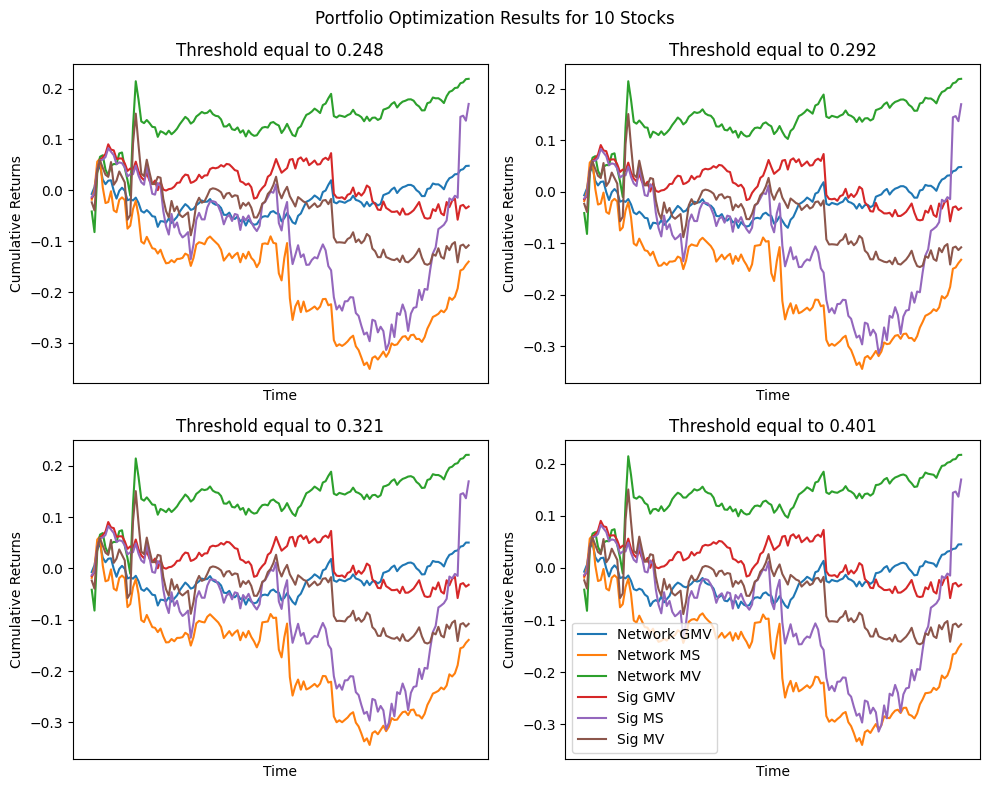

In [ ]:
# Plot Degree --------------------------
fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0,0].plot(df_NGMV_dict_out[1.96]['first_10'].cumsum(), label="Network GMV")
axs[0,0].plot(df_NMS_dict_out[1.96]['first_10'].cumsum(), label="Network MS")
axs[0,0].plot(df_NMV_dict_out[1.96]['first_10'].cumsum(), label="Network MV")
axs[0,0].plot(Sig_df_NGMV_dict_out[1.96]['first_10'].cumsum(), label="Sig GMV")
axs[0,0].plot(Sig_df_NMS_dict_out[1.96]['first_10'].cumsum(), label="Sig MS")
axs[0,0].plot(Sig_df_NMV_dict_out[1.96]['first_10'].cumsum(), label="Sig MV")
axs[0,0].set_xticks([])
axs[0,0].set_title(f"Threshold equal to {np.round(t_list[0],3)}")
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time")
#axs[0,0].grid()

axs[0,1].plot(df_NGMV_dict_out[2.326]['first_10'].cumsum(), label="Network GMV")
axs[0,1].plot(df_NMS_dict_out[2.326]['first_10'].cumsum(), label="Network MS")
axs[0,1].plot(df_NMV_dict_out[2.326]['first_10'].cumsum(), label="Network MV")
axs[0,1].plot(Sig_df_NGMV_dict_out[2.326]['first_10'].cumsum(), label="Sig GMV")
axs[0,1].plot(Sig_df_NMS_dict_out[2.326]['first_10'].cumsum(), label="Sig MS")
axs[0,1].plot(Sig_df_NMV_dict_out[2.326]['first_10'].cumsum(), label="Sig MV")
axs[0,1].set_xticks([])
axs[0,1].set_title(f"Threshold equal to {np.round(t_list[1],3)}")
axs[0,1].set_ylabel("Cumulative Returns")
axs[0,1].set_xlabel("Time")
#axs[0,1].grid()

axs[1,0].plot(df_NGMV_dict_out[2.575]['first_10'].cumsum(), label="Network GMV")
axs[1,0].plot(df_NMS_dict_out[2.575]['first_10'].cumsum(), label="Network MS")
axs[1,0].plot(df_NMV_dict_out[2.575]['first_10'].cumsum(), label="Network MV")
axs[1,0].plot(Sig_df_NGMV_dict_out[2.575]['first_10'].cumsum(), label="Sig GMV")
axs[1,0].plot(Sig_df_NMS_dict_out[2.575]['first_10'].cumsum(), label="Sig MS")
axs[1,0].plot(Sig_df_NMV_dict_out[2.575]['first_10'].cumsum(), label="Sig MV")
axs[1,0].set_xticks([])
axs[1,0].set_title(f"Threshold equal to {np.round(t_list[2],3)}")
axs[1,0].set_ylabel("Cumulative Returns")
axs[1,0].set_xlabel("Time")
#axs[1,0].grid()

axs[1,1].plot(df_NGMV_dict_out[3.291]['first_10'].cumsum(), label="Network GMV")
axs[1,1].plot(df_NMS_dict_out[3.291]['first_10'].cumsum(), label="Network MS")
axs[1,1].plot(df_NMV_dict_out[3.291]['first_10'].cumsum(), label="Network MV")
axs[1,1].plot(Sig_df_NGMV_dict_out[3.291]['first_10'].cumsum(), label="Sig GMV")
axs[1,1].plot(Sig_df_NMS_dict_out[3.291]['first_10'].cumsum(), label="Sig MS")
axs[1,1].plot(Sig_df_NMV_dict_out[3.291]['first_10'].cumsum(), label="Sig MV")
axs[1,1].set_xticks([])
axs[1,1].set_title(f"Threshold equal to {np.round(t_list[3],3)}")
axs[1,1].set_ylabel("Cumulative Returns")
axs[1,1].set_xlabel("Time")
#axs[1,1].grid()

# Adjust layout
fig.suptitle("Portfolio Optimization Results for 10 Stocks")
plt.tight_layout()
#plt.grid()
plt.legend()
plt.savefig("sigNet_ptf_10_out_ss.eps", format="eps", dpi=1000)
plt.show()

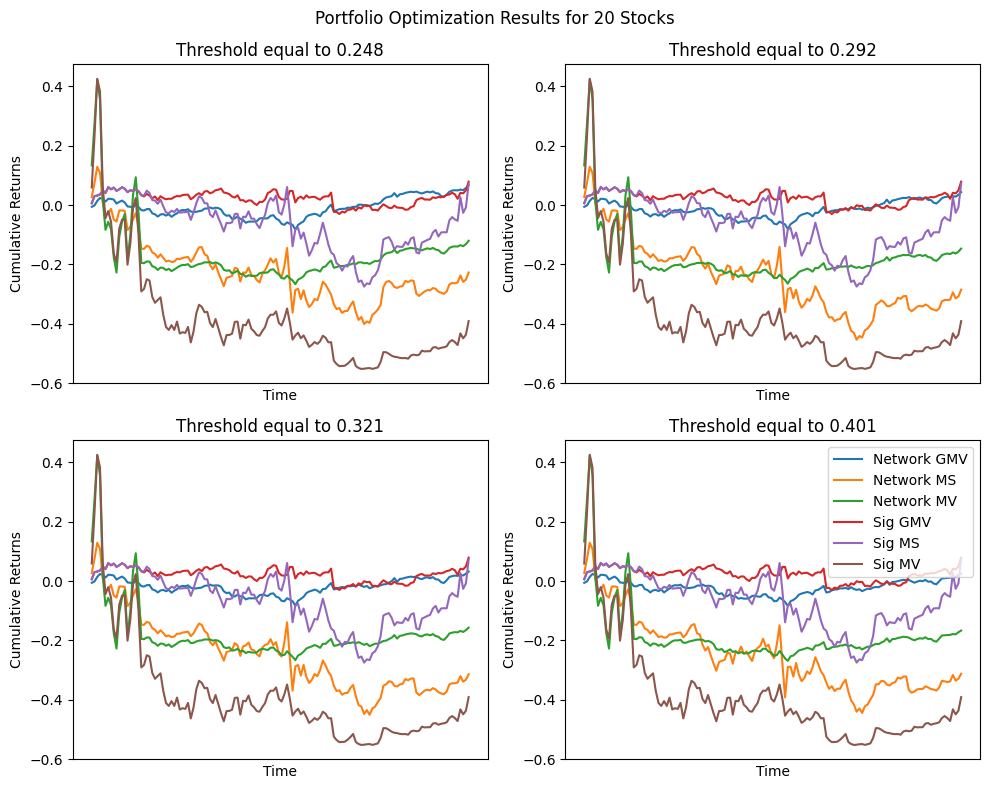

In [ ]:
# Plot Degree --------------------------
fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0,0].plot(df_NGMV_dict_out[1.96]['first_20'].cumsum(), label="Network GMV")
axs[0,0].plot(df_NMS_dict_out[1.96]['first_20'].cumsum(), label="Network MS")
axs[0,0].plot(df_NMV_dict_out[1.96]['first_20'].cumsum(), label="Network MV")
axs[0,0].plot(Sig_df_NGMV_dict_out[1.96]['first_20'].cumsum(), label="Sig GMV")
axs[0,0].plot(Sig_df_NMS_dict_out[1.96]['first_20'].cumsum(), label="Sig MS")
axs[0,0].plot(Sig_df_NMV_dict_out[1.96]['first_20'].cumsum(), label="Sig MV")
axs[0,0].set_xticks([])
axs[0,0].set_title(f"Threshold equal to {np.round(t_list[0],3)}")
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time")
#axs[0,0].grid()

axs[0,1].plot(df_NGMV_dict_out[2.326]['first_20'].cumsum(), label="Network GMV")
axs[0,1].plot(df_NMS_dict_out[2.326]['first_20'].cumsum(), label="Network MS")
axs[0,1].plot(df_NMV_dict_out[2.326]['first_20'].cumsum(), label="Network MV")
axs[0,1].plot(Sig_df_NGMV_dict_out[2.326]['first_20'].cumsum(), label="Sig GMV")
axs[0,1].plot(Sig_df_NMS_dict_out[2.326]['first_20'].cumsum(), label="Sig MS")
axs[0,1].plot(Sig_df_NMV_dict_out[2.326]['first_20'].cumsum(), label="Sig MV")
axs[0,1].set_xticks([])
axs[0,1].set_title(f"Threshold equal to {np.round(t_list[1],3)}")
axs[0,1].set_ylabel("Cumulative Returns")
axs[0,1].set_xlabel("Time")
#axs[0,1].grid()

axs[1,0].plot(df_NGMV_dict_out[2.575]['first_20'].cumsum(), label="Network GMV")
axs[1,0].plot(df_NMS_dict_out[2.575]['first_20'].cumsum(), label="Network MS")
axs[1,0].plot(df_NMV_dict_out[2.575]['first_20'].cumsum(), label="Network MV")
axs[1,0].plot(Sig_df_NGMV_dict_out[2.575]['first_20'].cumsum(), label="Sig GMV")
axs[1,0].plot(Sig_df_NMS_dict_out[2.575]['first_20'].cumsum(), label="Sig MS")
axs[1,0].plot(Sig_df_NMV_dict_out[2.575]['first_20'].cumsum(), label="Sig MV")
axs[1,0].set_xticks([])
axs[1,0].set_title(f"Threshold equal to {np.round(t_list[2],3)}")
axs[1,0].set_ylabel("Cumulative Returns")
axs[1,0].set_xlabel("Time")
#axs[1,0].grid()

axs[1,1].plot(df_NGMV_dict_out[3.291]['first_20'].cumsum(), label="Network GMV")
axs[1,1].plot(df_NMS_dict_out[3.291]['first_20'].cumsum(), label="Network MS")
axs[1,1].plot(df_NMV_dict_out[3.291]['first_20'].cumsum(), label="Network MV")
axs[1,1].plot(Sig_df_NGMV_dict_out[3.291]['first_20'].cumsum(), label="Sig GMV")
axs[1,1].plot(Sig_df_NMS_dict_out[3.291]['first_20'].cumsum(), label="Sig MS")
axs[1,1].plot(Sig_df_NMV_dict_out[3.291]['first_20'].cumsum(), label="Sig MV")
axs[1,1].set_xticks([])
axs[1,1].set_title(f"Threshold equal to {np.round(t_list[3],3)}")
axs[1,1].set_ylabel("Cumulative Returns")
axs[1,1].set_xlabel("Time")
#axs[1,1].grid()

# Adjust layout
fig.suptitle("Portfolio Optimization Results for 20 Stocks")
plt.tight_layout()
#plt.grid()
plt.legend()
plt.savefig("sigNet_ptf_20_out_ss.eps", format="eps", dpi=1000)
plt.show()

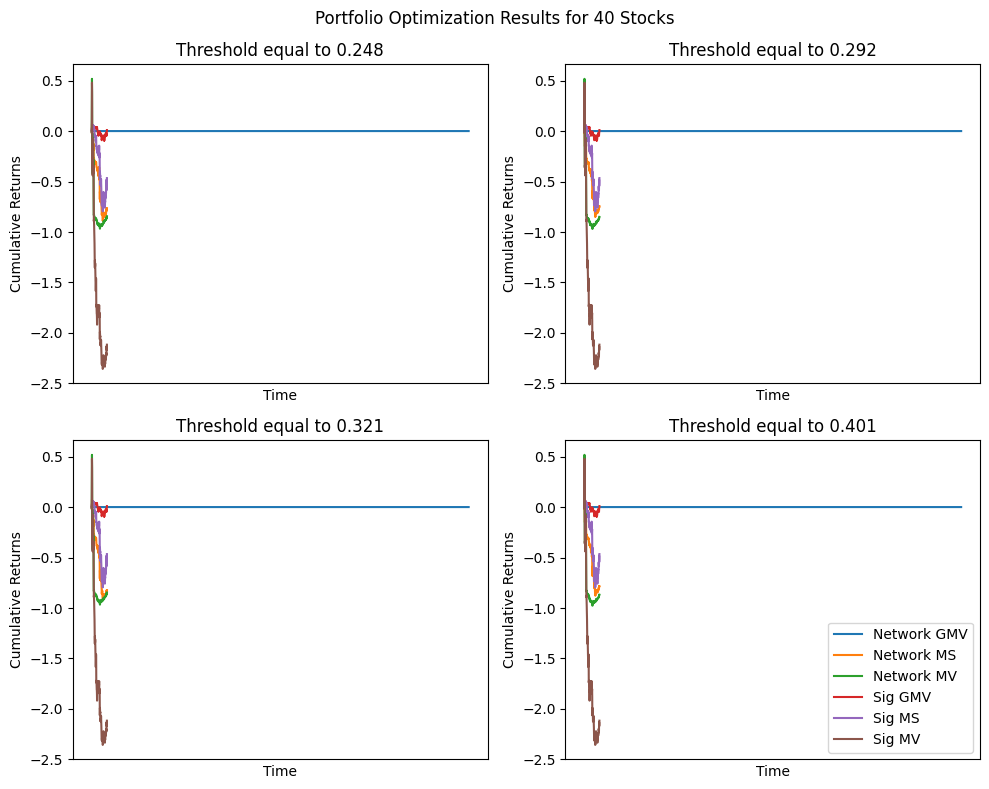

In [ ]:
# Plot Degree --------------------------
fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0,0].plot(df_NGMV_dict_out[1.96]['first_40'].cumsum(), label="Network GMV")
axs[0,0].plot(df_NMS_dict_out[1.96]['first_40'].cumsum(), label="Network MS")
axs[0,0].plot(df_NMV_dict_out[1.96]['first_40'].cumsum(), label="Network MV")
axs[0,0].plot(Sig_df_NGMV_dict_out[1.96]['first_40'].cumsum(), label="Sig GMV")
axs[0,0].plot(Sig_df_NMS_dict_out[1.96]['first_40'].cumsum(), label="Sig MS")
axs[0,0].plot(Sig_df_NMV_dict_out[1.96]['first_40'].cumsum(), label="Sig MV")
axs[0,0].set_xticks([])
axs[0,0].set_title(f"Threshold equal to {np.round(t_list[0],3)}")
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time")
#axs[0,0].grid()

axs[0,1].plot(df_NGMV_dict_out[2.326]['first_40'].cumsum(), label="Network GMV")
axs[0,1].plot(df_NMS_dict_out[2.326]['first_40'].cumsum(), label="Network MS")
axs[0,1].plot(df_NMV_dict_out[2.326]['first_40'].cumsum(), label="Network MV")
axs[0,1].plot(Sig_df_NGMV_dict_out[2.326]['first_40'].cumsum(), label="Sig GMV")
axs[0,1].plot(Sig_df_NMS_dict_out[2.326]['first_40'].cumsum(), label="Sig MS")
axs[0,1].plot(Sig_df_NMV_dict_out[2.326]['first_40'].cumsum(), label="Sig MV")
axs[0,1].set_xticks([])
axs[0,1].set_title(f"Threshold equal to {np.round(t_list[1],3)}")
axs[0,1].set_ylabel("Cumulative Returns")
axs[0,1].set_xlabel("Time")
#axs[0,1].grid()

axs[1,0].plot(df_NGMV_dict_out[2.575]['first_40'].cumsum(), label="Network GMV")
axs[1,0].plot(df_NMS_dict_out[2.575]['first_40'].cumsum(), label="Network MS")
axs[1,0].plot(df_NMV_dict_out[2.575]['first_40'].cumsum(), label="Network MV")
axs[1,0].plot(Sig_df_NGMV_dict_out[2.575]['first_40'].cumsum(), label="Sig GMV")
axs[1,0].plot(Sig_df_NMS_dict_out[2.575]['first_40'].cumsum(), label="Sig MS")
axs[1,0].plot(Sig_df_NMV_dict_out[2.575]['first_40'].cumsum(), label="Sig MV")
axs[1,0].set_xticks([])
axs[1,0].set_title(f"Threshold equal to {np.round(t_list[2],3)}")
axs[1,0].set_ylabel("Cumulative Returns")
axs[1,0].set_xlabel("Time")
#axs[1,0].grid()

axs[1,1].plot(df_NGMV_dict_out[3.291]['first_40'].cumsum(), label="Network GMV")
axs[1,1].plot(df_NMS_dict_out[3.291]['first_40'].cumsum(), label="Network MS")
axs[1,1].plot(df_NMV_dict_out[3.291]['first_40'].cumsum(), label="Network MV")
axs[1,1].plot(Sig_df_NGMV_dict_out[3.291]['first_40'].cumsum(), label="Sig GMV")
axs[1,1].plot(Sig_df_NMS_dict_out[3.291]['first_40'].cumsum(), label="Sig MS")
axs[1,1].plot(Sig_df_NMV_dict_out[3.291]['first_40'].cumsum(), label="Sig MV")
axs[1,1].set_xticks([])
axs[1,1].set_title(f"Threshold equal to {np.round(t_list[3],3)}")
axs[1,1].set_ylabel("Cumulative Returns")
axs[1,1].set_xlabel("Time")
#axs[1,1].grid()

# Adjust layout
fig.suptitle("Portfolio Optimization Results for 40 Stocks")
plt.tight_layout()
#plt.grid()
plt.legend()
plt.savefig("sigNet_ptf_40_out_ss.eps", format="eps", dpi=1000)
plt.show()

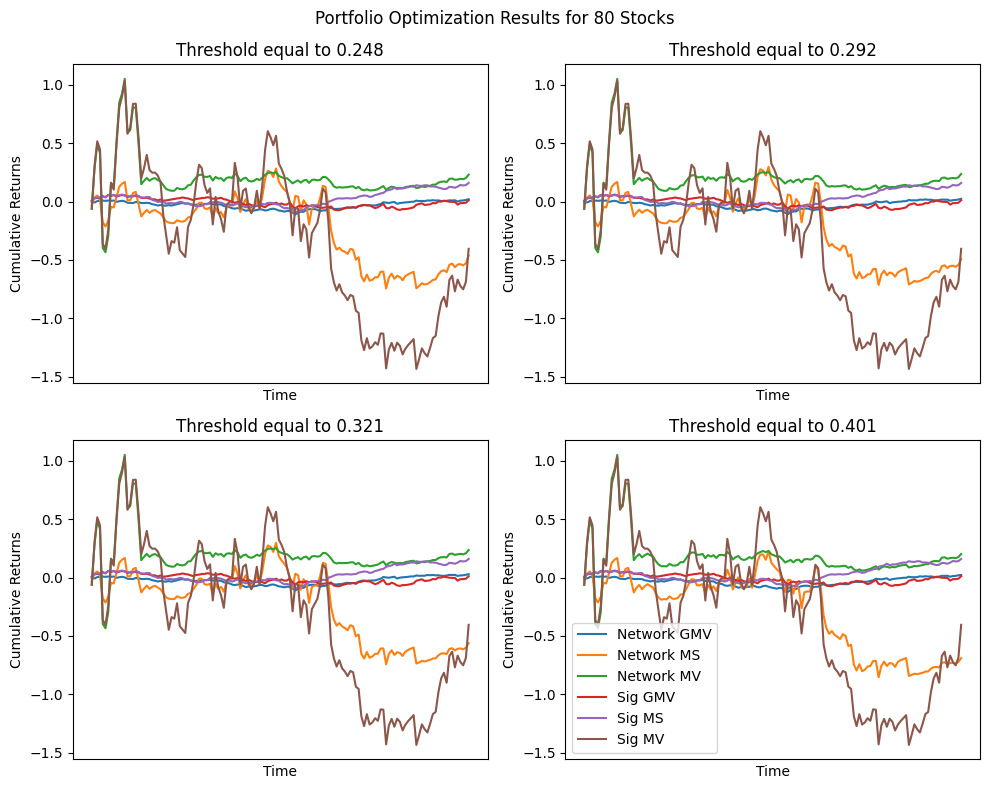

In [ ]:
# Plot Degree --------------------------
fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0,0].plot(df_NGMV_dict_out[1.96]['first_80'].cumsum(), label="Network GMV")
axs[0,0].plot(df_NMS_dict_out[1.96]['first_80'].cumsum(), label="Network MS")
axs[0,0].plot(df_NMV_dict_out[1.96]['first_80'].cumsum(), label="Network MV")
axs[0,0].plot(Sig_df_NGMV_dict_out[1.96]['first_80'].cumsum(), label="Sig GMV")
axs[0,0].plot(Sig_df_NMS_dict_out[1.96]['first_80'].cumsum(), label="Sig MS")
axs[0,0].plot(Sig_df_NMV_dict_out[1.96]['first_80'].cumsum(), label="Sig MV")
axs[0,0].set_xticks([])
axs[0,0].set_title(f"Threshold equal to {np.round(t_list[0],3)}")
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time")
#axs[0,0].grid()

axs[0,1].plot(df_NGMV_dict_out[2.326]['first_80'].cumsum(), label="Network GMV")
axs[0,1].plot(df_NMS_dict_out[2.326]['first_80'].cumsum(), label="Network MS")
axs[0,1].plot(df_NMV_dict_out[2.326]['first_80'].cumsum(), label="Network MV")
axs[0,1].plot(Sig_df_NGMV_dict_out[2.326]['first_80'].cumsum(), label="Sig GMV")
axs[0,1].plot(Sig_df_NMS_dict_out[2.326]['first_80'].cumsum(), label="Sig MS")
axs[0,1].plot(Sig_df_NMV_dict_out[2.326]['first_80'].cumsum(), label="Sig MV")
axs[0,1].set_xticks([])
axs[0,1].set_title(f"Threshold equal to {np.round(t_list[1],3)}")
axs[0,1].set_ylabel("Cumulative Returns")
axs[0,1].set_xlabel("Time")
#axs[0,1].grid()

axs[1,0].plot(df_NGMV_dict_out[2.575]['first_80'].cumsum(), label="Network GMV")
axs[1,0].plot(df_NMS_dict_out[2.575]['first_80'].cumsum(), label="Network MS")
axs[1,0].plot(df_NMV_dict_out[2.575]['first_80'].cumsum(), label="Network MV")
axs[1,0].plot(Sig_df_NGMV_dict_out[2.575]['first_80'].cumsum(), label="Sig GMV")
axs[1,0].plot(Sig_df_NMS_dict_out[2.575]['first_80'].cumsum(), label="Sig MS")
axs[1,0].plot(Sig_df_NMV_dict_out[2.575]['first_80'].cumsum(), label="Sig MV")
axs[1,0].set_xticks([])
axs[1,0].set_title(f"Threshold equal to {np.round(t_list[2],3)}")
axs[1,0].set_ylabel("Cumulative Returns")
axs[1,0].set_xlabel("Time")
#axs[1,0].grid()

axs[1,1].plot(df_NGMV_dict_out[3.291]['first_80'].cumsum(), label="Network GMV")
axs[1,1].plot(df_NMS_dict_out[3.291]['first_80'].cumsum(), label="Network MS")
axs[1,1].plot(df_NMV_dict_out[3.291]['first_80'].cumsum(), label="Network MV")
axs[1,1].plot(Sig_df_NGMV_dict_out[3.291]['first_80'].cumsum(), label="Sig GMV")
axs[1,1].plot(Sig_df_NMS_dict_out[3.291]['first_80'].cumsum(), label="Sig MS")
axs[1,1].plot(Sig_df_NMV_dict_out[3.291]['first_80'].cumsum(), label="Sig MV")
axs[1,1].set_xticks([])
axs[1,1].set_title(f"Threshold equal to {np.round(t_list[3],3)}")
axs[1,1].set_ylabel("Cumulative Returns")
axs[1,1].set_xlabel("Time")
#axs[1,1].grid()

# Adjust layout
fig.suptitle("Portfolio Optimization Results for 80 Stocks")
plt.tight_layout()
#plt.grid()
plt.legend()
plt.savefig("sigNet_ptf_80_out_ss.eps", format="eps", dpi=1000)
plt.show()

### Long-only

#### With Rebalancing

In [ ]:
number_asset = list(df_EW_out.columns)
dfs = [df_GMV_out, df_MV_out, df_MS_out, df_EW_out, df_NGMV_dict_out, df_NMS_dict_out, df_NMV_dict_out, Sig_df_NGMV_dict_out, Sig_df_NMS_dict_out, Sig_df_NMV_dict_out ]
df_statistics_out = compute_main_statistics(dfs, number_asset, tau_list)#, benchmark_ret=ret_sp_test["^GSPC"])
df_statistics_out

Strategy  Theta Number Asset  Mean Return  Std Return  Excess kurtosis  \
0        GMV  0.000     first_10     6.340699   15.801073         5.700912   
1        GMV  0.000     first_20     5.203976   11.783432         1.468221   
2        GMV  0.000     first_40     3.689060   10.538641        -1.744809   
3        GMV  0.000     first_80    -7.811944   11.013289        -0.714127   
4         MV  0.000     first_10     2.259674   25.873980         7.036236   
..       ...    ...          ...          ...         ...              ...   
107  Sig_NMV  2.575     first_80    -8.229019   22.167412         8.514720   
108  Sig_NMV  3.291     first_10    -6.621087   19.665757        12.309178   
109  Sig_NMV  3.291     first_20    -6.060882   19.251722        13.619406   
110  Sig_NMV  3.291     first_40    -9.593410   21.562985         8.062538   
111  Sig_NMV  3.291     first_80    -8.229019   22.167412         8.514720   

     Skewness  Cumulative Return  Sharpe Ratio  Max Drowdown  CVaR 95%  
0   -2.080090           3.367057      0.401283     -8.617926 -3.089260  
1   -1.372463           2.778401      0.441635     -6.726982 -2.011471  
2   -0.432074           1.983971      0.350051    -11.152278 -1.674671  
3   -0.744598          -4.453593     -0.709320    -14.252809 -1.907740  
4   -2.073769           1.223721      0.087334    -16.800478 -4.831315  
..        ...                ...           ...           ...       ...  
107 -1.893990          -4.701825     -0.371221    -19.405049 -4.417788  
108 -2.367414          -3.750935     -0.336681    -16.470262 -3.579325  
109 -2.573721          -3.423470     -0.314823    -15.778343 -3.598584  
110 -2.281007          -5.521798     -0.444902    -19.551332 -4.276762  
111 -1.893990          -4.701825     -0.371221    -19.405049 -4.417788  

[112 rows x 11 columns]

In [ ]:
df_statistics_out[df_statistics_out['Number Asset']=='first_10']

Strategy  Theta Number Asset  Mean Return  Std Return  Excess kurtosis  \
0         GMV  0.000     first_10     6.340699   15.801073         5.700912   
4          MV  0.000     first_10     2.259674   25.873980         7.036236   
8          MS  0.000     first_10    -6.226041   21.312559        14.721743   
12         EW  0.000     first_10    27.139978   19.085921        -2.854908   
16       NGMV  1.960     first_10    26.023585   15.493607         1.479142   
20       NGMV  2.326     first_10    26.142991   15.505788         1.284343   
24       NGMV  2.575     first_10    26.664510   15.538915         1.213785   
28       NGMV  3.291     first_10    25.669656   15.419013         0.678183   
32        NMS  1.960     first_10    13.030203   20.100039         7.562071   
36        NMS  2.326     first_10    13.219150   20.096163         7.532282   
40        NMS  2.575     first_10    14.004471   20.153153         7.410890   
44        NMS  3.291     first_10    14.063746   20.210671         6.844517   
48        NMV  1.960     first_10     3.978613   16.125322         1.126761   
52        NMV  2.326     first_10     4.023114   16.125527         0.971941   
56        NMV  2.575     first_10     4.436150   16.156679         0.926196   
60        NMV  3.291     first_10     3.670010   15.997042         0.553407   
64   Sig_NMGV  1.960     first_10    12.509565   19.324309        14.005604   
68   Sig_NMGV  2.326     first_10    12.509565   19.324309        14.005604   
72   Sig_NMGV  2.575     first_10    12.509565   19.324309        14.005604   
76   Sig_NMGV  3.291     first_10    12.509565   19.324309        14.005604   
80    Sig_NMS  1.960     first_10     0.659706   26.094000        10.701814   
84    Sig_NMS  2.326     first_10     0.659706   26.094000        10.701814   
88    Sig_NMS  2.575     first_10     0.659706   26.094000        10.701814   
92    Sig_NMS  3.291     first_10     0.659706   26.094000        10.701814   
96    Sig_NMV  1.960     first_10    -6.621087   19.665757        12.309178   
100   Sig_NMV  2.326     first_10    -6.621087   19.665757        12.309178   
104   Sig_NMV  2.575     first_10    -6.621087   19.665757        12.309178   
108   Sig_NMV  3.291     first_10    -6.621087   19.665757        12.309178   

     Skewness  Cumulative Return  Sharpe Ratio  Max Drowdown  CVaR 95%  
0   -2.080090           3.367057      0.401283     -8.617926 -3.089260  
4   -2.073769           1.223721      0.087334    -16.800478 -4.831315  
8   -3.200325                NaN     -0.292130    -15.981897       NaN  
12  -0.309462          13.155612      1.421989    -13.510939 -2.617910  
16  -0.099840                NaN      1.679634     -8.532602       NaN  
20  -0.075722                NaN      1.686015     -8.547338       NaN  
24  -0.077012                NaN      1.715983     -8.593984       NaN  
28   0.068648                NaN      1.664805     -9.047892       NaN  
32  -1.774874           6.709136      0.648268    -14.701293 -3.438326  
36  -1.769360           6.800647      0.657795    -14.619485 -3.434004  
40  -1.756688           7.179372      0.694902    -14.677410 -3.434370  
44  -1.671931           7.207852      0.695857    -15.172906 -3.427317  
48  -0.750028           2.136704      0.246731    -13.430708 -2.853345  
52  -0.726162           2.160140      0.249487    -13.606991 -2.847302  
56  -0.724378           2.377183      0.274571    -13.628321 -2.847531  
60  -0.621805           1.973907      0.229418    -14.135406 -2.753878  
64  -2.202245           6.456189      0.647349    -11.817068 -2.977197  
68  -2.202245           6.456189      0.647349    -11.817068 -2.977197  
72  -2.202245           6.456189      0.647349    -11.817068 -2.977197  
76  -2.202245           6.456189      0.647349    -11.817068 -2.977197  
80  -2.542632           0.360086      0.025282    -19.045898 -4.843606  
84  -2.542632           0.360086      0.025282    -19.045898 -4.843606  
88  -2.542632           0.360086  

In [ ]:
df_statistics_out[df_statistics_out['Number Asset']=='first_20']

Strategy  Theta Number Asset  Mean Return  Std Return  Excess kurtosis  \
1         GMV  0.000     first_20     5.203976   11.783432         1.468221   
5          MV  0.000     first_20     2.207360   35.740917         6.121704   
9          MS  0.000     first_20    -4.301668   18.681399        13.978252   
13         EW  0.000     first_20    21.774218   13.864782        -3.168469   
17       NGMV  1.960     first_20    25.111773   11.338707        -2.009262   
21       NGMV  2.326     first_20    18.986077   11.163680        -2.217426   
25       NGMV  2.575     first_20    15.951973   11.158031        -1.953470   
29       NGMV  3.291     first_20    13.663672   11.114089        -1.890828   
33        NMS  1.960     first_20     5.603507   17.206017         9.797998   
37        NMS  2.326     first_20     4.274752   16.962050        10.439065   
41        NMS  2.575     first_20     3.815365   16.883001        11.279551   
45        NMS  3.291     first_20     2.324440   16.461825         9.533630   
49        NMV  1.960     first_20     2.894416   14.437100         0.007566   
53        NMV  2.326     first_20    -1.989063   14.265569         0.058428   
57        NMV  2.575     first_20    -4.778617   14.217939         0.221980   
61        NMV  3.291     first_20    -5.940886   14.279725         0.234381   
65   Sig_NMGV  1.960     first_20    10.034353   17.426170        22.077099   
69   Sig_NMGV  2.326     first_20    10.034353   17.426170        22.077099   
73   Sig_NMGV  2.575     first_20    10.034353   17.426170        22.077099   
77   Sig_NMGV  3.291     first_20    10.034353   17.426170        22.077099   
81    Sig_NMS  1.960     first_20     3.427067   28.099442         7.530278   
85    Sig_NMS  2.326     first_20     3.427067   28.099442         7.530278   
89    Sig_NMS  2.575     first_20     3.427067   28.099442         7.530278   
93    Sig_NMS  3.291     first_20     3.427067   28.099442         7.530278   
97    Sig_NMV  1.960     first_20    -6.060882   19.251722        13.619406   
101   Sig_NMV  2.326     first_20    -6.060882   19.251722        13.619406   
105   Sig_NMV  2.575     first_20    -6.060882   19.251722        13.619406   
109   Sig_NMV  3.291     first_20    -6.060882   19.251722        13.619406   

     Skewness  Cumulative Return  Sharpe Ratio  Max Drowdown  CVaR 95%  
1   -1.372463           2.778401      0.441635     -6.726982 -2.011471  
5   -1.916034           1.195696      0.061760    -16.800478 -6.800549  
9   -2.967181                NaN     -0.230265    -12.803958       NaN  
13  -0.324242          10.792229      1.570470    -11.212924 -1.866933  
17  -0.190795                NaN      2.214695     -8.931624       NaN  
21  -0.112216                NaN      1.700701     -9.021781       NaN  
25  -0.144975                NaN      1.429641     -9.167257       NaN  
29  -0.153111                NaN      1.229401     -9.147665       NaN  
33  -2.269087           2.986019      0.325671    -14.143782 -2.974511  
37  -2.304363           2.292473      0.252019    -13.939353 -2.921765  
41  -2.389196           2.050646      0.225989    -14.050399 -2.921908  
45  -2.219935           1.258396      0.141202    -13.823637 -2.871682  
49  -0.504386           1.562620      0.200485    -16.595738 -2.482627  
53  -0.459246          -1.100184     -0.139431    -16.621342 -2.441579  
57  -0.463343          -2.681192     -0.336098    -16.832735 -2.485824  
61  -0.493999          -3.353580     -0.416036    -16.945397 -2.524105  
65  -3.378941           5.237460      0.575821    -10.229188 -2.920826  
69  -3.378941           5.237460      0.575821    -10.229188 -2.920826  
73  -3.378941           5.237460      0.575821    -10.229188 -2.920826  
77  -3.378941           5.237460      0.575821    -10.229188 -2.920826  
81  -2.028623           1.845409      0.121962    -21.130842 -5.418485  
85  -2.028623           1.845409      0.121962    -21.130842 -5.418485  
89  -2.028623           1.845409  

In [ ]:
df_statistics_out[df_statistics_out['Number Asset']=='first_40']

Strategy  Theta Number Asset  Mean Return  Std Return  Excess kurtosis  \
2         GMV  0.000     first_40     3.689060   10.538641        -1.744809   
6          MV  0.000     first_40   -26.807103   32.075732        10.762174   
10         MS  0.000     first_40     3.192609    7.271067        -1.181795   
14         EW  0.000     first_40    22.389317   11.246529        -2.997982   
18       NGMV  1.960     first_40     0.000000    0.000000        -3.000000   
22       NGMV  2.326     first_40     0.000000    0.000000        -3.000000   
26       NGMV  2.575     first_40     0.000000    0.000000        -3.000000   
30       NGMV  3.291     first_40     0.000000    0.000000        -3.000000   
34        NMS  1.960     first_40    11.531163   11.898793        -1.623163   
38        NMS  2.326     first_40    10.658645   11.501218        -1.659143   
42        NMS  2.575     first_40    11.687572   11.471756        -1.569569   
46        NMS  3.291     first_40     8.380500   11.459098        -1.714497   
50        NMV  1.960     first_40    -7.672578   15.277184         3.938574   
54        NMV  2.326     first_40    -8.634992   15.234823         3.999853   
58        NMV  2.575     first_40    -7.669581   15.136417         4.244620   
62        NMV  3.291     first_40   -10.446905   15.259175         3.905574   
66   Sig_NMGV  1.960     first_40    -8.802366   19.372486        14.199369   
70   Sig_NMGV  2.326     first_40    -8.802366   19.372486        14.199369   
74   Sig_NMGV  2.575     first_40    -8.802366   19.372486        14.199369   
78   Sig_NMGV  3.291     first_40    -8.802366   19.372486        14.199369   
82    Sig_NMS  1.960     first_40    28.176145   23.826836        19.893476   
86    Sig_NMS  2.326     first_40    28.176145   23.826836        19.893476   
90    Sig_NMS  2.575     first_40    28.176145   23.826836        19.893476   
94    Sig_NMS  3.291     first_40    28.176145   23.826836        19.893476   
98    Sig_NMV  1.960     first_40    -9.593410   21.562985         8.062538   
102   Sig_NMV  2.326     first_40    -9.593410   21.562985         8.062538   
106   Sig_NMV  2.575     first_40    -9.593410   21.562985         8.062538   
110   Sig_NMV  3.291     first_40    -9.593410   21.562985         8.062538   

     Skewness  Cumulative Return  Sharpe Ratio  Max Drowdown  CVaR 95%  
2   -0.432074           1.983971      0.350051    -11.152278 -1.674671  
6   -2.745008         -17.079069     -0.835744    -22.748866 -6.543643  
10  -0.337155                NaN      0.439084     -6.719765       NaN  
14  -0.232951          11.068362      1.990776    -10.088868 -1.513501  
18   0.000000           0.000000           NaN      0.000000  0.000000  
22   0.000000           0.000000           NaN      0.000000  0.000000  
26   0.000000           0.000000           NaN      0.000000  0.000000  
30   0.000000           0.000000           NaN      0.000000  0.000000  
34  -0.117848           5.977672      0.969104    -11.773772 -1.688988  
38  -0.128045           5.547401      0.926741    -11.255257 -1.643723  
42  -0.099608           6.054448      1.018813    -11.141619 -1.634779  
46  -0.071634           4.407832      0.731340    -11.855338 -1.664792  
50  -1.613443          -4.370895     -0.502225    -18.616681 -3.043584  
54  -1.617385          -4.944532     -0.566793    -18.219867 -3.050242  
58  -1.630185          -4.369118     -0.506697    -18.011370 -3.003800  
62  -1.595925          -6.041024     -0.684631    -18.849579 -3.039269  
66  -2.961553          -5.044907     -0.454375    -18.863344 -3.837366  
70  -2.961553          -5.044907     -0.454375    -18.863344 -3.837366  
74  -2.961553          -5.044907     -0.454375    -18.863344 -3.837366  
78  -2.961553          -5.044907     -0.454375    -18.863344 -3.837366  
82  -0.583587          13.600534      1.182538    -15.179185 -3.288508  
86  -0.583587          13.600534      1.182538    -15.179185 -3.288508  
90  -0.583587          13.600534  

In [ ]:
df_statistics_out[df_statistics_out['Number Asset']=='first_80']

Strategy  Theta Number Asset  Mean Return  Std Return  Excess kurtosis  \
3         GMV  0.000     first_80    -7.811944   11.013289        -0.714127   
7          MV  0.000     first_80    -1.245971   27.351556        -1.555560   
11         MS  0.000     first_80     0.000000    0.000000        -3.000000   
15         EW  0.000     first_80     9.868852   11.116728        -2.930937   
19       NGMV  1.960     first_80    13.905695   10.915019        -2.271368   
23       NGMV  2.326     first_80    12.686454   10.858167        -2.198599   
27       NGMV  2.575     first_80    13.504457   10.847608        -2.220472   
31       NGMV  3.291     first_80    12.607815   11.026479        -2.367252   
35        NMS  1.960     first_80    17.067705   12.122275        -2.533193   
39        NMS  2.326     first_80    16.450647   12.015562        -2.470641   
43        NMS  2.575     first_80    16.832085   11.831236        -2.494467   
47        NMS  3.291     first_80    16.539548   11.827428        -2.356437   
51        NMV  1.960     first_80    -4.715139   16.672631         3.334614   
55        NMV  2.326     first_80    -4.698802   16.657491         3.364420   
59        NMV  2.575     first_80    -4.737751   16.570248         3.494519   
63        NMV  3.291     first_80    -4.680460   16.576213         3.499385   
67   Sig_NMGV  1.960     first_80   -16.191823   21.786065        17.023029   
71   Sig_NMGV  2.326     first_80   -16.191823   21.786065        17.023029   
75   Sig_NMGV  2.575     first_80   -16.191823   21.786065        17.023029   
79   Sig_NMGV  3.291     first_80   -16.191823   21.786065        17.023029   
83    Sig_NMS  1.960     first_80    36.113224   14.940953        -1.518790   
87    Sig_NMS  2.326     first_80    36.113224   14.940953        -1.518790   
91    Sig_NMS  2.575     first_80    36.113224   14.940953        -1.518790   
95    Sig_NMS  3.291     first_80    36.113224   14.940953        -1.518790   
99    Sig_NMV  1.960     first_80    -8.229019   22.167412         8.514720   
103   Sig_NMV  2.326     first_80    -8.229019   22.167412         8.514720   
107   Sig_NMV  2.575     first_80    -8.229019   22.167412         8.514720   
111   Sig_NMV  3.291     first_80    -8.229019   22.167412         8.514720   

     Skewness  Cumulative Return  Sharpe Ratio  Max Drowdown  CVaR 95%  
3   -0.744598          -4.453593     -0.709320    -14.252809 -1.907740  
7   -0.300661          -0.686587     -0.045554    -16.319083 -4.425541  
11   0.000000           0.000000           NaN      0.000000  0.000000  
15   0.002235           5.155001      0.887748    -12.011569 -1.416215  
19   0.140441                NaN      1.273996    -11.650638       NaN  
23   0.142606                NaN      1.168379    -11.633683       NaN  
27   0.128956                NaN      1.244925    -11.573907       NaN  
31   0.124360                NaN      1.143413    -12.566928       NaN  
35  -0.002030           8.632203      1.407962     -9.882423 -1.616691  
39  -0.022913           8.342614      1.369112     -9.814186 -1.610285  
43   0.015513           8.521805      1.422682     -9.398832 -1.543664  
47   0.020747           8.384430      1.398406     -9.643524 -1.558921  
51  -1.627507          -2.644705     -0.282807    -17.347378 -3.325565  
55  -1.635173          -2.635319     -0.282083    -17.140857 -3.312174  
59  -1.642046          -2.657700     -0.285919    -16.958683 -3.254261  
63  -1.651501          -2.624782     -0.282360    -17.116168 -3.271817  
67  -3.452116          -9.669732     -0.743219    -21.385016 -4.356122  
71  -3.452116          -9.669732     -0.743219    -21.385016 -4.356122  
75  -3.452116          -9.669732     -0.743219    -21.385016 -4.356122  
79  -3.452116          -9.669732     -0.743219    -21.385016 -4.356122  
83  -0.486599          16.894353      2.417063    -14.403346 -2.182750  
87  -0.486599          16.894353      2.417063    -14.403346 -2.182750  
91  -0.486599          16.894353  

### Short-Sell

#### With rebalancing

In [ ]:
number_asset = list(df_EW_out.columns)
dfs = [df_GMV_out, df_MV_out, df_MS_out, df_EW_out, df_NGMV_dict_out, df_NMS_dict_out, df_NMV_dict_out, Sig_df_NGMV_dict_out, Sig_df_NMS_dict_out, Sig_df_NMV_dict_out ]
df_statistics_out = compute_main_statistics(dfs, number_asset, tau_list)#, benchmark_ret=ret_sp_test["^GSPC"])
df_statistics_out

Strategy  Theta Number Asset  Mean Return  Std Return  Excess kurtosis  \
0        GMV  0.000     first_10    11.048972   15.296603         2.714231   
1        GMV  0.000     first_20    -9.915404   18.417415         4.176793   
2        GMV  0.000     first_40    -0.175763   16.081882        -0.330236   
3        GMV  0.000     first_80     7.531051   23.687459         1.707817   
4         MV  0.000     first_10   -15.675631   74.105594        -1.019570   
..       ...    ...          ...          ...         ...              ...   
107  Sig_NMV  2.575     first_80   -52.306949  277.209766        -0.227941   
108  Sig_NMV  3.291     first_10   -17.923265   37.595459         7.537231   
109  Sig_NMV  3.291     first_20   -51.058952   82.590571        10.073107   
110  Sig_NMV  3.291     first_40   -97.964521  141.349886        12.133393   
111  Sig_NMV  3.291     first_80   -52.306949  277.209766        -0.227941   

     Skewness  Cumulative Return  Sharpe Ratio  Max Drowdown   CVaR 95%  
0   -1.460397           5.740302      0.722315     -8.709565  -2.824567  
1   -1.671432          -5.717108     -0.538371    -18.710372  -3.723217  
2   -0.349133          -0.096335     -0.010929    -13.868987  -2.623420  
3    0.399657           3.976805      0.317934    -13.830683  -3.648952  
4    0.179054          -9.333708     -0.211531    -58.151039 -10.976356  
..        ...                ...           ...           ...        ...  
107 -0.732413         -40.485361     -0.188691    -98.846467 -43.670237  
108  1.231816         -10.812092     -0.476740    -26.922158  -5.938797  
109 -1.545648         -39.074897     -0.618218    -68.128040 -16.672051  
110 -1.992588        -211.627426     -0.693064    -96.900103 -29.875080  
111 -0.732413         -40.485361     -0.188691    -98.846467 -43.670237  

[112 rows x 11 columns]

In [ ]:
df_statistics_out[df_statistics_out['Number Asset']=='first_10']

Strategy  Theta Number Asset  Mean Return  Std Return  Excess kurtosis  \
0         GMV  0.000     first_10    11.048972   15.296603         2.714231   
4          MV  0.000     first_10   -15.675631   74.105594        -1.019570   
8          MS  0.000     first_10   -18.606437   30.970640         0.310420   
12         EW  0.000     first_10    27.139978   19.085921        -2.854908   
16       NGMV  1.960     first_10     9.189820   14.632327         0.711333   
20       NGMV  2.326     first_10     9.119340   14.656202         0.459359   
24       NGMV  2.575     first_10     9.625642   14.688370         0.391256   
28       NGMV  3.291     first_10     8.615635   14.581939        -0.323667   
32        NMS  1.960     first_10   -22.583649   32.739241         3.339281   
36        NMS  2.326     first_10   -21.466731   31.981349         3.185738   
40        NMS  2.575     first_10   -22.481968   31.973557         3.181573   
44        NMS  3.291     first_10   -23.430815   31.743525         3.275075   
48        NMV  1.960     first_10    49.126183   32.954341        17.407462   
52        NMV  2.326     first_10    49.106887   32.953004        17.400060   
56        NMV  2.575     first_10    49.761248   32.964892        17.353382   
60        NMV  3.291     first_10    48.583942   32.897093        17.528039   
64   Sig_NMGV  1.960     first_10    -5.664803   21.458989         5.777284   
68   Sig_NMGV  2.326     first_10    -5.664803   21.458989         5.777284   
72   Sig_NMGV  2.575     first_10    -5.664803   21.458989         5.777284   
76   Sig_NMGV  3.291     first_10    -5.664803   21.458989         5.777284   
80    Sig_NMS  1.960     first_10    36.298329   42.633899         5.403808   
84    Sig_NMS  2.326     first_10    36.298329   42.633899         5.403808   
88    Sig_NMS  2.575     first_10    36.298329   42.633899         5.403808   
92    Sig_NMS  3.291     first_10    36.298329   42.633899         5.403808   
96    Sig_NMV  1.960     first_10   -17.923265   37.595459         7.537231   
100   Sig_NMV  2.326     first_10   -17.923265   37.595459         7.537231   
104   Sig_NMV  2.575     first_10   -17.923265   37.595459         7.537231   
108   Sig_NMV  3.291     first_10   -17.923265   37.595459         7.537231   

     Skewness  Cumulative Return  Sharpe Ratio  Max Drowdown   CVaR 95%  
0   -1.460397           5.740302      0.722315     -8.709565  -2.824567  
4    0.179054          -9.333708     -0.211531    -58.151039 -10.976356  
8   -0.877432                NaN     -0.600777    -34.035197        NaN  
12  -0.309462          13.155612      1.421989    -13.510939  -2.617910  
16  -0.793448                NaN      0.628049    -11.421567        NaN  
20  -0.759792                NaN      0.622217    -11.436233        NaN  
24  -0.753885                NaN      0.655324    -11.468848        NaN  
28  -0.604509                NaN      0.590843    -11.963958        NaN  
32  -1.576309         -14.010407     -0.689804    -35.557018  -6.687445  
36  -1.587665         -13.226753     -0.671227    -35.025852  -6.629357  
40  -1.591869         -13.938601     -0.703143    -35.017553  -6.635116  
44  -1.595370         -14.612344     -0.738129    -34.700391  -6.576639  
48   3.381610          21.901457      1.490735    -10.528375  -3.918300  
52   3.385529          21.894360      1.490210    -10.879105  -3.903796  
56   3.379874          22.134541      1.509523    -10.886879  -3.902037  
60   3.419530          21.701658      1.476846    -11.393879  -3.851089  
64  -1.363527          -3.193116     -0.263983    -14.685808  -3.481724  
68  -1.363527          -3.193116     -0.263983    -14.685808  -3.481724  
72  -1.363527          -3.193116     -0.263983    -14.685808  -3.481724  
76  -1.363527          -3.193116     -0.263983    -14.685808  -3.481724  
80   1.128005          16.968866      0.851396    -34.542309  -5.878292  
84   1.128005          16.968866      0.851396    -34.542309  -5.878292  
88   1.1280

In [ ]:
df_statistics_out[df_statistics_out['Number Asset']=='first_20']

Strategy  Theta Number Asset  Mean Return  Std Return  Excess kurtosis  \
1         GMV  0.000     first_20    -9.915404   18.417415         4.176793   
5          MV  0.000     first_20   -81.224808  122.358113         3.306017   
9          MS  0.000     first_20   -33.804752   47.477274        -1.341401   
13         EW  0.000     first_20    21.774218   13.864782        -3.168469   
17       NGMV  1.960     first_20    13.017767   10.792204        -2.531416   
21       NGMV  2.326     first_20     8.285323   10.575431        -2.824524   
25       NGMV  2.575     first_20     6.013593   10.556262        -2.587613   
29       NGMV  3.291     first_20     4.615068   10.459583        -2.480142   
33        NMS  1.960     first_20   -33.961773   44.282331         0.661708   
37        NMS  2.326     first_20   -40.597612   43.986174         0.874053   
41        NMS  2.575     first_20   -43.647432   44.321900         1.387447   
45        NMS  3.291     first_20   -43.474627   46.444953         1.655363   
49        NMV  1.960     first_20   -19.732862   76.713525        17.244361   
53        NMV  2.326     first_20   -23.473556   76.668333        17.260160   
57        NMV  2.575     first_20   -24.912872   76.659509        17.255507   
61        NMV  3.291     first_20   -26.244221   76.664770        17.234639   
65   Sig_NMGV  1.960     first_20    15.484749   17.355995         6.878101   
69   Sig_NMGV  2.326     first_20    15.484749   17.355995         6.878101   
73   Sig_NMGV  2.575     first_20    15.484749   17.355995         6.878101   
77   Sig_NMGV  3.291     first_20    15.484749   17.355995         6.878101   
81    Sig_NMS  1.960     first_20    14.050771   43.468492        -0.467805   
85    Sig_NMS  2.326     first_20    14.050771   43.468492        -0.467805   
89    Sig_NMS  2.575     first_20    14.050771   43.468492        -0.467805   
93    Sig_NMS  3.291     first_20    14.050771   43.468492        -0.467805   
97    Sig_NMV  1.960     first_20   -51.058952   82.590571        10.073107   
101   Sig_NMV  2.326     first_20   -51.058952   82.590571        10.073107   
105   Sig_NMV  2.575     first_20   -51.058952   82.590571        10.073107   
109   Sig_NMV  3.291     first_20   -51.058952   82.590571        10.073107   

     Skewness  Cumulative Return  Sharpe Ratio  Max Drowdown   CVaR 95%  
1   -1.671432          -5.717108     -0.538371    -18.710372  -3.723217  
5   -1.091270         -91.293298     -0.663829    -88.200898 -21.879038  
9   -0.523410                NaN     -0.712020    -43.976856        NaN  
13  -0.324242          10.792229      1.570470    -11.212924  -1.866933  
17  -0.428612                NaN      1.206220    -10.263301        NaN  
21  -0.370576                NaN      0.783450    -10.093092        NaN  
25  -0.402764                NaN      0.569671    -10.263240        NaN  
29  -0.431796                NaN      0.441229    -10.359288        NaN  
33  -1.012720         -22.704011     -0.766937    -43.803622  -8.406132  
37  -1.046858         -28.492504     -0.922963    -46.683116  -8.399947  
41  -1.061348         -31.372558     -0.984782    -46.618557  -8.598614  
45  -0.911298         -31.205268     -0.936046    -46.576749  -8.789249  
49  -2.416588         -12.031960     -0.257228    -56.786118 -16.223567  
53  -2.409045         -14.642888     -0.306170    -56.706189 -16.223567  
57  -2.405210         -15.681521     -0.324981    -56.778202 -16.223567  
61  -2.400493         -16.660052     -0.342324    -56.885046 -16.223567  
65  -1.623108           7.886231      0.892184     -9.144807  -2.934412  
69  -1.623108           7.886231      0.892184     -9.144807  -2.934412  
73  -1.623108           7.886231      0.892184     -9.144807  -2.934412  
77  -1.623108           7.886231      0.892184     -9.144807  -2.934412  
81  -0.389909           7.201619      0.323240    -30.996790  -6.878079  
85  -0.389909           7.201619      0.323240    -30.996790  -6.878079  
89  -0.3899

In [ ]:
df_statistics_out[df_statistics_out['Number Asset']=='first_40']

Strategy  Theta Number Asset  Mean Return  Std Return  Excess kurtosis  \
2         GMV  0.000     first_40    -0.175763   16.081882        -0.330236   
6          MV  0.000     first_40   -98.490764  184.110693         3.427853   
10         MS  0.000     first_40   -45.881843   57.948943         2.867686   
14         EW  0.000     first_40    22.389317   11.246529        -2.997982   
18       NGMV  1.960     first_40     0.000000    0.000000        -3.000000   
22       NGMV  2.326     first_40     0.000000    0.000000        -3.000000   
26       NGMV  2.575     first_40     0.000000    0.000000        -3.000000   
30       NGMV  3.291     first_40     0.000000    0.000000        -3.000000   
34        NMS  1.960     first_40   -75.355354   50.755318         3.235257   
38        NMS  2.326     first_40   -74.424819   48.268495         3.432570   
42        NMS  2.575     first_40   -77.876492   51.291500         3.682350   
46        NMS  3.291     first_40   -76.244369   51.124346         3.386543   
50        NMV  1.960     first_40   -78.673104  130.211436        24.954614   
54        NMV  2.326     first_40   -78.930659  130.199247        24.959208   
58        NMV  2.575     first_40   -78.801710  130.187133        24.974279   
62        NMV  3.291     first_40   -79.609226  130.182343        24.956428   
66   Sig_NMGV  1.960     first_40     1.780554   16.777641        -0.755480   
70   Sig_NMGV  2.326     first_40     1.780554   16.777641        -0.755480   
74   Sig_NMGV  2.575     first_40     1.780554   16.777641        -0.755480   
78   Sig_NMGV  3.291     first_40     1.780554   16.777641        -0.755480   
82    Sig_NMS  1.960     first_40   -57.342674   54.617239         1.229513   
86    Sig_NMS  2.326     first_40   -57.342674   54.617239         1.229513   
90    Sig_NMS  2.575     first_40   -57.342674   54.617239         1.229513   
94    Sig_NMS  3.291     first_40   -57.342674   54.617239         1.229513   
98    Sig_NMV  1.960     first_40   -97.964521  141.349886        12.133393   
102   Sig_NMV  2.326     first_40   -97.964521  141.349886        12.133393   
106   Sig_NMV  2.575     first_40   -97.964521  141.349886        12.133393   
110   Sig_NMV  3.291     first_40   -97.964521  141.349886        12.133393   

     Skewness  Cumulative Return  Sharpe Ratio  Max Drowdown   CVaR 95%  
2   -0.349133          -0.096335     -0.010929    -13.868987  -2.623420  
6   -1.001221        -227.747450     -0.534954    -98.867129 -34.199873  
10  -1.178450                NaN     -0.791763    -54.962604        NaN  
14  -0.232951          11.068362      1.990776    -10.088868  -1.513501  
18   0.000000           0.000000           NaN      0.000000   0.000000  
22   0.000000           0.000000           NaN      0.000000   0.000000  
26   0.000000           0.000000           NaN      0.000000   0.000000  
30   0.000000           0.000000           NaN      0.000000   0.000000  
34  -1.597920         -76.487345     -1.484679    -64.348888 -11.344246  
38  -1.584773         -74.468822     -1.541892    -62.691558 -10.679558  
42  -1.662227         -82.363178     -1.518312    -65.565125 -11.499967  
46  -1.481771         -78.488005     -1.491351    -64.011559 -11.319177  
50  -2.913757         -84.359261     -0.604195    -87.026793 -28.630252  
54  -2.912820         -85.020539     -0.606230    -87.059314 -28.630252  
58  -2.914528         -84.688458     -0.605296    -87.020549 -28.630252  
62  -2.909286         -86.802086     -0.611521    -87.157791 -28.630252  
66  -0.401168           0.966520      0.106127    -14.882170  -2.689455  
70  -0.401168           0.966520      0.106127    -14.882170  -2.689455  
74  -0.401168           0.966520      0.106127    -14.882170  -2.689455  
78  -0.401168           0.966520      0.106127    -14.882170  -2.689455  
82  -0.773481         -46.576785     -1.049901    -59.896388  -9.652708  
86  -0.773481         -46.576785     -1.049901    -59.896388  -9.652708  
90  -0.7734

In [ ]:
df_statistics_out[df_statistics_out['Number Asset']=='first_80']

Strategy  Theta Number Asset  Mean Return  Std Return  Excess kurtosis  \
3         GMV  0.000     first_80     7.531051   23.687459         1.707817   
7          MV  0.000     first_80   -69.914277  289.597778        -1.221422   
11         MS  0.000     first_80     0.000000    0.000000        -3.000000   
15         EW  0.000     first_80     9.868852   11.116728        -2.930937   
19       NGMV  1.960     first_80     3.782753   10.034993        -2.863830   
23       NGMV  2.326     first_80     4.446931    9.906410        -2.858879   
27       NGMV  2.575     first_80     5.519511    9.970053        -2.859721   
31       NGMV  3.291     first_80     4.182858   10.095105        -2.867541   
35        NMS  1.960     first_80   -57.159044  106.001741        -2.117640   
39        NMS  2.326     first_80   -59.374631  106.270231        -2.074145   
43        NMS  2.575     first_80   -64.218988  105.022481        -2.111073   
47        NMS  3.291     first_80   -71.734341  103.965188        -1.795978   
51        NMV  1.960     first_80    52.314140  184.372589        19.256040   
55        NMV  2.326     first_80    53.982340  184.371799        19.259823   
59        NMV  2.575     first_80    53.809328  184.341502        19.276106   
63        NMV  3.291     first_80    44.542752  184.383330        19.233935   
67   Sig_NMGV  1.960     first_80     2.150374   16.051523        -1.791995   
71   Sig_NMGV  2.326     first_80     2.150374   16.051523        -1.791995   
75   Sig_NMGV  2.575     first_80     2.150374   16.051523        -1.791995   
79   Sig_NMGV  3.291     first_80     2.150374   16.051523        -1.791995   
83    Sig_NMS  1.960     first_80    33.881982   15.070351        -1.838614   
87    Sig_NMS  2.326     first_80    33.881982   15.070351        -1.838614   
91    Sig_NMS  2.575     first_80    33.881982   15.070351        -1.838614   
95    Sig_NMS  3.291     first_80    33.881982   15.070351        -1.838614   
99    Sig_NMV  1.960     first_80   -52.306949  277.209766        -0.227941   
103   Sig_NMV  2.326     first_80   -52.306949  277.209766        -0.227941   
107   Sig_NMV  2.575     first_80   -52.306949  277.209766        -0.227941   
111   Sig_NMV  3.291     first_80   -52.306949  277.209766        -0.227941   

     Skewness  Cumulative Return  Sharpe Ratio  Max Drowdown   CVaR 95%  
3    0.399657           3.976805      0.317934    -13.830683  -3.648952  
7   -0.533138         -65.619084     -0.241419    -99.392101 -44.242312  
11   0.000000           0.000000           NaN      0.000000   0.000000  
15   0.002235           5.155001      0.887748    -12.011569  -1.416215  
19  -0.127175                NaN      0.376956    -11.411310        NaN  
23  -0.140360                NaN      0.448894    -11.187073        NaN  
27  -0.204394                NaN      0.553609    -11.402203        NaN  
31  -0.130944                NaN      0.414345    -12.534360        NaN  
35  -0.610062         -46.342346     -0.539227    -69.927150 -17.615899  
39  -0.566757         -49.240232     -0.558714    -69.387890 -17.601221  
43  -0.600989         -56.167088     -0.611478    -70.031671 -17.482341  
47  -0.765876         -69.019726     -0.689984    -72.189460 -17.997220  
51  -2.197361          23.061684      0.283741    -83.481279 -34.545418  
55  -2.198509          23.659205      0.292791    -83.393451 -34.545418  
59  -2.199492          23.597536      0.291900    -83.473092 -34.545418  
63  -2.191764          20.189321      0.241577    -84.082846 -34.545418  
67  -0.513750           1.165152      0.133967    -12.574678  -2.551807  
71  -0.513750           1.165152      0.133967    -12.574678  -2.551807  
75  -0.513750           1.165152      0.133967    -12.574678  -2.551807  
79  -0.513750           1.165152      0.133967    -12.574678  -2.551807  
83  -0.393205          15.988148      2.248254    -14.620111  -2.153181  
87  -0.393205          15.988148      2.248254    -14.620111  -2.153181  
91  -0.3932